## Data Cleaning and Initial Exploration:

In [2]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import os
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn import linear_model # to apply linerar regression algorithm
from statsmodels.stats.outliers_influence import variance_inflation_factor # special metric used to measure multi-collinearity
from sklearn.model_selection import train_test_split # training and testing subset of the whole dataset
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols
from scipy.stats import pearsonr
from matplotlib.colors import Normalize
from matplotlib.cm import viridis

# Filter out  warnings.
warnings.filterwarnings("ignore")

### Bike Sites Data
#### Data Cleaning:

In [2]:
# Import Bike Site London as bike_site.
bike_site = pd.read_excel('Biking sites.xlsx')

# Sense check the data.
bike_site.head()

,UnqID,ProgID,SurveyDescription,Easting,Northing,Location,Borough,Functional cycling area
0,CENCY001,CENCY,Central area cycle surveys,530251.49,178742.45,Millbank (south of Thorney Street),Westminster,Central
1,CENCY002,CENCY,Central area cycle surveys,533362.68,181824.45,Bishopsgate,City of London,Central
2,CENCY003,CENCY,Central area cycle surveys,532334.06,180520.37,Southwark Bridge,Southwark,Central
3,CENCY004,CENCY,Central area cycle surveys,532052.50,179677.64,Southwark Bridge Road,Southwark,Central
4,CENCY005,CENCY,Central area cycle surveys,533031.59,180213.46,Tooley Street,Southwark,Central


In [3]:
# Remove Easting, Northing and Survey Description columns.
bike_site = bike_site.drop(['Easting', 'Northing','SurveyDescription'], axis=1)

# Sense check the data.
bike_site.head()

,UnqID,ProgID,Location,Borough,Functional cycling area
0,CENCY001,CENCY,Millbank (south of Thorney Street),Westminster,Central
1,CENCY002,CENCY,Bishopsgate,City of London,Central
2,CENCY003,CENCY,Southwark Bridge,Southwark,Central
3,CENCY004,CENCY,Southwark Bridge Road,Southwark,Central
4,CENCY005,CENCY,Tooley Street,Southwark,Central


In [4]:
# Rename 'UnqID' column to 'Site ID' and 'Functional cycling area' to 'Area'.
bike_site = bike_site.rename(columns={'UnqID': 'Site ID', 'Functional cycling area': 'Area'})

# Sense check the data.
bike_site.head()

,Site ID,ProgID,Location,Borough,Area
0,CENCY001,CENCY,Millbank (south of Thorney Street),Westminster,Central
1,CENCY002,CENCY,Bishopsgate,City of London,Central
2,CENCY003,CENCY,Southwark Bridge,Southwark,Central
3,CENCY004,CENCY,Southwark Bridge Road,Southwark,Central
4,CENCY005,CENCY,Tooley Street,Southwark,Central


In [5]:
# Check for missing values.
bike_site.isnull().sum()

Site ID     0
ProgID      0
Location    0
Borough     0
Area        2
dtype: int64

In [6]:
# View null values.
bike_site[bike_site['Area'].isna()]

,Site ID,ProgID,Location,Borough,Area
418,CNDCY009,CNDCY,A307 Kew Road (south of Lichfield Road),Richmond upon Thames,NaN
419,CNDCY010,CNDCY,A307 Kew Road (between Stanmore Road and Pagod...,Richmond upon Thames,NaN


In [7]:
# Replace missing data with 'outer'.
bike_site["Area"] = bike_site["Area"].fillna("Outer")

# View the null values replacement at index 418 and 419.
bike_site.iloc[[418, 419]]

,Site ID,ProgID,Location,Borough,Area
418,CNDCY009,CNDCY,A307 Kew Road (south of Lichfield Road),Richmond upon Thames,Outer
419,CNDCY010,CNDCY,A307 Kew Road (between Stanmore Road and Pagod...,Richmond upon Thames,Outer


In [8]:
# Save the DataFrame as a CSV file.
bike_site.to_csv('bike_site.csv', index=False)  

print("CSV file saved successfully!")

CSV file saved successfully!


#### Initial Exploration:

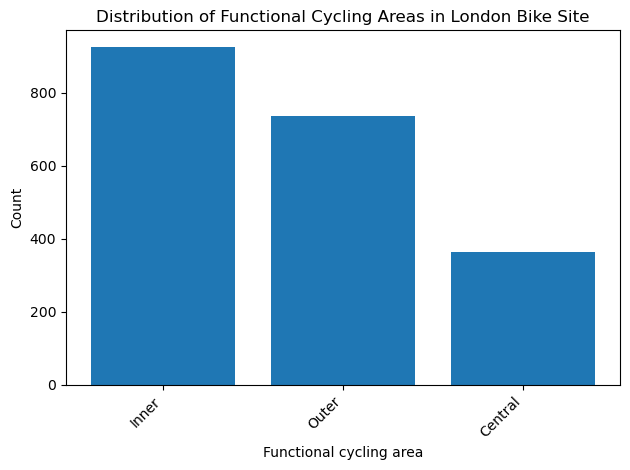

In [9]:
# Count the total count of survey by cycling area.
area_count = bike_site['Area'].value_counts()

# Create a bar chart.
plt.bar(area_count.index, area_count.values)
plt.xlabel("Functional cycling area")
plt.ylabel("Count")
plt.title("Distribution of Functional Cycling Areas in London Bike Site")
plt.xticks(rotation=45, ha='right')  

plt.tight_layout()
plt.show()

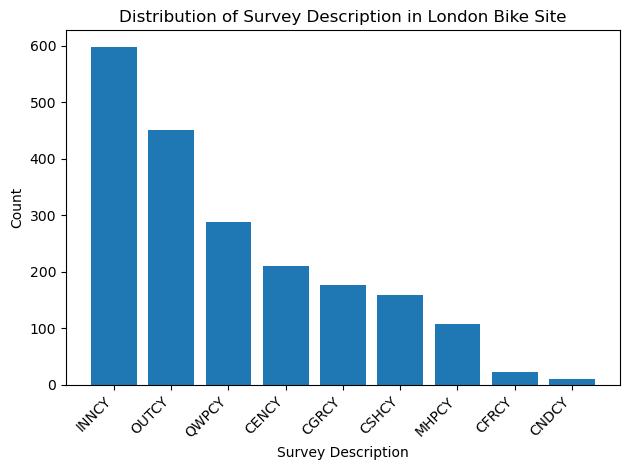

In [10]:
# Count the total count of survey by ProgID.
ProgID_counts = bike_site['ProgID'].value_counts()

# Create a bar chart.
plt.bar(ProgID_counts.index, ProgID_counts.values)
plt.xlabel("Survey Description")
plt.ylabel("Count")
plt.title("Distribution of Survey Description in London Bike Site")
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [11]:
# View descriptive statistic of the dataset.
bike_site.describe()

,Site ID,ProgID,Location,Borough,Area
count,2023,2023,2023,2023,2023
unique,2023,9,1735,33,3
top,CENCY001,INNCY,London Road,Westminster,Inner
freq,1,597,9,199,924


### Summary:

1. Rows and Columns: 2,023 entries, 5 columns.
2. Key Columns: Site ID, ProgID, Location, Borough, Area.
3. Data Types: All columns are objects (strings).
4. We have three survey areas: Inner, Outer, and Central London:
     - There are 50% more data from inner and outer area of london than central area.
5. We have secondary survey collected from the following:
      - Central area cycle surveys,
      - Cycle Future Routes cycle surveys,
      - Central Grid surveys,
      - Cycleway Network Development cycle surveys,
      - Cycle Superhighway cycle surveys,
      - Inner area cycle surveys,
      - Mini Holland cycle surveys,
      - Outer area cycle surveys,
      - Quietway cycle surveys
6. Descriptive Statistics:
      - *Unique boroughs: 33*

      - *Unique areas: 3 (Central, Inner, Outer)*

      - *Top borough by frequency: Westminster*

### Outer London:

In [12]:
# Import Outer London as outer_l.
outer_l = pd.read_csv('Outer London.csv')

# Sense check the data.
outer_l.head()

,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of male cycles,Number of female cycles,Number of unknown cycles,Total cycles
0,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6,0,2,1,0,3
1,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6,15,3,0,0,3
2,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6,30,2,0,0,2
3,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6,45,4,0,0,4
4,2015,OUTCY001,High Road Leyton,"ven, 26/06/15",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7,0,4,1,0,5


In [13]:
# Describe data.
outer_l.describe()

,Survey wave (year),Start hour,Start minute,Number of male cycles,Number of female cycles,Number of unknown cycles,Total cycles
count,375660.000000,375660.000000,375660.000000,375660.000000,375660.000000,375660.000000,375660.000000
mean,2017.848267,13.499643,22.499840,1.335207,0.240646,0.013837,1.589695
std,1.993641,4.609639,16.770532,2.701113,0.751606,0.157072,3.165160
min,2015.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,13.000000,15.000000,0.000000,0.000000,0.000000,0.000000
75%,2019.000000,17.000000,30.000000,2.000000,0.000000,0.000000,2.000000
max,2021.000000,21.000000,45.000000,62.000000,19.000000,13.000000,78.000000


In [14]:
# Review Data types.
outer_l.dtypes

Survey wave (year)           int64
Site ID                     object
Location                    object
Survey date                 object
Weather                     object
Time                        object
Period                      object
Direction                   object
Start hour                   int64
Start minute                 int64
Number of male cycles        int64
Number of female cycles      int64
Number of unknown cycles     int64
Total cycles                 int64
dtype: object

In [15]:
# Convert 'Survey date' to datetime.
# Extract the date part from the string.
outer_l['Survey date'] = outer_l['Survey date'].str.split(', ').str[1]

# Convert the date string to datetime format.
outer_l['Survey date'] = pd.to_datetime(outer_l['Survey date'], format='%d/%m/%y')

# Print dataframe.
print(outer_l['Survey date'].head())

# Review Data types.
outer_l.dtypes

0   2015-06-26
1   2015-06-26
2   2015-06-26
3   2015-06-26
4   2015-06-26
Name: Survey date, dtype: datetime64[ns]


Survey wave (year)                   int64
Site ID                             object
Location                            object
Survey date                 datetime64[ns]
Weather                             object
Time                                object
Period                              object
Direction                           object
Start hour                           int64
Start minute                         int64
Number of male cycles                int64
Number of female cycles              int64
Number of unknown cycles             int64
Total cycles                         int64
dtype: object

In [16]:
# Add 'Day of Week' column.
outer_l['Day of Week'] = outer_l['Survey date'].dt.day_name()

# Create new 'Area' column to each data frame specifying central, inner or outer.
outer_l['Area'] = 'Outer'

# Rename 'Survey wave (year)' column to 'Year'.
outer_l = outer_l.rename(columns={'Survey wave (year)': 'Year'})

# Sense check the data.
outer_l.head()

,Year,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of male cycles,Number of female cycles,Number of unknown cycles,Total cycles,Day of Week,Area
0,2015,OUTCY001,High Road Leyton,2015-06-26,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6,0,2,1,0,3,Friday,Outer
1,2015,OUTCY001,High Road Leyton,2015-06-26,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6,15,3,0,0,3,Friday,Outer
2,2015,OUTCY001,High Road Leyton,2015-06-26,Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6,30,2,0,0,2,Friday,Outer
3,2015,OUTCY001,High Road Leyton,2015-06-26,Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6,45,4,0,0,4,Friday,Outer
4,2015,OUTCY001,High Road Leyton,2015-06-26,Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7,0,4,1,0,5,Friday,Outer


In [17]:
# Check for missing values.
outer_l.isnull().sum()

Year                           0
Site ID                        0
Location                       0
Survey date                 1168
Weather                      968
Time                           0
Period                         0
Direction                      0
Start hour                     0
Start minute                   0
Number of male cycles          0
Number of female cycles        0
Number of unknown cycles       0
Total cycles                   0
Day of Week                 1168
Area                           0
dtype: int64

In [18]:
# Replace missing values with 'Unknown'
outer_l['Survey date'] = outer_l['Survey date'].fillna('Unknown')

outer_l['Weather'] = outer_l['Weather'].fillna('Unknown')

outer_l['Day of Week'] = outer_l['Day of Week'].fillna('Unknown')

# Check for missing values.
outer_l.isnull().sum()

Year                        0
Site ID                     0
Location                    0
Survey date                 0
Weather                     0
Time                        0
Period                      0
Direction                   0
Start hour                  0
Start minute                0
Number of male cycles       0
Number of female cycles     0
Number of unknown cycles    0
Total cycles                0
Day of Week                 0
Area                        0
dtype: int64

In [19]:
# Validate if 'Total cycles'= 'Number of male cycles + female cycles + unknown cycles'
total_cycles_count = sum(outer_l['Total cycles'])
total_male_cycles = sum(outer_l['Number of male cycles'])
total_female_cycles = sum(outer_l['Number of female cycles'])
total_unknown_cycles = sum(outer_l['Number of unknown cycles'])

print(f"Total cycles count is {total_cycles_count}.")
print(f"Sum of male, female and unknown cycles count is {total_male_cycles+total_female_cycles+total_unknown_cycles}.")
print(f"The difference: {total_cycles_count-(total_male_cycles+total_female_cycles+total_unknown_cycles)}")

Total cycles count is 597185.
Sum of male, female and unknown cycles count is 597183.
The difference: 2


In [20]:
# Save the DataFrame as a CSV file.
outer_l.to_csv('outer_l.csv', index=False)  

print("CSV file saved successfully!")

CSV file saved successfully!


### Summary:
1. Rows and Columns: 375,660 entries, 16 columns
2. Key Columns: Includes gender-specific cycle counts (Number of male cycles, Number of female cycles, Number of unknown cycles).
3. Data Types: Mix of integers and objects.
4. Descriptive Statistics:
*Mean Total cycles: 1.59*

*Mean Number of male cycles: 1.34*

*Mean Number of female cycles: 0.24*

*Years range from 2015 to 2021.*

### Inner London:

In [21]:
# Import Inner London as inner_l.
inner_l = pd.read_csv('Inner London.csv')

# Sense check the data.
inner_l.head()

,Survey wave (year),Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles
0,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,1.0,0.0,1.0
1,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,2.0,0.0,2.0
2,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,2.0,0.0,2.0
3,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,4.0,0.0,4.0
4,2015.0,INNCY001,Grove Road,"mer, 20/05/15",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,4.0,0.0,4.0


In [22]:
# Describe data
inner_l.describe()

,Survey wave (year),Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles
count,523776.000000,523770.000000,523770.000000,523776.000000,523776.000000,523776.000000
mean,2017.986070,13.499914,22.499914,5.929833,0.267943,6.196408
std,2.035381,4.609733,16.770551,10.937833,0.944529,11.309639
min,2015.000000,6.000000,0.000000,0.000000,0.000000,0.000000
25%,2016.000000,9.000000,0.000000,1.000000,0.000000,1.000000
50%,2018.000000,13.000000,15.000000,3.000000,0.000000,3.000000
75%,2020.000000,17.000000,30.000000,7.000000,0.000000,7.000000
max,2021.000000,21.000000,45.000000,278.000000,29.000000,280.000000


In [23]:
# Review Data types.
inner_l.dtypes

Survey wave (year)            float64
Site ID                        object
Location                       object
Survey date                    object
Weather                        object
Time                           object
Period                         object
Direction                      object
Start hour                    float64
Start minute                  float64
Number of private cycles      float64
Number of cycle hire bikes    float64
Total cycles                  float64
dtype: object

In [24]:
# Convert 'Survey date' to datetime.
# Extract the date part from the string.
inner_l['Survey date'] = inner_l['Survey date'].str.split(', ').str[1]

# Convert the date string to datetime format.
inner_l['Survey date'] = pd.to_datetime(inner_l['Survey date'], format='%d/%m/%y')

# Print dataframe.
print(inner_l['Survey date'].head())

# Review Data types.
inner_l.dtypes

0   2015-05-20
1   2015-05-20
2   2015-05-20
3   2015-05-20
4   2015-05-20
Name: Survey date, dtype: datetime64[ns]


Survey wave (year)                   float64
Site ID                               object
Location                              object
Survey date                   datetime64[ns]
Weather                               object
Time                                  object
Period                                object
Direction                             object
Start hour                           float64
Start minute                         float64
Number of private cycles             float64
Number of cycle hire bikes           float64
Total cycles                         float64
dtype: object

In [25]:
# Add 'Day of Week' column.
inner_l['Day of Week'] = inner_l['Survey date'].dt.day_name()

# Create new 'Area' column to each data frame specifying central, inner or outer.
inner_l['Area'] = 'Inner'

# Rename 'Survey wave (year)' column to 'Year'.
inner_l = inner_l.rename(columns={'Survey wave (year)': 'Year'})

# Sense check the data.
inner_l.head()

,Year,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Day of Week,Area
0,2015.0,INNCY001,Grove Road,2015-05-20,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,1.0,0.0,1.0,Wednesday,Inner
1,2015.0,INNCY001,Grove Road,2015-05-20,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,2.0,0.0,2.0,Wednesday,Inner
2,2015.0,INNCY001,Grove Road,2015-05-20,Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,2.0,0.0,2.0,Wednesday,Inner
3,2015.0,INNCY001,Grove Road,2015-05-20,Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,4.0,0.0,4.0,Wednesday,Inner
4,2015.0,INNCY001,Grove Road,2015-05-20,Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,4.0,0.0,4.0,Wednesday,Inner


In [26]:
# Check for missing values.
inner_l.isnull().sum()

Year                          91392
Site ID                       91392
Location                      91392
Survey date                   94144
Weather                       96066
Time                          91398
Period                        91398
Direction                     91392
Start hour                    91398
Start minute                  91398
Number of private cycles      91392
Number of cycle hire bikes    91392
Total cycles                  91392
Day of Week                   94144
Area                              0
dtype: int64

In [27]:
# Drop rows where 'Total cycles' data is null.
inner_l = inner_l.dropna(subset=['Total cycles'])

# Check for missing values.
inner_l.isnull().sum()

Year                             0
Site ID                          0
Location                         0
Survey date                   2752
Weather                       4674
Time                             6
Period                           6
Direction                        0
Start hour                       6
Start minute                     6
Number of private cycles         0
Number of cycle hire bikes       0
Total cycles                     0
Day of Week                   2752
Area                             0
dtype: int64

In [28]:
# Replace missing values with 'Unknown' & '0'.
inner_l['Survey date'] = inner_l['Survey date'].fillna('Unknown')

inner_l['Weather'] = inner_l['Weather'].fillna('Unknown')

inner_l['Day of Week'] = inner_l['Day of Week'].fillna('Unknown')

inner_l['Time'] = inner_l['Time'].fillna('0')

inner_l['Period'] = inner_l['Period'].fillna('0')

inner_l['Start hour'] = inner_l['Start hour'].fillna('0')

inner_l['Start minute'] = inner_l['Start minute'].fillna('0')

# Check for missing values.
inner_l.isnull().sum()

Year                          0
Site ID                       0
Location                      0
Survey date                   0
Weather                       0
Time                          0
Period                        0
Direction                     0
Start hour                    0
Start minute                  0
Number of private cycles      0
Number of cycle hire bikes    0
Total cycles                  0
Day of Week                   0
Area                          0
dtype: int64

In [29]:
# Validate if 'Total cycles'= 'Number of private cycles + hire cycles'
total_cycles_count = sum(inner_l['Total cycles'])
total_private_cycles = sum(inner_l['Number of private cycles'])
total_hire_cycles = sum(inner_l['Number of cycle hire bikes'])

print(f"Total cycles count is {total_cycles_count}.")
print(f"Sum of private, hire cycles count is {total_private_cycles+total_hire_cycles}.")
print(f"The difference: {total_cycles_count-(total_private_cycles+total_hire_cycles)}")

Total cycles count is 3245530.0.
Sum of private, hire cycles count is 3246246.0.
The difference: -716.0


In [30]:
# Save the DataFrame as a CSV file.
inner_l.to_csv('inner_l.csv', index=False)  

print("CSV file saved successfully!")

CSV file saved successfully!


### Summary:
1. Rows and Columns: 523,776 entries, 15 columns
2. Key Columns: Similar to Central London, minus a couple of columns.
3. Data Types: Similar mix of objects and floats.
4. Descriptive Statistics:
*Mean Total cycles: 6.20*

*Mean Number of private cycles: 5.93*

*Mean Number of cycle hire bikes: 0.27*

*Years range from 2015 to 2021.*

### Central London:

In [31]:
# Import Central London as central_l.
central_l = pd.read_csv('Central London.csv')

# Sense check the data.
central_l.head()

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN
1,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,15.0,0.0,15.0,NaN,NaN,NaN
2,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,35.0,0.0,35.0,NaN,NaN,NaN
3,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,59.0,2.0,61.0,NaN,NaN,NaN
4,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,73.0,0.0,73.0,NaN,NaN,NaN


In [32]:
# Describe data.
central_l.describe()

,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Unnamed: 14,Unnamed: 15,Unnamed: 16
count,758163.000000,758163.000000,758099.000000,758099.000000,758163.000000,0.0,0.0,0.0
mean,13.499259,22.499951,14.824374,1.830072,16.653040,NaN,NaN,NaN
std,4.609643,16.770530,26.255858,3.321560,28.675116,NaN,NaN,NaN
min,6.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN
25%,9.000000,0.000000,2.000000,0.000000,3.000000,NaN,NaN,NaN
50%,13.000000,15.000000,7.000000,1.000000,8.000000,NaN,NaN,NaN
75%,17.000000,30.000000,16.000000,2.000000,18.000000,NaN,NaN,NaN
max,21.000000,45.000000,1177.000000,108.000000,1200.000000,NaN,NaN,NaN


In [33]:
# Look into Unamed columns data.
# Get unique values from 'Column1' and 'Column2'
Unnamed_14 = central_l['Unnamed: 14'].unique()
Unnamed_15 = central_l['Unnamed: 15'].unique()
Unnamed_16 = central_l['Unnamed: 16'].unique()

# Print unique values in each column
print(Unnamed_14)
print(Unnamed_15)
print(Unnamed_16)

[nan]
[nan]
[nan]


In [34]:
# Remove unamed columns.
central_l = central_l.drop(['Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16'], axis=1)

# Sense check the data.
central_l.head()

,Survey wave (calendar quarter),Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles
0,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,0.0,0.0,0.0
1,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,15.0,0.0,15.0
2,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,35.0,0.0,35.0
3,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,59.0,2.0,61.0
4,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),"ven, 24/01/14",Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,73.0,0.0,73.0


In [35]:
# Review Data types.
central_l.dtypes

Survey wave (calendar quarter)     object
Equivalent financial quarter       object
Site ID                            object
Location                           object
Survey date                        object
Weather                            object
Time                               object
Period                             object
Direction                          object
Start hour                        float64
Start minute                      float64
Number of private cycles          float64
Number of cycle hire bikes        float64
Total cycles                      float64
dtype: object

In [36]:
# Convert 'Survey date' to datetime.
# Extract the date part from the string.
central_l['Survey date'] = central_l['Survey date'].str.split(', ').str[1]

# Convert the date string to datetime format.
central_l['Survey date'] = pd.to_datetime(central_l['Survey date'], format='%d/%m/%y')

# Print dataframe.
print(central_l['Survey date'].head())

# Review Data types.
central_l.dtypes

0   2014-01-24
1   2014-01-24
2   2014-01-24
3   2014-01-24
4   2014-01-24
Name: Survey date, dtype: datetime64[ns]


Survey wave (calendar quarter)            object
Equivalent financial quarter              object
Site ID                                   object
Location                                  object
Survey date                       datetime64[ns]
Weather                                   object
Time                                      object
Period                                    object
Direction                                 object
Start hour                               float64
Start minute                             float64
Number of private cycles                 float64
Number of cycle hire bikes               float64
Total cycles                             float64
dtype: object

In [37]:
# Add 'Day of Week' column.
central_l['Day of Week'] = central_l['Survey date'].dt.day_name()

# Create new 'Area' column to each data frame specifying central, inner or outer.
central_l['Area'] = 'Central'

# Add 'Year' column.
central_l['Year'] = central_l['Survey wave (calendar quarter)'].str.split(' ', n=1).str[0]

# Rename 'Survey wave (calendar quarter)' to 'Calendar quarter'.
central_l = central_l.rename(columns={'Survey wave (calendar quarter)': 'Calendar quarter'})

# Sense check the data.
central_l.head()

,Calendar quarter,Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Day of Week,Area,Year
0,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),2014-01-24,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,0.0,0.0,0.0,Friday,Central,2014
1,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),2014-01-24,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,15.0,0.0,15.0,Friday,Central,2014
2,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),2014-01-24,Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,35.0,0.0,35.0,Friday,Central,2014
3,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),2014-01-24,Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6.0,45.0,59.0,2.0,61.0,Friday,Central,2014
4,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),2014-01-24,Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7.0,0.0,73.0,0.0,73.0,Friday,Central,2014


In [38]:
# Check for missing values.
central_l.isnull().sum()

Calendar quarter                290203
Equivalent financial quarter    290203
Site ID                         290203
Location                        290203
Survey date                     300615
Weather                         302037
Time                            290203
Period                          290203
Direction                       290203
Start hour                      290203
Start minute                    290203
Number of private cycles        290267
Number of cycle hire bikes      290267
Total cycles                    290203
Day of Week                     300615
Area                                 0
Year                            290203
dtype: int64

In [39]:
# Drop rows where 'Total cycles' data is null.
central_l = central_l.dropna(subset=['Total cycles'])

# Check for missing values.
central_l.isnull().sum()

Calendar quarter                    0
Equivalent financial quarter        0
Site ID                             0
Location                            0
Survey date                     10412
Weather                         11834
Time                                0
Period                              0
Direction                           0
Start hour                          0
Start minute                        0
Number of private cycles           64
Number of cycle hire bikes         64
Total cycles                        0
Day of Week                     10412
Area                                0
Year                                0
dtype: int64

In [40]:
# Replace missing values with 'Unknown'
central_l['Survey date'] = central_l['Survey date'].fillna('Unknown')

central_l['Weather'] = central_l['Weather'].fillna('Unknown')

central_l['Day of Week'] = central_l['Day of Week'].fillna('Unknown')

central_l['Number of private cycles'] = central_l['Number of private cycles'].fillna(0)

central_l['Number of cycle hire bikes'] = central_l['Number of cycle hire bikes'].fillna(0)

# Check for missing values.
central_l.isnull().sum()

Calendar quarter                0
Equivalent financial quarter    0
Site ID                         0
Location                        0
Survey date                     0
Weather                         0
Time                            0
Period                          0
Direction                       0
Start hour                      0
Start minute                    0
Number of private cycles        0
Number of cycle hire bikes      0
Total cycles                    0
Day of Week                     0
Area                            0
Year                            0
dtype: int64

In [41]:
# Validate if 'Total cycles'= 'Number of private cycles + hire cycles'
ttl_cycles_count = sum(central_l['Total cycles'])
ttl_private_cycles = sum(central_l['Number of private cycles'])
ttl_hire_cycles = sum(central_l['Number of cycle hire bikes'])

print(f"Total cycles count is {ttl_cycles_count}.")
print(f"Sum of private and hire cycles count is {ttl_private_cycles+ttl_hire_cycles}.")
print(f"The difference: {ttl_cycles_count-(ttl_private_cycles+ttl_hire_cycles)}")

Total cycles count is 12625719.0.
Sum of private and hire cycles count is 12625719.0.
The difference: 0.0


In [42]:
# Save the DataFrame as a CSV file.
central_l.to_csv('central_l.csv', index=False)  

print("CSV file saved successfully!")

CSV file saved successfully!


- Prevalence of Private Bicycles: The majority of bicycles are private, indicating that private ownership or usage of bicycles is more common than cycle hire bikes.
- Busiest Quarters: Quarters Q1 and Q2 consistently exhibit higher total bicycle usage compared to other quarters across the years 2014 to 2021.

### Summary:
1. Rows and Columns: 758,163 entries, 17 columns
2. Key Columns: Calendar quarter, Site ID, Location, Survey date, Weather, Time, Period, Direction, Start hour, Start minute, Number of private cycles, Number of cycle hire bikes, Total cycles, Day of Week, Area, Year
3. Data Types: Mostly objects (strings), with numerical columns for times, cycle counts, and year.
4. Descriptive Statistics:
*Mean Total cycles per observation: 16.65*

*Mean Number of private cycles: 14.82*

*Mean Number of cycle hire bikes: 1.83*

*Years range from 2014 to 2021.*

### Extra: Merged data sets for further analysis.

In [43]:
# 1: Merging datasets on common columns.
# Identify the common columns.
common_columns = list(set(outer_l.columns) & set(inner_l.columns) & set(central_l.columns))

# Select only the common columns.
outer_l_common = outer_l[common_columns]
inner_l_common = inner_l[common_columns]
central_l_common = central_l[common_columns]

# Concatenate the DataFrames based on the common columns.
greater_london = pd.concat([outer_l_common, inner_l_common, central_l_common], axis=0, ignore_index=True)

# 2: Full join datasets.
greater_l = pd.concat([central_l, inner_l, outer_l], ignore_index=True)

# Merge greater_l and greater_london with bike_site on Site ID to get Borough information as well 
greater_bor = greater_l.merge(bike_site[['Site ID', 'Borough']], on='Site ID', how='left')

greater_lon_bor = greater_london.merge(bike_site[['Site ID', 'Borough']], on='Site ID', how='left')

## User Patterns Analysis:
### 1. Rides by Borough:

In [44]:
# Group by Borough and calculate the total number of cycles
borough_traffic = greater_bor.groupby('Borough')['Total cycles'].sum().reset_index()

# Sort the boroughs by total cycle traffic in descending order
borough_traffic = borough_traffic.sort_values(by='Total cycles', ascending=False)

# Print the result
print(borough_traffic)

                 Borough  Total cycles
32           Westminster     3659889.0
6         City of London     3055574.0
5                 Camden     2163728.0
27             Southwark     2122714.0
21               Lambeth     1526778.0
18             Islington     1397875.0
11               Hackney      418965.0
29         Tower Hamlets      345992.0
31            Wandsworth      327120.0
12  Hammersmith & Fulham      319581.0
19  Kensington & Chelsea      316568.0
22              Lewisham      102470.0
26  Richmond upon Thames       93813.0
23                Merton       77609.0
8                 Ealing       70745.0
13              Haringey       59588.0
30        Waltham Forest       53991.0
24                Newham       50936.0
17              Hounslow       49563.0
20  Kingston upon Thames       40787.0
3                  Brent       35177.0
16            Hillingdon       25743.0
10             Greenwich       21110.0
4                Bromley       19663.0
7                Croydon 

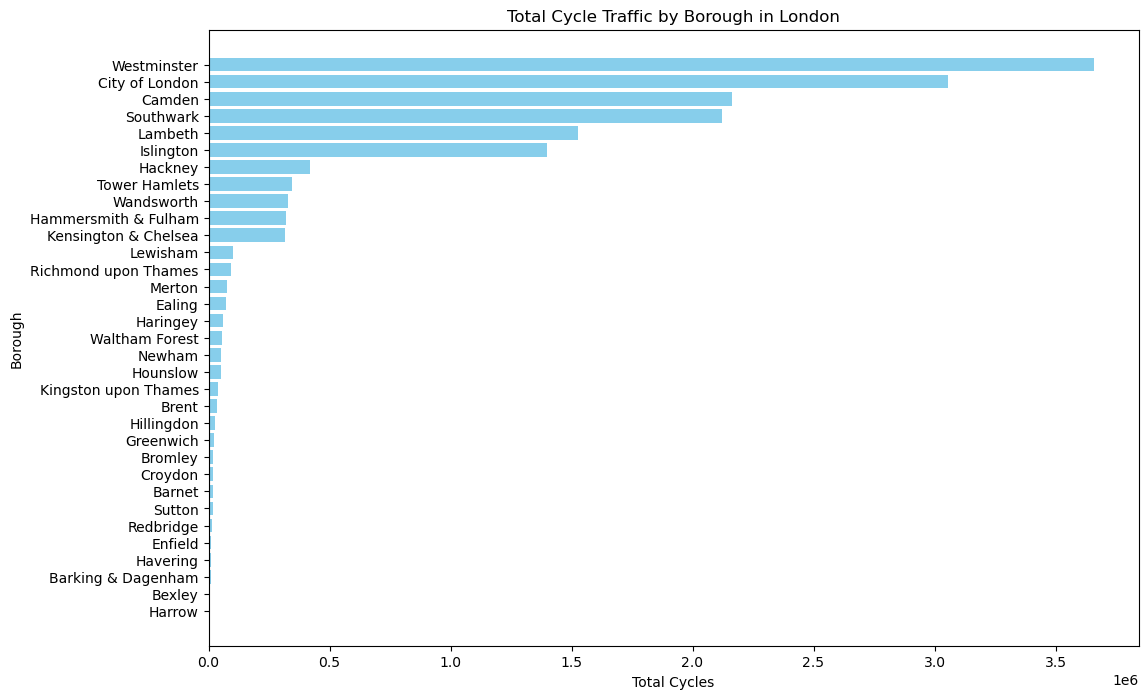

In [45]:
# Plotting the total cycle traffic by borough
plt.figure(figsize=(12, 8))
plt.barh(borough_traffic['Borough'], borough_traffic['Total cycles'], color='skyblue')
plt.xlabel('Total Cycles')
plt.ylabel('Borough')
plt.title('Total Cycle Traffic by Borough in London')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top
plt.show()

The horizontal bar chart (or Borough Analysis) reveals:
- Westminster and the City of London are the boroughs with the highest cycle traffic, with 3,659,889 and 3,055,574 total cycles, respectively. 
- Camden, Southwark, and Lambeth also show significant cycle usage, each exceeding one million cycles. 
- The chart highlights a steep drop-off in cycling activity as we move down the list, with many outer boroughs like Barking & Dagenham, Bexley & Harrow recording less than 10,000 cycles. 
- This distribution suggests a concentration of cycling traffic in central and inner London, diminishing towards the outer regions.

### 2. Cycling Direction by Hour of Day Analysis:
*To understand the cycling patterns in different directions throughout the day, we will analyze the number of cycles moving northbound, southbound, eastbound, and westbound broken down by each hour.*

In [46]:
# Group by Start hour and Direction and sum the Total cycles
direction_by_hour = greater_l.groupby(['Start hour', 'Direction'])['Total cycles'].sum().unstack(fill_value=0)

# Print the result
print(direction_by_hour)

Direction   Eastbound  Northbound  Southbound  Westbound
Start hour                                              
6.0           98410.0    145019.0     94033.0   110204.0
7.0          312008.0    460398.0    271648.0   308155.0
8.0          527131.0    871367.0    527838.0   579037.0
9.0          277683.0    478945.0    348837.0   376395.0
10.0         119406.0    164496.0    138466.0   149529.0
11.0         101934.0    125698.0    113073.0   118887.0
12.0         114161.0    132146.0    123584.0   121930.0
13.0         118751.0    133984.0    128904.0   123373.0
14.0         121448.0    133272.0    131075.0   120727.0
15.0         151513.0    159312.0    162880.0   144250.0
16.0         229839.0    229923.0    258978.0   207091.0
17.0         453923.0    443000.0    597923.0   432799.0
18.0         531657.0    512446.0    736961.0   509538.0
19.0         297986.0    290427.0    391673.0   280796.0
20.0         174317.0    167526.0    208926.0   143545.0
21.0         111546.0    108571

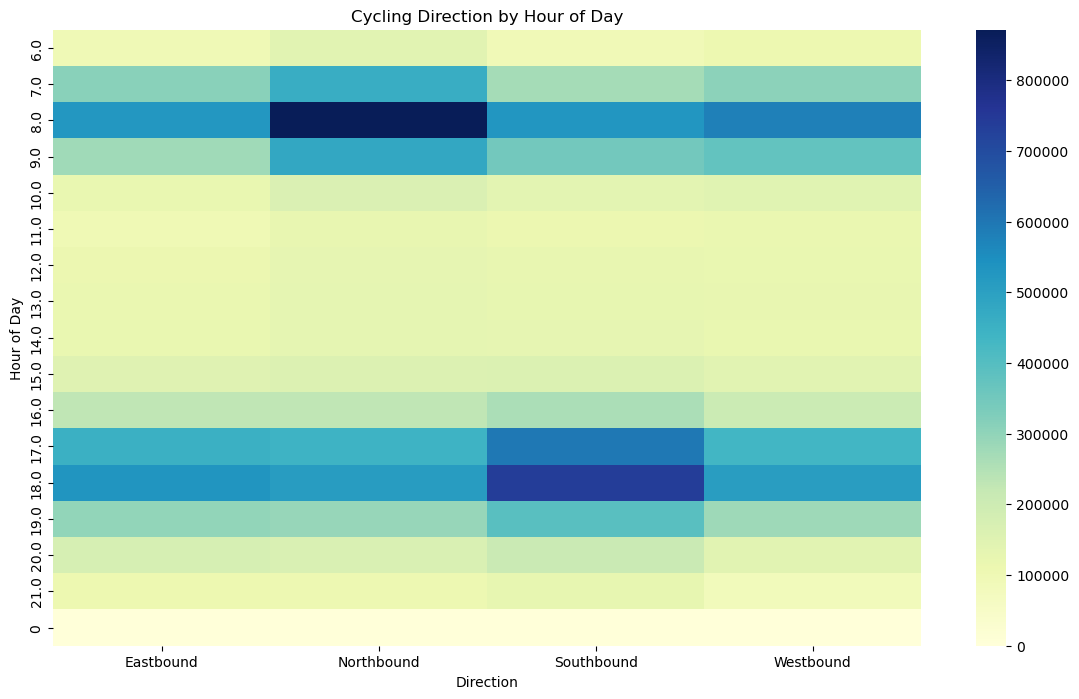

In [47]:
# Create the heatmap without annotations
plt.figure(figsize=(14, 8))
sns.heatmap(direction_by_hour, cmap="YlGnBu", annot=False)
plt.title('Cycling Direction by Hour of Day')
plt.xlabel('Direction')
plt.ylabel('Hour of Day')
plt.show()

The analyses reveals the intensity of cycling traffic in different directions (eastbound, northbound, southbound, and westbound) throughout the day:
- Peak cycling hours are evident in the early morning (6 AM to 9 AM) and late afternoon (4 PM to 7 PM), with the highest activity occurring at 8 AM and 6 PM, especially in the northbound and southbound directions. 
- This pattern suggests heavy commuting traffic during typical rush hours.
- Midday hours show relatively lower, but steady, cycling activity across all directions. 
- The heatmap effectively highlights these traffic patterns, making it easy to identify the busiest times and directions for cycling in London.*

### 3. Day of the Week Analysis:
*To determine which days have the highest and lowest bike usage, we will analyze the cycling traffic data by day of the week.*

In [48]:
# Group by Day of Week and sum the Total cycles
traffic_by_day = greater_l.groupby('Day of Week')['Total cycles'].sum().reset_index()

# Sort by day of the week (assuming the days are not already in order)
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
traffic_by_day['Day of Week'] = pd.Categorical(traffic_by_day['Day of Week'], categories=days_order, ordered=True)
traffic_by_day = traffic_by_day.sort_values('Day of Week')

# Print the result
print(traffic_by_day)

  Day of Week  Total cycles
1      Monday     3589883.0
5     Tuesday     3777330.0
7   Wednesday     3574241.0
4    Thursday     3092077.0
0      Friday     2245456.0
2    Saturday        2545.0
3      Sunday        3591.0
6         NaN      183311.0


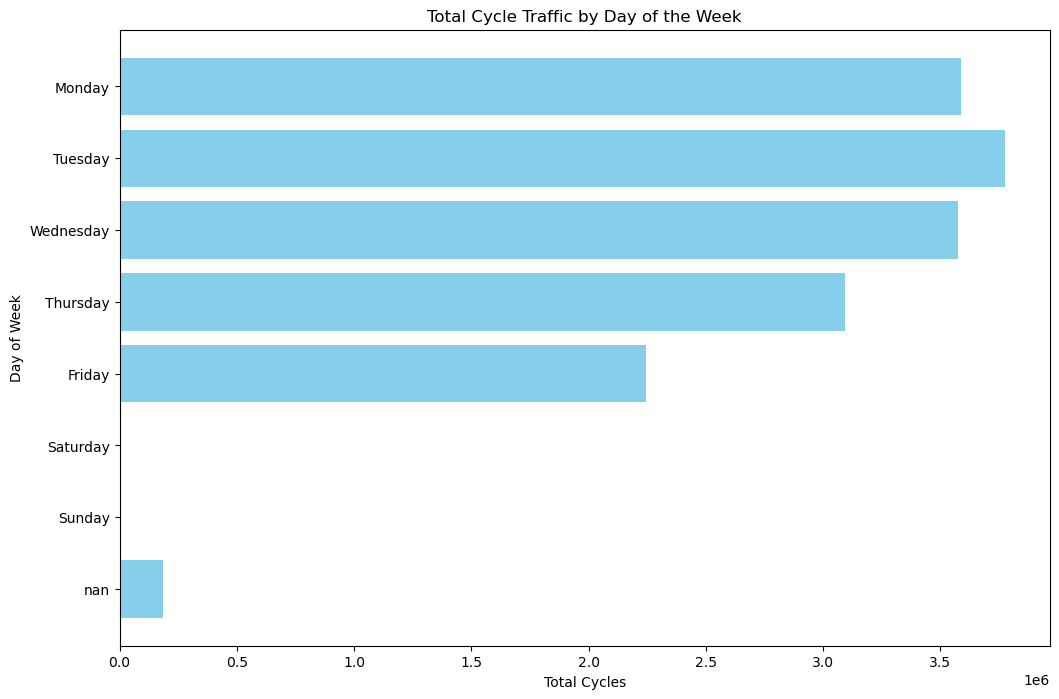

In [49]:
# Ensure 'Day of Week' is string type for plotting
traffic_by_day['Day of Week'] = traffic_by_day['Day of Week'].astype(str)

# Plotting the total cycle traffic by day of the week
plt.figure(figsize=(12, 8))
plt.barh(traffic_by_day['Day of Week'], traffic_by_day['Total cycles'], color='skyblue')
plt.xlabel('Total Cycles')
plt.ylabel('Day of Week')
plt.title('Total Cycle Traffic by Day of the Week')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest value at the top
plt.show()

The data suggests that cycling is predominantly a weekday activity, likely linked to commuting patterns:
- Tuesday is the peak day for cycling, which could be attributed to various factors such as work schedules or weather conditions.
- The drastic drop on weekends suggests recreational or non-commuting bike rides are significantly fewer.
- The 'NaN' category represents a small fraction of the data (unknown day with 183,311 cycles, indicating these records didn't have a specified day), but it's important to investigate these records to understand the gaps in data collection.

### 4. Peak Hours Analysis: 
*Identifying the Busiest Cycling Hours of the Day*

In [50]:
# Group by 'Start hour' and sum the 'Total cycles'
traffic_by_hour = greater_l.groupby('Start hour')['Total cycles'].sum().reset_index()

# Print the result
print(traffic_by_hour)

   Start hour  Total cycles
0         6.0      447666.0
1         7.0     1352209.0
2         8.0     2505373.0
3         9.0     1481860.0
4        10.0      571897.0
5        11.0      459592.0
6        12.0      491821.0
7        13.0      505012.0
8        14.0      506522.0
9        15.0      617955.0
10       16.0      925831.0
11       17.0     1927645.0
12       18.0     2290602.0
13       19.0     1260882.0
14       20.0      694314.0
15       21.0      429193.0
16          0          60.0


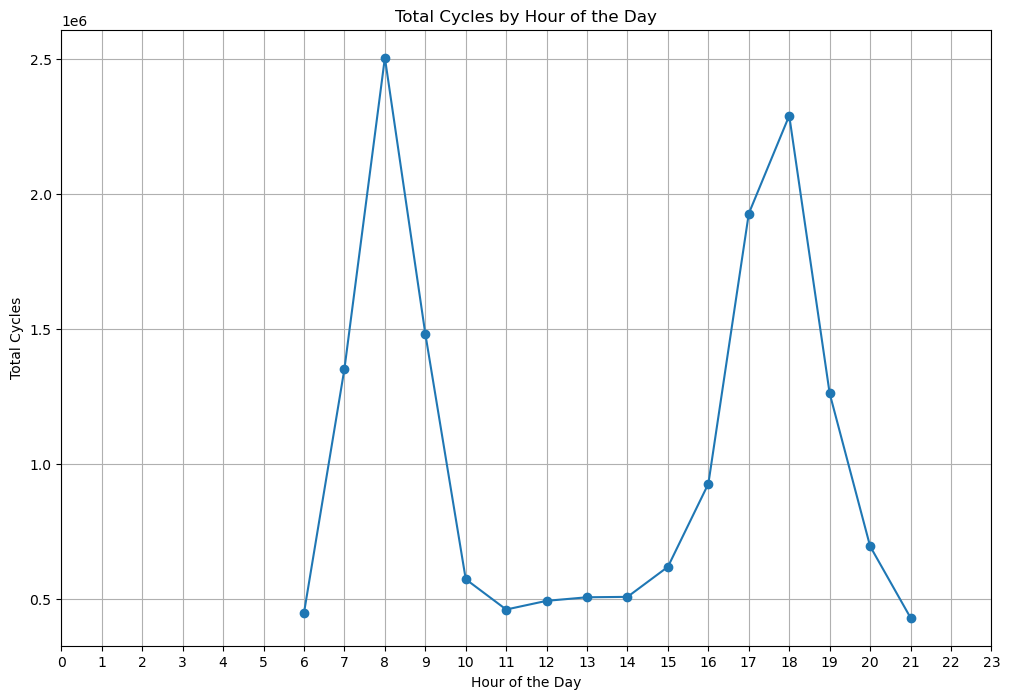

In [51]:
# Filtering 0 value from dataset to plot 
traffic_by_hr = traffic_by_hour[traffic_by_hour['Start hour'] != '0'] 

# Plotting the results.
plt.figure(figsize=(12, 8))
plt.plot(traffic_by_hr['Start hour'], traffic_by_hr['Total cycles'], marker='o', linestyle='-')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Cycles')
plt.title('Total Cycles by Hour of the Day')
plt.grid(True)
plt.xticks(range(0, 24))
plt.show()

The line plot & the analyses reveales the fluctuation in cycling activity throughout the day in a 24-hour cycle. 
- Cycling activity begins to rise at 6 AM, peaking during the morning rush hour around 8 AM, with a notable spike in total cycles. 
- The trend continues to increase steadily until midday, where it reaches another peak around noon. 
- After a slight dip, cycling activity picks up again in the afternoon, reaching its highest point between 5 PM and 6 PM, corresponding to the evening rush hour. 
- The plot indicates a significant drop-off in cycling activity post 7 PM, gradually declining as the night progresses.

### 4. Busiest roads: 
*Find the busiest Streets per directions*

In [52]:
greater_bor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1657599 entries, 0 to 1657598
Data columns (total 21 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Calendar quarter              758163 non-null   object 
 1   Equivalent financial quarter  758163 non-null   object 
 2   Site ID                       1657599 non-null  object 
 3   Location                      1657599 non-null  object 
 4   Survey date                   1657599 non-null  object 
 5   Weather                       1657599 non-null  object 
 6   Time                          1657599 non-null  object 
 7   Period                        1657599 non-null  object 
 8   Direction                     1657599 non-null  object 
 9   Start hour                    1657599 non-null  object 
 10  Start minute                  1657599 non-null  object 
 11  Number of private cycles      1281939 non-null  float64
 12  Number of cycle hire bikes  

In [53]:
#Create a new df named traffic.l from greater_bor
traffic_l = greater_bor.copy()

# Convert 'Start hour' and 'Start minute' to numeric types
traffic_l['Start hour'] = pd.to_numeric(traffic_l['Start hour'], errors='coerce')
traffic_l['Start minute'] = pd.to_numeric(traffic_l['Start minute'], errors='coerce')

# Drop rows with NaN values in 'Start hour' or 'Start minute' after conversion
traffic_l.dropna(subset=['Start hour', 'Start minute'], inplace=True)

# Convert 'Start hour' and 'Start minute' to a single time column
traffic_l['Start time'] = traffic_l['Start hour'] + traffic_l['Start minute'] / 60

# Define the time periods
morning_start = 6.5  # 6:30 AM
morning_end = 9.5    # 9:30 AM
evening_start = 16.5 # 4:30 PM
evening_end = 19.5   # 7:30 PM

# Filter the DataFrame for the specified time periods and directions
morning_traffic = traffic_l[((traffic_l['Start time'] >= morning_start) & (traffic_l['Start time'] <= morning_end))]
evening_traffic = traffic_l[((traffic_l['Start time'] >= evening_start) & (traffic_l['Start time'] <= evening_end))]

# Combine morning and evening traffic
peak_traffic = pd.concat([morning_traffic, evening_traffic])

# Further filter for northbound and southbound directions
northbound_traffic = peak_traffic[peak_traffic['Direction'].str.contains('northbound', case=False, na=False)]
southbound_traffic = peak_traffic[peak_traffic['Direction'].str.contains('southbound', case=False, na=False)]

# Aggregate the data to find the busiest roads
northbound_traffic_sum = northbound_traffic.groupby('Location')['Total cycles'].sum().reset_index()
southbound_traffic_sum = southbound_traffic.groupby('Location')['Total cycles'].sum().reset_index()

# Sort the aggregated data to find the busiest roads
northbound_traffic_sum = northbound_traffic_sum.sort_values(by='Total cycles', ascending=False)
southbound_traffic_sum = southbound_traffic_sum.sort_values(by='Total cycles', ascending=False)


In [54]:
print(northbound_traffic_sum)

                    Location  Total cycles
61       Borough High Street      111636.0
53        Blackfriars Bridge      103850.0
389        New Bridge Street       96549.0
339            London Bridge       94129.0
621          Waterloo Bridge       78244.0
..                       ...           ...
89            Burnell Avenue          10.0
393              North Drive           9.0
334  Little Benty footbridge           8.0
643               Willet Way           7.0
662             Yew Tree Way           4.0

[666 rows x 2 columns]


In [55]:
print(southbound_traffic_sum)

                    Location  Total cycles
61       Borough High Street       92220.0
389        New Bridge Street       90965.0
339            London Bridge       88337.0
53        Blackfriars Bridge       86688.0
187        Farringdon Street       78090.0
..                       ...           ...
406          Old Farm Avenue          11.0
334  Little Benty footbridge           8.0
553         Summerhouse Lane           6.0
643               Willet Way           5.0
662             Yew Tree Way           3.0

[666 rows x 2 columns]


In [56]:
# Display the top 5 busiest roads for northbound and southbound traffic
print("Top 5 Busiest Northbound Roads:")
print(northbound_traffic_sum.head(10))

print("\nTop 5 Busiest Southbound Roads:")
print(southbound_traffic_sum.head(10))

Top 5 Busiest Northbound Roads:
                                              Location  Total cycles
61                                 Borough High Street      111636.0
53                                  Blackfriars Bridge      103850.0
389                                  New Bridge Street       96549.0
339                                      London Bridge       94129.0
621                                    Waterloo Bridge       78244.0
187                                  Farringdon Street       75800.0
371             Millbank (north of Great Peter Street)       68509.0
372                 Millbank (south of Thorney Street)       66050.0
606  Victoria Embankment (between Derby Gate and We...       64018.0
520                                   Southwark Bridge       49827.0

Top 5 Busiest Southbound Roads:
                                              Location  Total cycles
61                                 Borough High Street       92220.0
389                                  N

### 5. Private vs Hiring Bikes Analysis:
*identifying prefered usage over quarterly period (for central London)*

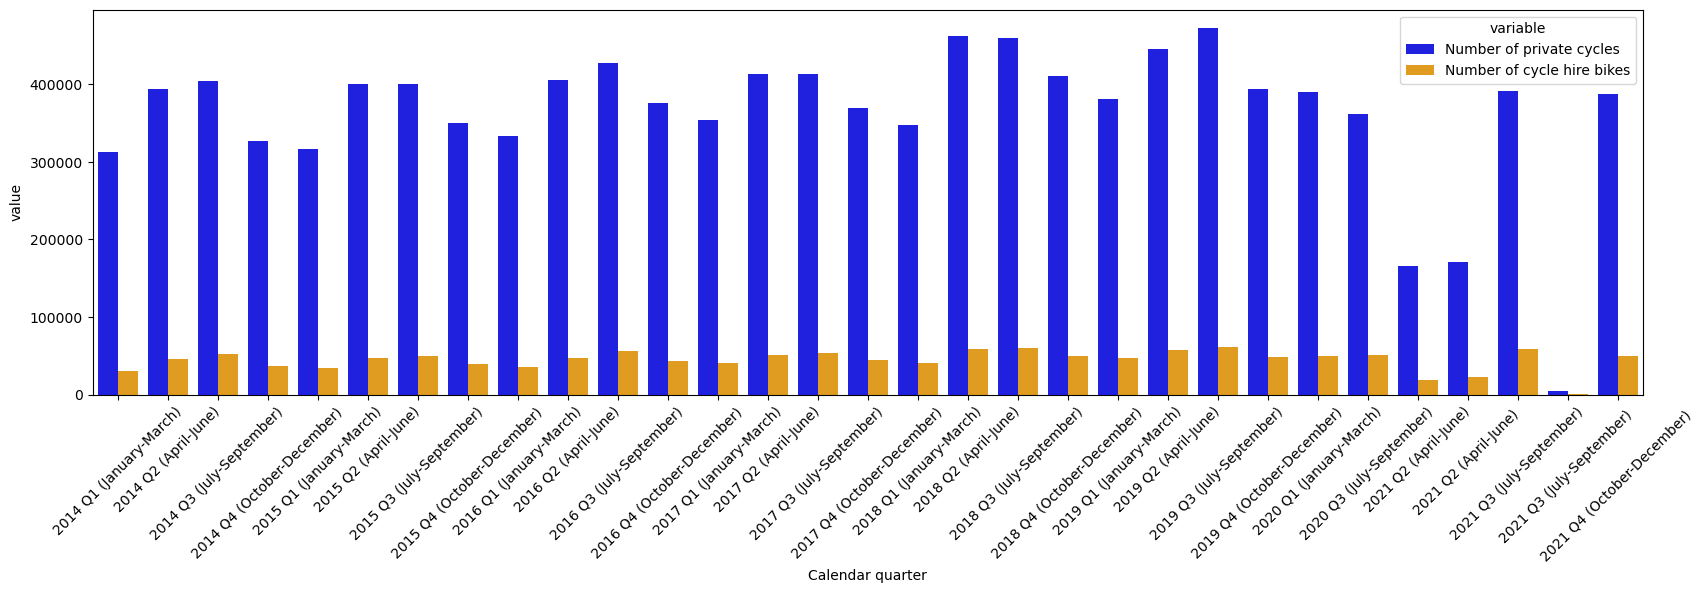

In [57]:
# Plot sum of Hire bikes and Private bikes in a plot by quarter
plt.figure(figsize=(20, 5))

# Plot the results in a barplot
sns.barplot(x='Calendar quarter', y='value', hue='variable',
            data=central_l.melt(id_vars='Calendar quarter',
                                 value_vars=['Number of private cycles', 'Number of cycle hire bikes']),
            estimator=sum,
            palette=['blue', 'orange'], ci=None)

# Adjust the rotation angle of x
plt.xticks(rotation=45)

# Show the plot
plt.show()

- Prevalence of Private Bicycles: The majority of bicycles are private, indicating that private ownership or usage of bicycles is more common than cycle hire bikes.
- Busiest Quarters: Quarters Q1 and Q2 consistently exhibit higher total bicycle usage compared to other quarters across the years 2014 to 2021.

### 6. Weather Analysis

In [58]:
# Create function to summarise weather conditions.
def categorize_weather(weather):
    if 'Dry' in weather or 'Sunny' in weather:
        return 'Dry/Sunny'
    elif 'Wet' in weather or 'Rain' in weather:
        return 'Wet/Rain'
    elif 'Cloudy' in weather or 'Overcast' in weather:
        return 'Cloudy/Overcast'
    elif 'Snow' in weather or 'Sleet' in weather:
        return 'Snow/Sleet'
    else:
        return 'Other'
    
# Apply the categorize_weather function to the 'Weather' column
greater_l['Weather Category'] = greater_l['Weather'].apply(categorize_weather)

# Group by weather category and sum the total cycles
weather_traffic = greater_l.groupby('Weather Category')['Total cycles'].sum()

# Display the weather traffic data
print(weather_traffic)

Weather Category
Cloudy/Overcast       88417.0
Dry/Sunny          14239190.0
Other                666114.0
Snow/Sleet             2083.0
Wet/Rain            1472630.0
Name: Total cycles, dtype: float64


In [59]:
# Summarise weather category even more
weather_mapping = {
    'Dry/Sunny': 'Dry Weather',
    'Snow/Sleet': 'Wet Weather',
    'Cloudy/Overcast': 'Wet Weather',
    'Wet/Rain': 'Wet Weather',
    'Other': 'Wet Weather',
}

   
    
# Clean the Weather column using the mapping
greater_l['Weather Category'] = greater_l['Weather Category'].map(weather_mapping).fillna('Other')

# Group by weather category and sum the total cycles
weather_traffic = greater_l.groupby('Weather Category')['Total cycles'].sum()

# Display the weather traffic data
print(weather_traffic)

Weather Category
Dry Weather    14239190.0
Wet Weather     2229244.0
Name: Total cycles, dtype: float64


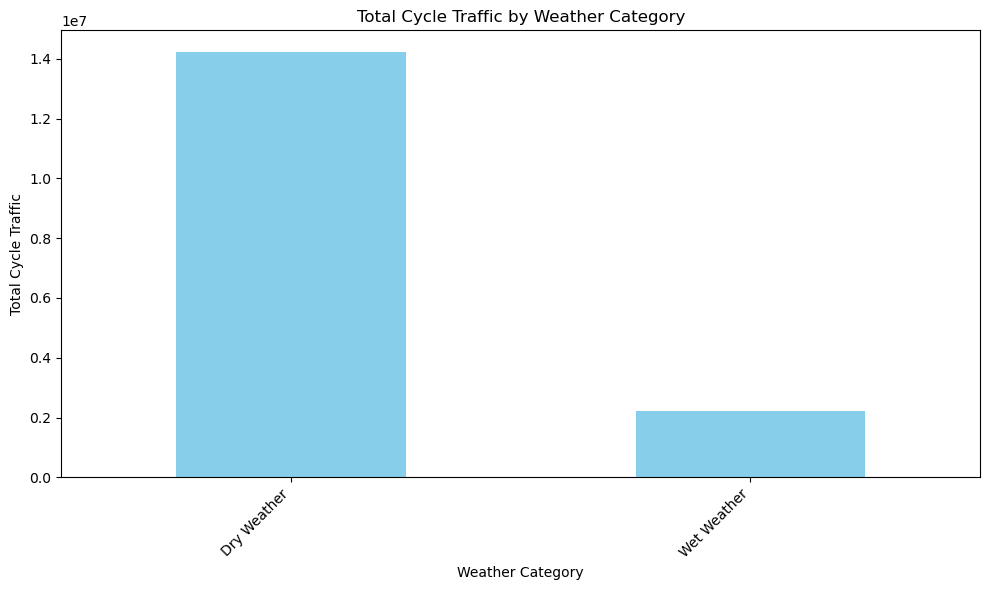

In [60]:
# Create a bar chart
plt.figure(figsize=(10, 6))
weather_traffic.plot(kind='bar', color='skyblue')
plt.title('Total Cycle Traffic by Weather Category')
plt.xlabel('Weather Category')
plt.ylabel('Total Cycle Traffic')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the bar chart
plt.show()

In [61]:
# Group by 'Survey wave (calendar quarter)' and 'Weather Category', then sum the 'Total cycles'
weather_traffic_seasonal = greater_l.groupby(['Calendar quarter', 'Weather Category'])['Total cycles'].sum().reset_index()

# Display the first few rows of the result
print(weather_traffic_seasonal.head())

           Calendar quarter Weather Category  Total cycles
0   2014 Q1 (January-March)      Dry Weather      228721.0
1   2014 Q1 (January-March)      Wet Weather      114623.0
2      2014 Q2 (April-June)      Dry Weather      383182.0
3      2014 Q2 (April-June)      Wet Weather       56749.0
4  2014 Q3 (July-September)      Dry Weather      396690.0


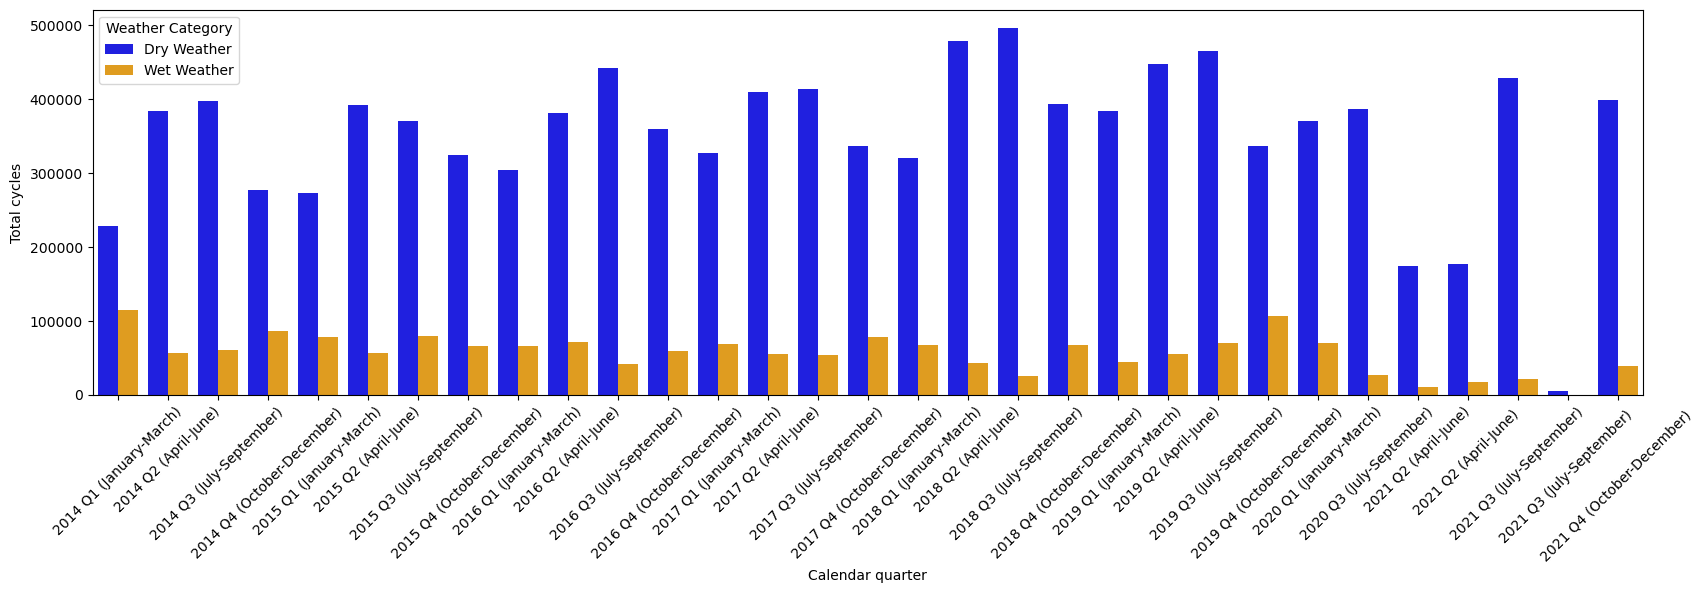

In [62]:
# Plot weather by quarter
plt.figure(figsize=(20, 5))

# Plot the barplot
sns.barplot(data=weather_traffic_seasonal, x='Calendar quarter', y='Total cycles', hue='Weather Category', 
            palette=['blue', 'orange'], ci=None)


# Adjust the rotation angle of x-axis labels
plt.xticks(rotation=45)

# Show the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

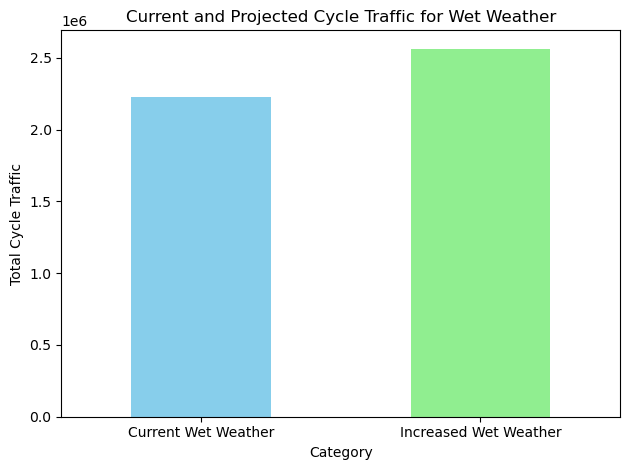

In [63]:
# For the sake of this example, let's define it:
wet_weather_traffic = 2229244.0

# Calculate the new traffic value with a 15% increase
increased_traffic = wet_weather_traffic * 1.15

# Create a DataFrame to hold the data for the bar chart
data = {
    'Category': ['Current Wet Weather', 'Increased Wet Weather'],
    'Total Cycle Traffic': [wet_weather_traffic, increased_traffic]
}

df = pd.DataFrame(data)

# Create the bar chart
plt.figure(figsize=(10, 6))
df.plot( kind='bar', x='Category', y='Total Cycle Traffic', color=['skyblue', 'lightgreen'], legend=False)
plt.title('Current and Projected Cycle Traffic for Wet Weather')
plt.xlabel('Category')
plt.ylabel('Total Cycle Traffic')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the bar chart
plt.show()

In [64]:
# Possible traffic increase in wet weather conditions
increased_traffic - wet_weather_traffic

334386.5999999996

## Demographics Analysis:
### 1a. Gender Distribution:
*Based on Outer London data as the only one with gender data included.*

In [65]:
# Convert survey date to datetime.
outer_l['Survey date'] = pd.to_datetime(outer_l['Survey date'], errors='coerce')

# Create a month column from the survey date.
outer_l['Month'] = outer_l['Survey date'].dt.month

# Display the updated dataframe.
outer_l.head(2)

,Year,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of male cycles,Number of female cycles,Number of unknown cycles,Total cycles,Day of Week,Area,Month
0,2015,OUTCY001,High Road Leyton,2015-06-26,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6,0,2,1,0,3,Friday,Outer,6.0
1,2015,OUTCY001,High Road Leyton,2015-06-26,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6,15,3,0,0,3,Friday,Outer,6.0


In [66]:
# Calculate the total number of male, female, and unknown cyclists. 
total_male_cycles = outer_l['Number of male cycles'].sum()
total_female_cycles = outer_l['Number of female cycles'].sum()
total_unknown_cycles = outer_l['Number of unknown cycles'].sum()

# Calculate the percentage of male, female, and unknown cyclists.
total_cycles = total_male_cycles + total_female_cycles + total_unknown_cycles
percent_male = (total_male_cycles / total_cycles) * 100
percent_female = (total_female_cycles / total_cycles) * 100
percent_unknown = (total_unknown_cycles / total_cycles) * 100

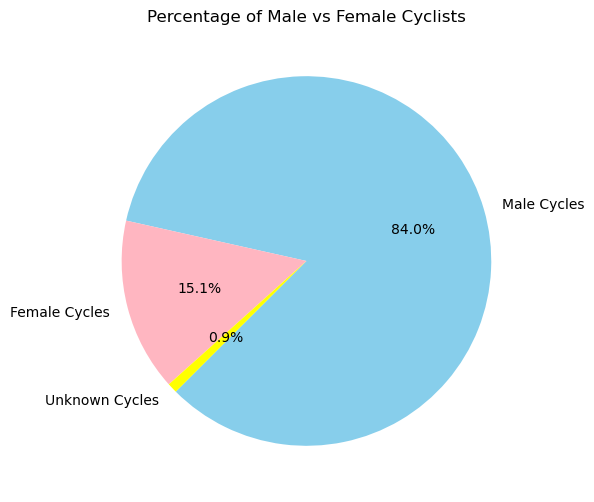

In [67]:
# Create a pie chart to show split between male, female and unknown.
# Set chart size.
plt.figure(figsize=(6, 6))

# Define pie chart segments based on calculated percentages.
sizes = [percent_male, percent_female, percent_unknown]

# Define labels for pie chart segments.
labels = ['Male Cycles', 'Female Cycles', 'Unknown Cycles']

# Set colours for segements.
colors = ['skyblue', 'lightpink', 'yellow']

# Plot the pie chart with labels, colors, and percentage.
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=945)

# Add chart title.
plt.title('Percentage of Male vs Female Cyclists')

# Display chart.
plt.show()

- The pie chart shows a clear prevelance of male bikers (84.0%) to female bikers (15.1%)

### 1b. Gender Trends by Year

*Less data available in 2020 due to covid 19 data inconsistencies*

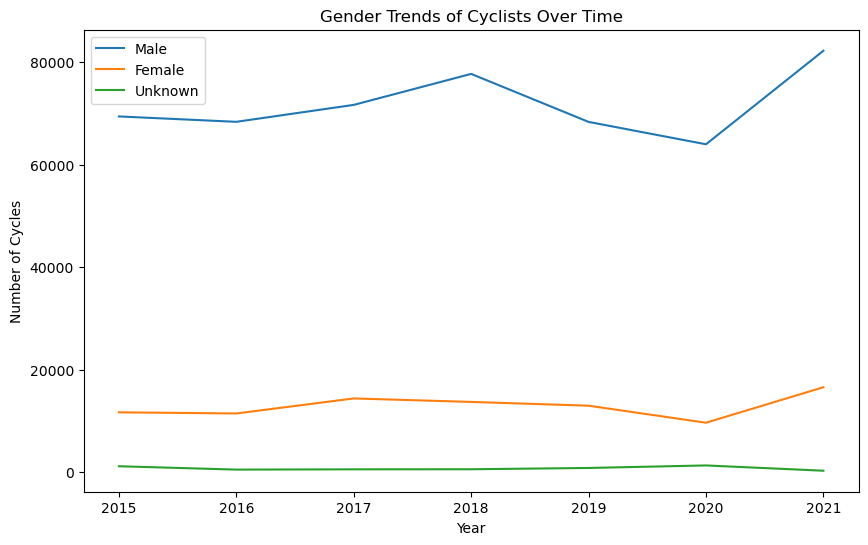

In [68]:
# Group by year and calculate the sum of male, female, and unknown cyclists.
gender_by_year = outer_l.groupby('Year').agg({
    'Number of male cycles': 'sum',
    'Number of female cycles': 'sum',
    'Number of unknown cycles': 'sum'}).reset_index()

# Create a line chart to show male, female and unknown cyclists over time.
# Set chart size.
plt.figure(figsize=(10,6))

# Create a plot.
plt.plot(gender_by_year['Year'], gender_by_year['Number of male cycles'], label='Male')
plt.plot(gender_by_year['Year'], gender_by_year['Number of female cycles'], label='Female')
plt.plot(gender_by_year['Year'], gender_by_year['Number of unknown cycles'], label='Unknown')

# Create title and labels.
plt.xlabel('Year')
plt.ylabel('Number of Cycles')
plt.title('Gender Trends of Cyclists Over Time')

# Create legend.
plt.legend()

# Display chart.
plt.show()

- Similar post 2020 growth trend for both genders.
- 2018 showed a growth in the number of male cyclists that declined the year after.
- Slight growth of number of female cyclists in 2017 that stayed constant until covid-19.

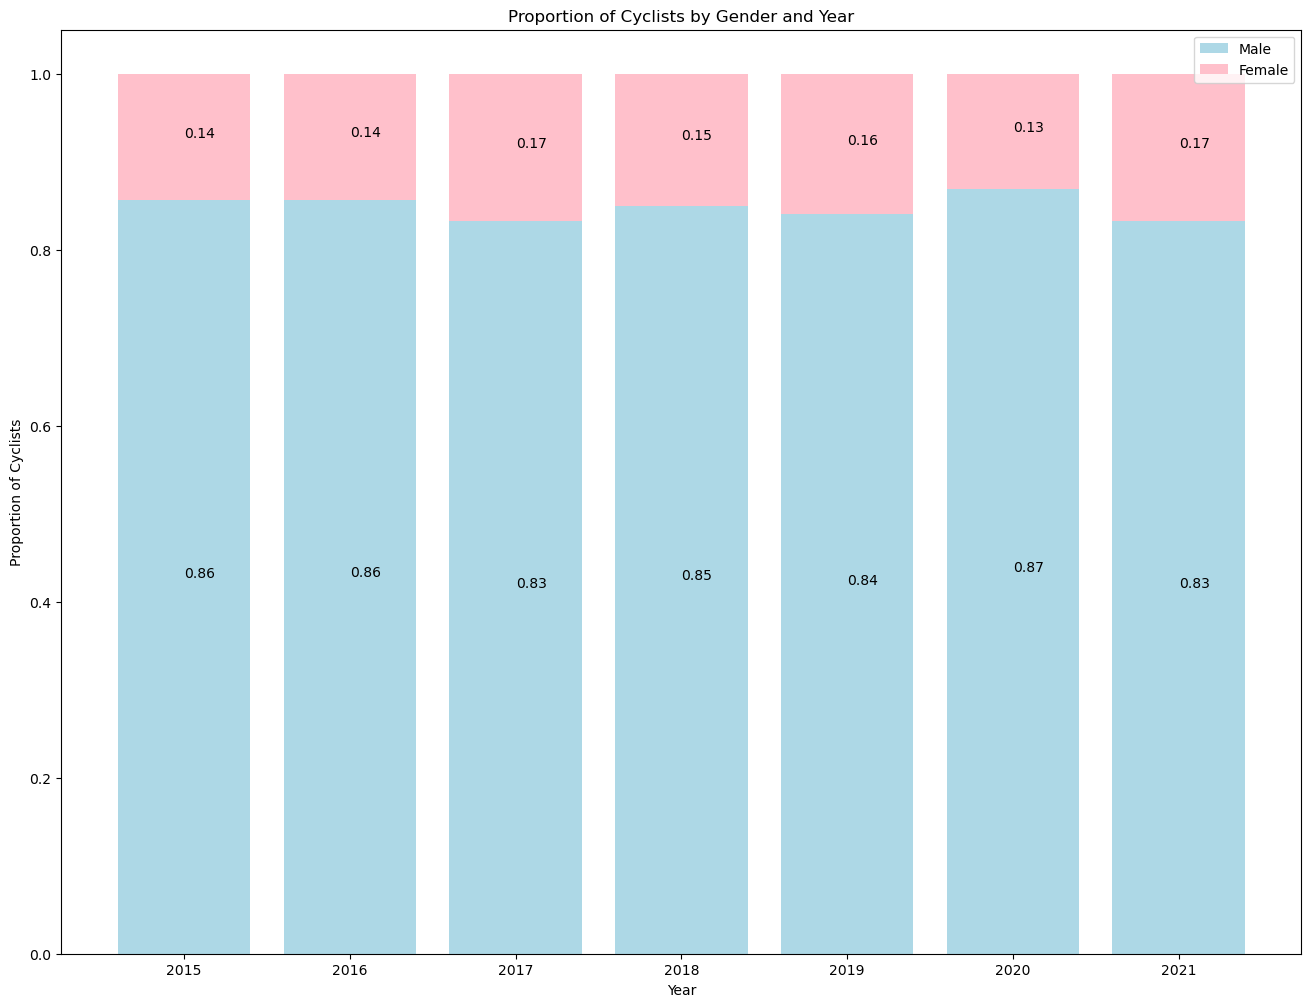

In [69]:
# Visualize the proportion of female to male cyclists by year.
# Group by year and sum the cycling numbers.
grouped_year = outer_l.groupby('Year')[['Number of male cycles', 'Number of female cycles', ]].sum().reset_index()

# Calculate the total cycles for each year.
grouped_year['Total Cycles'] = grouped_year[['Number of male cycles',\
                                             'Number of female cycles']].sum(axis=1)

# Calculate the proportions for each category.
grouped_year['Male Proportion'] = grouped_year['Number of male cycles'] / grouped_year['Total Cycles']
grouped_year['Female Proportion'] = grouped_year['Number of female cycles'] / grouped_year['Total Cycles']

# Set chart size.
plt.figure(figsize=(16, 12))

# Create the bars.
Male = plt.bar(grouped_year['Year'], grouped_year['Male Proportion'], label='Male', color='lightblue')
Female = plt.bar(grouped_year['Year'], grouped_year['Female Proportion'], label='Female',\
                 bottom=grouped_year['Male Proportion'], color='pink')

# Create title and labels.
plt.xlabel('Year')
plt.ylabel('Proportion of Cyclists')
plt.title('Proportion of Cyclists by Gender and Year')
plt.legend()

# Add labels to the bars.
for year, male, female in zip(grouped_year['Year'], grouped_year['Male Proportion'], \
                              grouped_year['Female Proportion']):
    plt.text(year, male / 2, f"{male:.2f}")
    plt.text(year, male + female / 2, f"{female:.2f}")

# Display chart.
plt.show()

In [70]:
# Extract the year column and count the number of records per year. 
records_by_year = outer_l['Year'].value_counts().reset_index()

# Display the dataframe.
print(records_by_year)

   Year  count
0  2015  57728
1  2016  57728
2  2017  57728
3  2018  57728
4  2019  57600
5  2021  57472
6  2020  29676


- Proportion of female cyclists is lower in 2020, potentially due to data inconsistencies due to covid data collection interuptions. 
- 2017 and 2021 showing higher female to male proportions.

### 1c. Gender Data Distribution by Month
*Very few records exist for months August (8) and November (11).*

In [71]:
# Extract the month column and count the records per month.
records_by_month = outer_l['Month'].value_counts().reset_index()
records_by_month.columns = ['Month', 'Total Records']

# Display the dataframe showing total records by month.
print(records_by_month)

   Month  Total Records
0    6.0         125316
1    5.0         116664
2    4.0          54884
3    7.0          46768
4   10.0          16992
5    9.0          13580
6    8.0            160
7   11.0            128


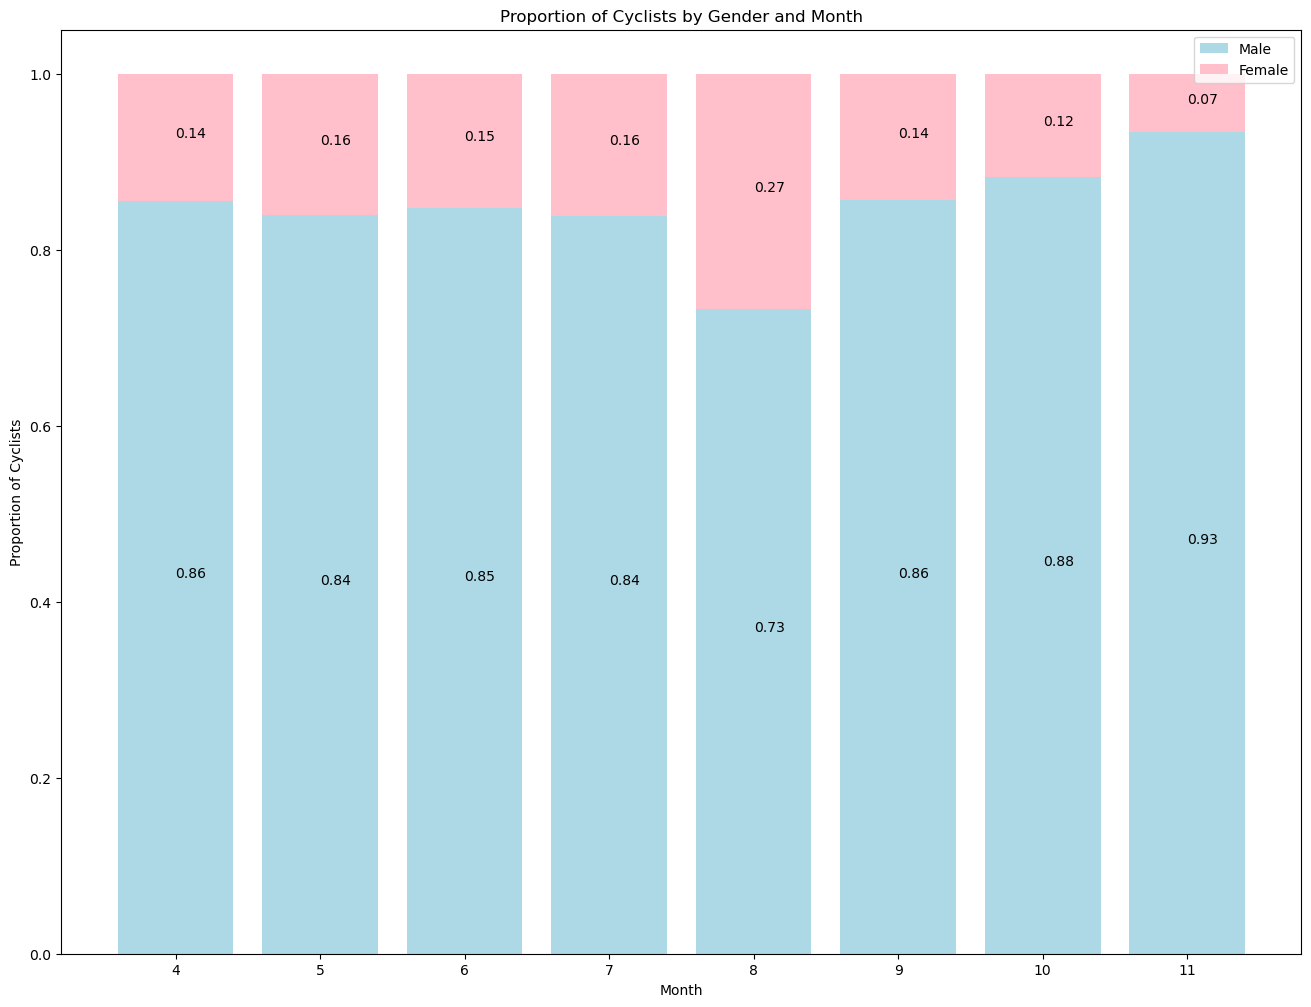

In [72]:
# Visualize the proportion of female to male cyclists by month.
# Group by month and sum the cycling numbers.
grouped_month = outer_l.groupby('Month')[['Number of male cycles', 'Number of female cycles']\
                                               ].sum().reset_index()

# Calculate the total cycles for each year.
grouped_month['Total Cycles'] = grouped_month[['Number of male cycles',\
                                             'Number of female cycles']].sum(axis=1)

# Calculate the proportions for each category.
grouped_month['Male Proportion'] = grouped_month['Number of male cycles'] / grouped_month['Total Cycles']
grouped_month['Female Proportion'] = grouped_month['Number of female cycles'] / grouped_month['Total Cycles']

# Set chart size.
plt.figure(figsize=(16, 12))

# Create the bars.
Male = plt.bar(grouped_month['Month'], grouped_month['Male Proportion'], label='Male', color='lightblue')
Female = plt.bar(grouped_month['Month'], grouped_month['Female Proportion'], label='Female',\
                 bottom=grouped_month['Male Proportion'], color='pink')

# Create title and labels.
plt.xlabel('Month')
plt.ylabel('Proportion of Cyclists')
plt.title('Proportion of Cyclists by Gender and Month')
plt.legend()

# Add labels to the bars.
for year, male, female in zip(grouped_month['Month'], grouped_month['Male Proportion'], \
                              grouped_month['Female Proportion']):
    plt.text(year, male / 2, f"{male:.2f}")
    plt.text(year, male + female / 2, f"{female:.2f}")

# Display chart.
plt.show()

- August shows the lowest proportion of female to male cyclists & November shows the highest but these are not reliable findings due to small amount of records available for these months.
- Of the remaining months we see a higher prpoprtion of females in the summer and spring months (May - July) ad lower proportion of females in the autumn months (September - October)

### 1d. Gender Data Distribution by Period

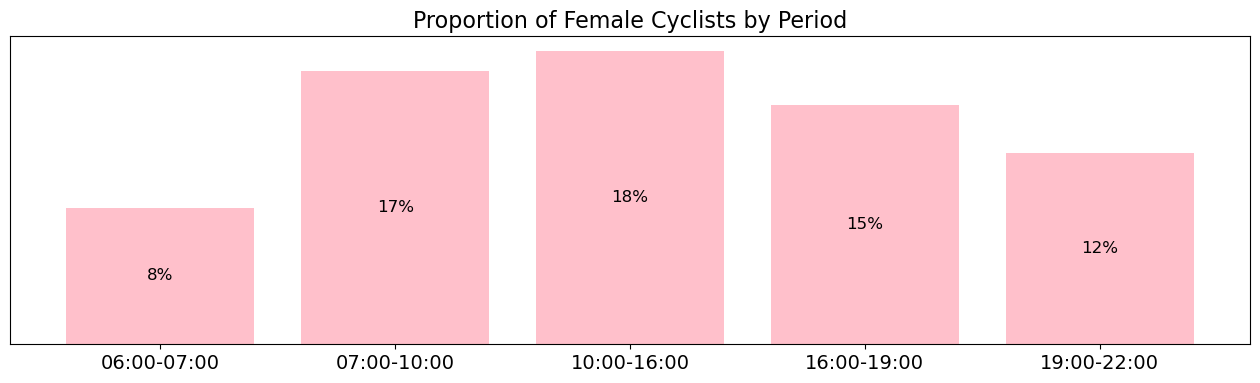

In [73]:
# Define the order for period.
custom_order = [
    'Early Morning (06:00-07:00)',
    'AM peak (07:00-10:00)',
    'Inter-peak (10:00-16:00)',
    'PM peak (16:00-19:00)',
    'Evening (19:00-22:00)']

# Create new labels for periods.
new_labels = [
    '06:00-07:00',
    '07:00-10:00',
    '10:00-16:00',
    '16:00-19:00',
    '19:00-22:00']

# Group by period and sum the cycling numbers.
grouped_period = outer_l.groupby('Period')[['Number of male cycles', 'Number of female cycles']\
                                               ].sum().reset_index()

# Calculate the total cycles for each period.
grouped_period['Total Cycles'] = grouped_period[['Number of male cycles',\
                                             'Number of female cycles']].sum(axis=1)

# Calculate the proportions for each category.
grouped_period['Male Proportion'] = grouped_period['Number of male cycles'] / grouped_period['Total Cycles']
grouped_period['Female Proportion'] = grouped_period['Number of female cycles'] / grouped_period['Total Cycles']

# Convert period to a categorical data type & apply the custom order.
grouped_period['Period'] = pd.Categorical(grouped_period['Period'], categories=custom_order, ordered=True)

# Sort the dataframe based on the custom order.
grouped_period = grouped_period.sort_values('Period')

# Set the chart size.
plt.figure(figsize=(16, 4))

# Create the bars.
Female = plt.bar(grouped_period['Period'], grouped_period['Female Proportion'], label='Female', color='pink')

# Create title and labels.
plt.title('Proportion of Female Cyclists by Period', fontsize=16)

# Remove ticks from the y-axis.
plt.yticks([])

# Set custom labels on the x-axis.
plt.xticks(ticks=range(len(custom_order)), labels=new_labels, fontsize=14, rotation=0)

# Add labels to the bars in the middle.
for bar in Female:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height / 2, f'{height:.0%}', ha='center', va='center', fontsize=12)

# Save chart.
plt.savefig('cycle_period', dpi=300)

# Display chart.
plt.show()

In [74]:
# Extract the period column and count the records per period.
records_by_period = outer_l['Period'].value_counts().reset_index()
records_by_period.columns = ['Period', 'Total Records']

# Display the dataframe showing total records by period.
print(records_by_period)

                        Period  Total Records
0     Inter-peak (10:00-16:00)         140880
1        AM peak (07:00-10:00)          70440
2        PM peak (16:00-19:00)          70440
3        Evening (19:00-22:00)          70420
4  Early Morning (06:00-07:00)          23480


- Female proportion is lowest in the earliest (Early Morning) and latest (Evening) periods of the day. 

### 1e. Gender Distribution by Period and Month

In [75]:
# Recreate dataframe for months with sufficent records.
months = [4, 5, 6, 7, 9, 10]

# Filter the dataframe.
outer_l_month = outer_l[outer_l['Month'].isin(months)]

In [76]:
# Create mapping from month number to month names.
month_mapping = {
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    9: 'September',
    10: 'October'}

# Apply mapping to dataframe.
outer_l_month['Month'] = outer_l_month['Month'].map(month_mapping)

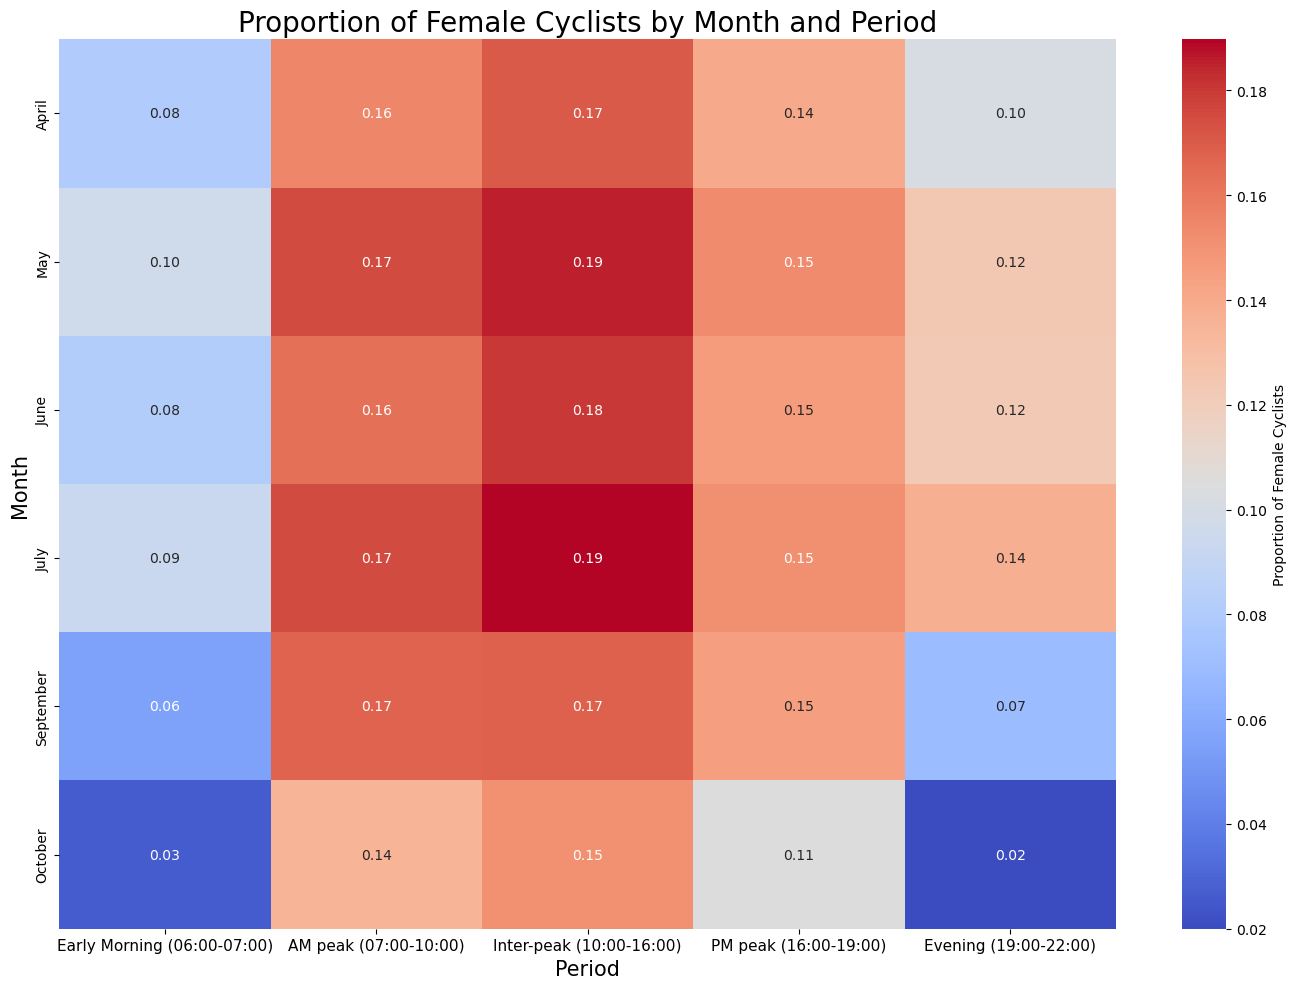

In [77]:
# Group by month & period and sum the cycling numbers.
grouped_month_period = outer_l_month.groupby(['Month', 'Period'])[['Number of male cycles',\
                                                                   'Number of female cycles']].sum().reset_index()

# Calculate the total cycles for each month-period.
grouped_month_period['Total Cycles'] = grouped_month_period[['Number of male cycles',\
                                                             'Number of female cycles']].sum(axis=1)

# Calculate proportions for each category.
grouped_month_period['Female Proportion'] = grouped_month_period['Number of female cycles'] /\
grouped_month_period['Total Cycles']

# Define custom order for months.
custom_order = ['April', 'May', 'June', 'July', 'September', 'October']
cat_type = pd.CategoricalDtype(categories=custom_order, ordered=True)
grouped_month_period['Month'] = grouped_month_period['Month'].astype(cat_type)

# Pivot the data to create th heatmap.
heatmap_data = grouped_month_period.pivot(index='Month', columns='Period', values='Female Proportion')

# Arrange the columns in order.
ordered_columns = ['Early Morning (06:00-07:00)',
    'AM peak (07:00-10:00)',
    'Inter-peak (10:00-16:00)',
    'PM peak (16:00-19:00)',
    'Evening (19:00-22:00)']
heatmap_data = heatmap_data.reindex(columns=ordered_columns)

# Create the heatmap.
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.2f', cbar_kws={'label': 'Proportion of Female Cyclists'})
plt.title('Proportion of Female Cyclists by Month and Period', fontsize=20)
plt.xlabel('Period', fontsize=15)
plt.ylabel('Month', fontsize=15)

# Set x-axis labels rotation.
plt.xticks(rotation=0, fontsize=11)

# Display the heatmap.
plt.tight_layout()
plt.show()

In [78]:
# Add new columns to outer_l to include season and time of day.
# Function to determine season.
def season(month):
    if month in ['April', 'May']:
        return 'Spring'
    elif month in ['June', 'July']:
        return 'Summer'
    elif month in ['September', 'October']:
        return 'Autumn'
    else:
        return 'Unknown'

# Function to determine time of day.
def time_of_day(period):
    if period == 'Early Morning (06:00-07:00)':
        return 'Before 7am'
    elif period in ['AM peak (07:00-10:00)', 'Inter-peak (10:00-16:00)', 'PM peak (16:00-19:00)']:
        return 'Between 7am and 7pm'
    elif period == 'Evening (19:00-22:00)':
        return 'After 7pm'
    else:
        return 'Unknown'

# Apply the functions to create new columns.
outer_l_month['Season'] = outer_l_month['Month'].apply(season)
outer_l_month['Time of Day'] = outer_l_month['Period'].apply(time_of_day)

# Display the updated dataframe.
outer_l_month.head()

,Year,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of male cycles,Number of female cycles,Number of unknown cycles,Total cycles,Day of Week,Area,Month,Season,Time of Day
0,2015,OUTCY001,High Road Leyton,2015-06-26,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6,0,2,1,0,3,Friday,Outer,June,Summer,Before 7am
1,2015,OUTCY001,High Road Leyton,2015-06-26,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6,15,3,0,0,3,Friday,Outer,June,Summer,Before 7am
2,2015,OUTCY001,High Road Leyton,2015-06-26,Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6,30,2,0,0,2,Friday,Outer,June,Summer,Before 7am
3,2015,OUTCY001,High Road Leyton,2015-06-26,Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6,45,4,0,0,4,Friday,Outer,June,Summer,Before 7am
4,2015,OUTCY001,High Road Leyton,2015-06-26,Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7,0,4,1,0,5,Friday,Outer,June,Summer,Between 7am and 7pm


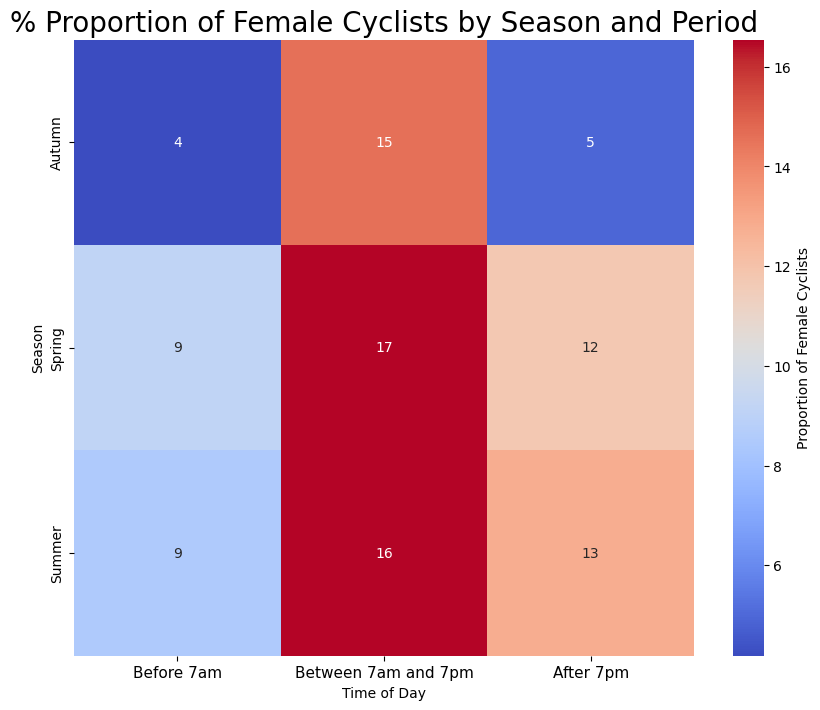

In [79]:
# Group by time of day & season and sum the cycling numbers.
grouped_season_time = outer_l_month.groupby(['Season', 'Time of Day'])[['Number of male cycles',\
                                                                   'Number of female cycles']].sum().reset_index()

# Calculate the total cycles for each time of day-season.
grouped_season_time['Total Cycles'] = grouped_season_time[['Number of male cycles',\
                                                             'Number of female cycles']].sum(axis=1)

# Calculate proportions for each category.
grouped_season_time['Female Proportion'] = grouped_season_time['Number of female cycles'] /\
grouped_season_time['Total Cycles']*100

# Pivot the data to create th heatmap.
heatmap_data = grouped_season_time.pivot(index='Season', columns='Time of Day', values='Female Proportion')

# Arrange the columns in order.
ordered_columns = ['Before 7am','Between 7am and 7pm','After 7pm']

heatmap_data = heatmap_data.reindex(columns=ordered_columns)

# Create the heatmap.
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='.0f', cbar_kws={'label': 'Proportion of Female Cyclists'})
plt.title('% Proportion of Female Cyclists by Season and Period', fontsize=20)

# Set x-axis labels rotation.
plt.xticks(rotation=0, fontsize=11)

# Display the heatmap.
plt.show()

- In Autumn months we see a bigger difference in the proprtion of females cycling in the early morning and evening vs other times of day. 

### 1f. Gender Data Distribution by Day of the Week

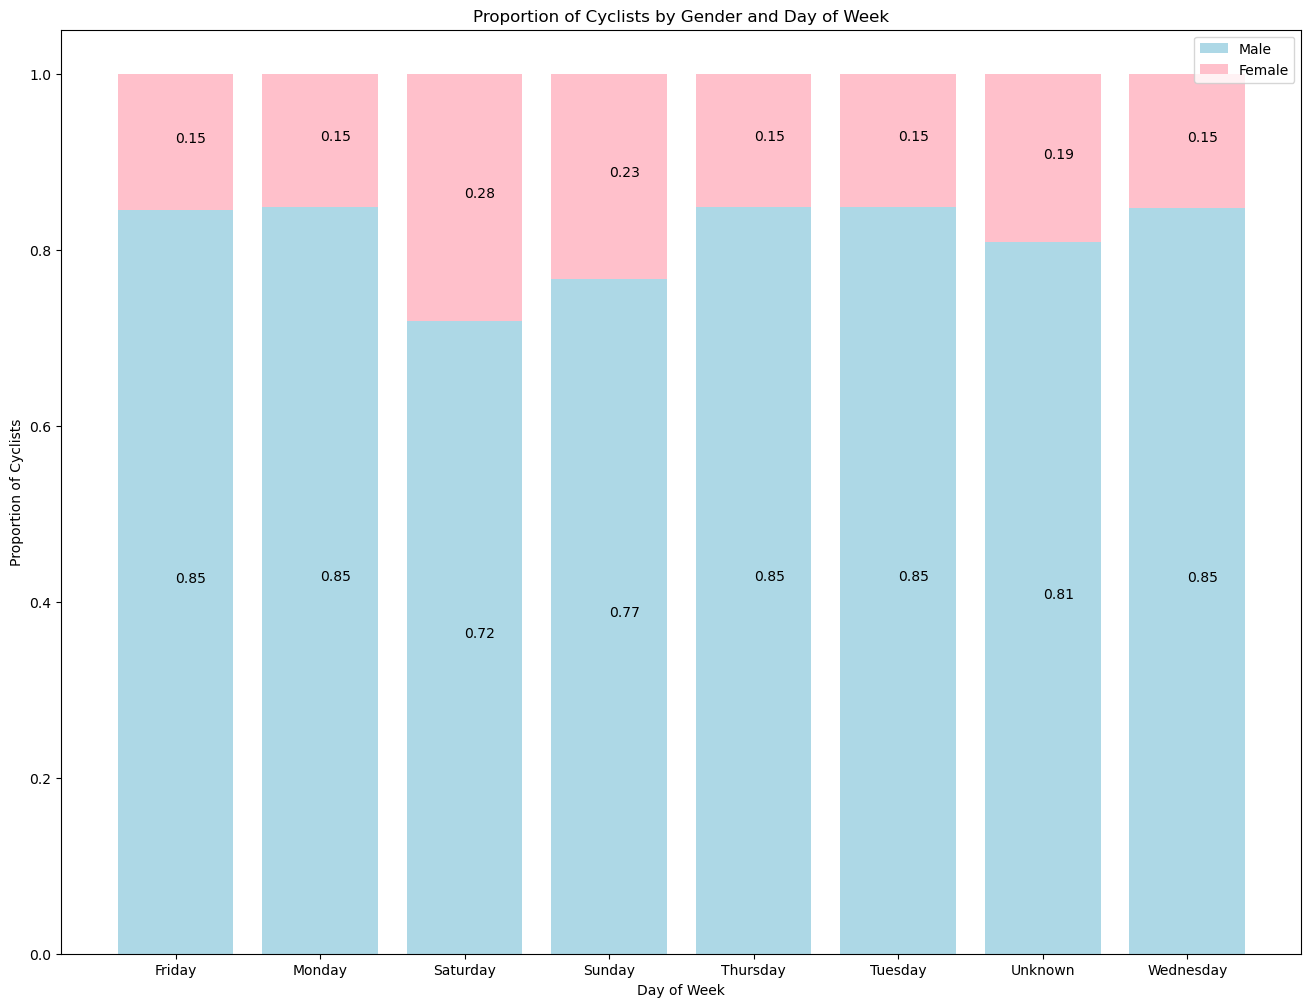

In [80]:
# Group by day of week and sum the cycling numbers.
grouped_day = outer_l.groupby('Day of Week')[['Number of male cycles', 'Number of female cycles']\
                                               ].sum().reset_index()

# Calculate the total cycles for each year.
grouped_day['Total Cycles'] = grouped_day[['Number of male cycles',\
                                             'Number of female cycles']].sum(axis=1)

# Calculate the proportions for each category.
grouped_day['Male Proportion'] = grouped_day['Number of male cycles'] / grouped_day['Total Cycles']
grouped_day['Female Proportion'] = grouped_day['Number of female cycles'] / grouped_day['Total Cycles']

# Set chart size.
plt.figure(figsize=(16, 12))

# Create the bars.
Male = plt.bar(grouped_day['Day of Week'], grouped_day['Male Proportion'], label='Male', color='lightblue')
Female = plt.bar(grouped_day['Day of Week'], grouped_day['Female Proportion'], label='Female',\
                 bottom=grouped_day['Male Proportion'], color='pink')

# Create title and labels.
plt.xlabel('Day of Week')
plt.ylabel('Proportion of Cyclists')
plt.title('Proportion of Cyclists by Gender and Day of Week')
plt.legend()

# Add labels to the bars.
for year, male, female in zip(grouped_day['Day of Week'], grouped_day['Male Proportion'], \
                              grouped_day['Female Proportion']):
    plt.text(year, male / 2, f"{male:.2f}")
    plt.text(year, male + female / 2, f"{female:.2f}")
    
# Display chart.
plt.show()

In [81]:
# Extract the day of week column and count the number of records for each day.
records_by_day = outer_l['Day of Week'].value_counts().reset_index()
records_by_day.columns = ['Day of Week', 'Total Records']

# Sort the dataframe by the order of days of the week (Monday to Sunday).
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Unknown']
records_by_day['Day of Week'] = pd.Categorical(records_by_day['Day of Week'], categories=day_order, ordered=True)
records_by_day = records_by_day.sort_values('Day of Week')

# Display the dataframe.
print(records_by_day)

  Day of Week  Total Records
3      Monday          56788
0     Tuesday          95048
1   Wednesday          88408
2    Thursday          81324
4      Friday          52668
6    Saturday            172
7      Sunday             84
5     Unknown           1168


- Monday to Friday female to male proportion does not change, weekend data is not reliable as there are very few records

### 1g. Gender Distribution by Location

In [82]:
# Extract the location column and count the number of records per year. 
records_by_location = outer_l['Location'].value_counts().reset_index()

# Display the dataframe.
print(records_by_location)

                   Location  count
0               London Road   3584
1                 High Road   3584
2                 Long Lane   2432
3                 The Chase   1792
4             Brighton Road   1792
..                      ...    ...
426        Gloucester Close    768
427         Old Farm Avenue    768
428  Gloucester Road Barnet    768
429          Altmore Avenue    768
430        Uppingham Avenue    640

[431 rows x 2 columns]


In [83]:
# Filter on 'outer' London area
bike_site_out = bike_site[bike_site['Area'] == 'Outer']

# Sense check the data.
print(bike_site_out.info)
bike_site_out.head()

<bound method DataFrame.info of        Site ID ProgID            Location               Borough   Area
220   CFRCY012  CFRCY      Riverdene Road             Redbridge  Outer
221   CFRCY013  CFRCY         Uphall Road             Redbridge  Outer
222   CFRCY014  CFRCY       Wakering Road    Barking & Dagenham  Outer
223   CFRCY015  CFRCY    St. Awdry's Road    Barking & Dagenham  Outer
224   CFRCY016  CFRCY      Sparsholt Road    Barking & Dagenham  Outer
...        ...    ...                 ...                   ...    ...
2011  QWPCY277  QWPCY      Cole Park Road  Richmond upon Thames  Outer
2017  QWPCY283  QWPCY    Northwick Avenue                 Brent  Outer
2018  QWPCY284  QWPCY      Elmwood Avenue                Harrow  Outer
2019  QWPCY285  QWPCY           Peel Road                Harrow  Outer
2020  QWPCY286  QWPCY  Whitefriars Avenue                Harrow  Outer

[735 rows x 5 columns]>


,Site ID,ProgID,Location,Borough,Area
220,CFRCY012,CFRCY,Riverdene Road,Redbridge,Outer
221,CFRCY013,CFRCY,Uphall Road,Redbridge,Outer
222,CFRCY014,CFRCY,Wakering Road,Barking & Dagenham,Outer
223,CFRCY015,CFRCY,St. Awdry's Road,Barking & Dagenham,Outer
224,CFRCY016,CFRCY,Sparsholt Road,Barking & Dagenham,Outer


In [84]:
# Remove unneccesary columns from bike site data frame.
bike_site_new = bike_site_out.drop(['Area', 'Site ID', 'ProgID'], axis=1)

# Sense check the data.
bike_site_new.head()

,Location,Borough
220,Riverdene Road,Redbridge
221,Uphall Road,Redbridge
222,Wakering Road,Barking & Dagenham
223,St. Awdry's Road,Barking & Dagenham
224,Sparsholt Road,Barking & Dagenham


In [85]:
# Include a borough column in the outer london data frame.
# Merge DataFrames on 'location'.
outer = outer_l.merge(bike_site_new, on='Location', how='left')

# View data frame.
outer.head()

,Year,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of male cycles,Number of female cycles,Number of unknown cycles,Total cycles,Day of Week,Area,Month,Borough
0,2015,OUTCY001,High Road Leyton,2015-06-26,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6,0,2,1,0,3,Friday,Outer,6.0,Waltham Forest
1,2015,OUTCY001,High Road Leyton,2015-06-26,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6,15,3,0,0,3,Friday,Outer,6.0,Waltham Forest
2,2015,OUTCY001,High Road Leyton,2015-06-26,Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6,30,2,0,0,2,Friday,Outer,6.0,Waltham Forest
3,2015,OUTCY001,High Road Leyton,2015-06-26,Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6,45,4,0,0,4,Friday,Outer,6.0,Waltham Forest
4,2015,OUTCY001,High Road Leyton,2015-06-26,Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7,0,4,1,0,5,Friday,Outer,6.0,Waltham Forest


In [86]:
# Check for missing values in Borough column.
outer['Borough'].isnull().sum()

0

In [87]:
# Group by borough and sum the cycle numbers.
grouped_borough = outer.groupby('Borough')[['Number of male cycles', 'Number of female cycles']].sum().reset_index()

# Calculate total cycles for each year.
grouped_borough['Total Cycles'] = grouped_borough[['Number of male cycles', 'Number of female cycles']].sum(axis=1)

# Calculate the proportions for each category.
grouped_borough['Male Proportion %'] = grouped_borough['Number of male cycles'] / grouped_borough['Total Cycles']*100
grouped_borough['Female Proportion %'] = grouped_borough['Number of female cycles'] / grouped_borough['Total Cycles']*100

# Sort values by Female pro[ortion.
grouped_borough = grouped_borough.sort_values('Female Proportion %')

# Display the dataframe.
grouped_borough.head()

,Borough,Number of male cycles,Number of female cycles,Total Cycles,Male Proportion %,Female Proportion %
5,Croydon,30641,2607,33248,92.158927,7.841073
11,Havering,20127,1931,22058,91.245807,8.754193
4,Bromley,17785,1848,19633,90.587277,9.412723
19,Redbridge,19893,2121,22014,90.365222,9.634778
9,Haringey,54995,6789,61784,89.011718,10.988282


- Boroughs with lowest proportion of females are Croydon, Havering, Bromley, Redbridge and Haringley.

In [88]:
# Import borough population data.
population = pd.read_csv('London_Borough_Population.csv')

# Sort by population.
population_sorted = population.sort_values(by='Population', ascending=False)

# Sense check the data.
population_sorted.head()

,Borough,Population
1,Barnet,402708
6,Croydon,394114
23,Newham,355266
7,Ealing,343606
28,Tower Hamlets,341982


In [89]:
# Include population column in grouped_borough dataframe.
grouped_borough = pd.merge(grouped_borough, population, on=['Borough'], how='inner')

# View the dataframe.
grouped_borough

,Borough,Number of male cycles,Number of female cycles,Total Cycles,Male Proportion %,Female Proportion %,Population
0,Croydon,30641,2607,33248,92.158927,7.841073,394114
1,Havering,20127,1931,22058,91.245807,8.754193,263617
2,Bromley,17785,1848,19633,90.587277,9.412723,332336
3,Redbridge,19893,2121,22014,90.365222,9.634778,311215
4,Haringey,54995,6789,61784,89.011718,10.988282,269928
5,Sutton,26248,3245,29493,88.997389,11.002611,208830
6,Barnet,39018,4914,43932,88.814532,11.185468,402708
7,Enfield,22785,3041,25826,88.225045,11.774955,339775
8,Brent,47281,6464,53745,87.972835,12.027165,339048
9,Hillingdon,25914,3654,29568,87.642045,12.357955,318774


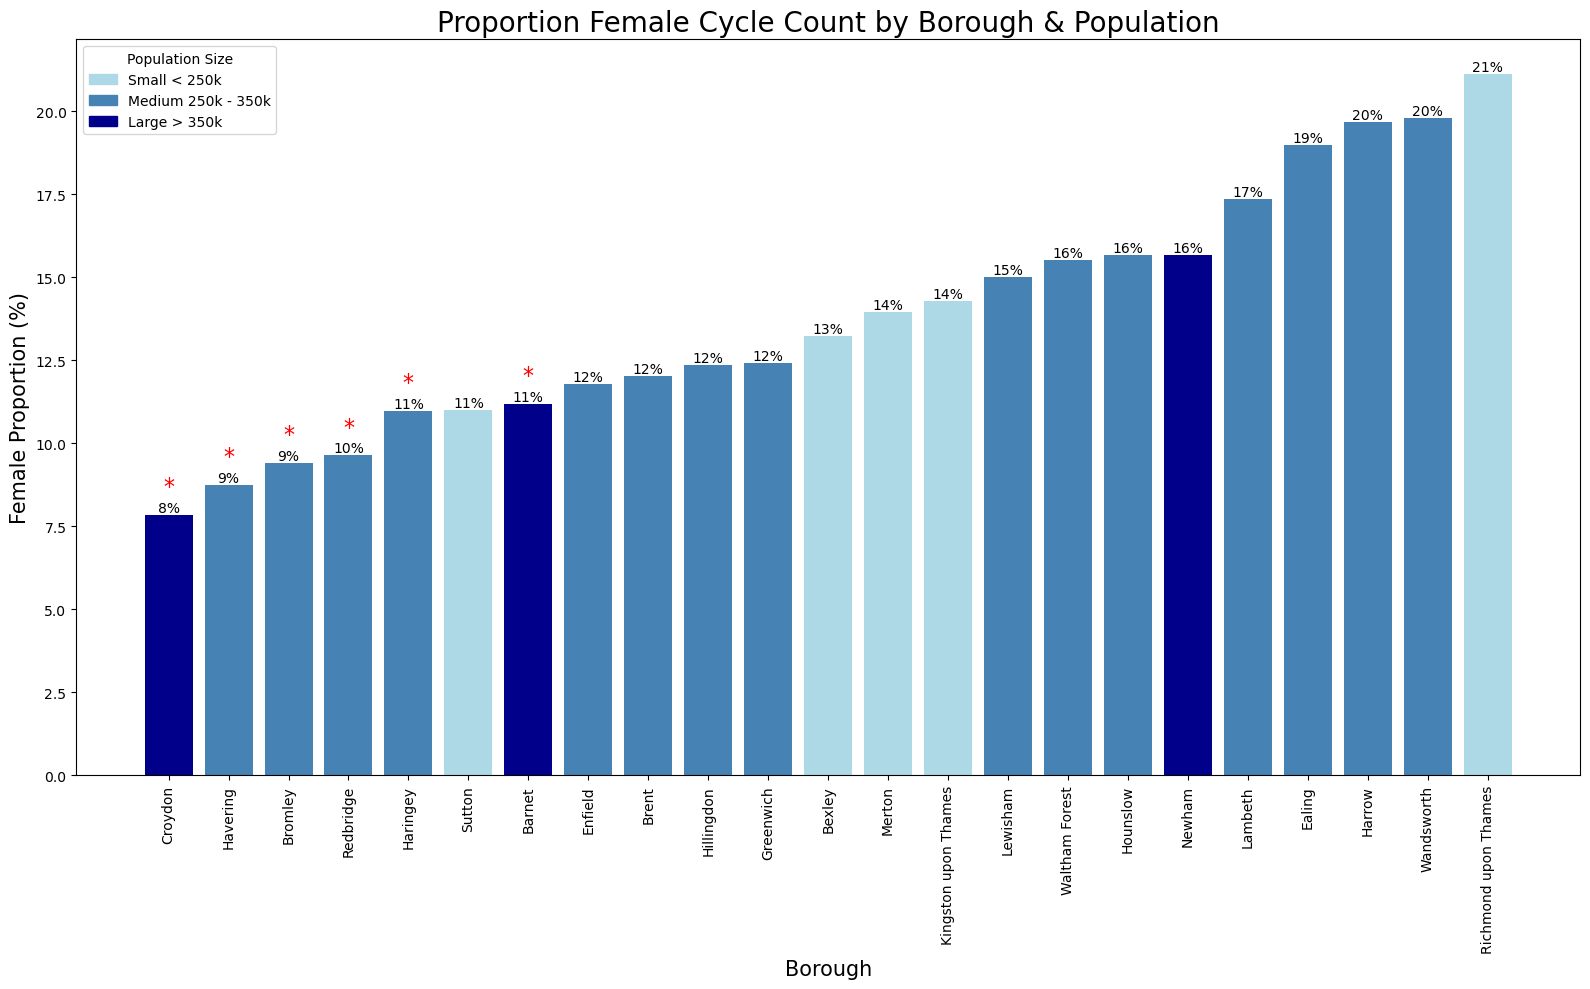

In [90]:
# Create bar chart to show female proportion by borough & population.
population = grouped_borough['Population']

# Define color coding abased on population ranges.
norm = plt.Normalize(vmin=population.min(), vmax=population.max())
colors = []
for pop in population:
    if pop < 250000:
        colors.append('lightblue') 
    elif 250000 <= pop < 350000:
        colors.append('steelblue') 
    else:
        colors.append('darkblue')

# Set chart size.
plt.figure(figsize=(16, 10)) 
bars = plt.bar(grouped_borough['Borough'], grouped_borough['Female Proportion %'], color=colors)

# Add data labels to the bars.
for bar, label in zip(bars, grouped_borough['Female Proportion %']):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{label:.0f}%', ha='center', va='bottom')

# Add stars for specific boroughs.
boroughs_to_mark = ['Croydon', 'Havering', 'Bromley', 'Redbridge', 'Haringey', 'Barnet']
for borough in boroughs_to_mark:
    bar = bars[grouped_borough['Borough'].tolist().index(borough)]
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.5, '*', ha='center', va='bottom', fontsize=16, color='red')

# Add legend for color coding.
legend_colors = {'Small < 250k': 'lightblue', 'Medium 250k - 350k': 'steelblue', 'Large > 350k': 'darkblue'}
legend_handles = [plt.Rectangle((1, 1), 2, 2, color=color) for color in legend_colors.values()]
plt.legend(legend_handles, legend_colors.keys(), title='Population Size')

# Set chart titles.
plt.xlabel('Borough', fontsize=15)
plt.ylabel('Female Proportion (%)', fontsize=15)
plt.title('Proportion Female Cycle Count by Borough & Population', fontsize=20)
plt.xticks(rotation=90)
plt.tight_layout()

# Display the chgart. 
plt.show()

Croydon, Havering, Bromley, Redbridge, Haringey & Barnett have low female proprtions & medium - high populations & should be targeted in recommendations to address female uptake.

### 1h. Gender Distribution by Weather

In [91]:
# Apply the categorize_weather function to the 'Weather' column
outer['Weather Category'] = outer['Weather'].apply(categorize_weather)

# View dataframe.
outer.head()

,Year,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of male cycles,Number of female cycles,Number of unknown cycles,Total cycles,Day of Week,Area,Month,Borough,Weather Category
0,2015,OUTCY001,High Road Leyton,2015-06-26,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6,0,2,1,0,3,Friday,Outer,6.0,Waltham Forest,Dry/Sunny
1,2015,OUTCY001,High Road Leyton,2015-06-26,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6,15,3,0,0,3,Friday,Outer,6.0,Waltham Forest,Dry/Sunny
2,2015,OUTCY001,High Road Leyton,2015-06-26,Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6,30,2,0,0,2,Friday,Outer,6.0,Waltham Forest,Dry/Sunny
3,2015,OUTCY001,High Road Leyton,2015-06-26,Dry,0645 - 0700,Early Morning (06:00-07:00),Northbound,6,45,4,0,0,4,Friday,Outer,6.0,Waltham Forest,Dry/Sunny
4,2015,OUTCY001,High Road Leyton,2015-06-26,Dry,0700 - 0715,AM peak (07:00-10:00),Northbound,7,0,4,1,0,5,Friday,Outer,6.0,Waltham Forest,Dry/Sunny


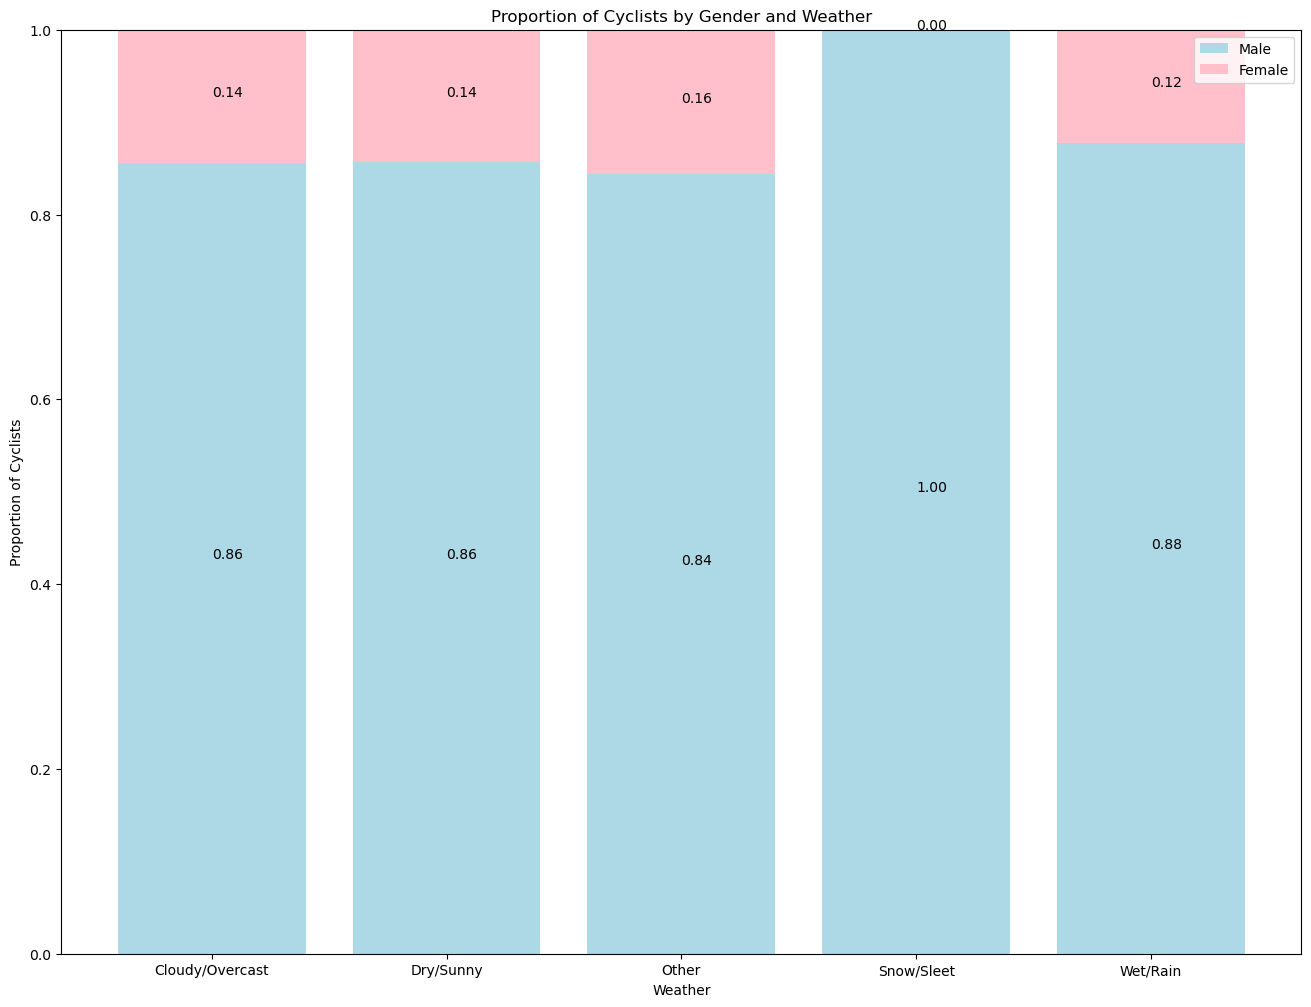

In [92]:
# Visualize the proportion of female to male cyclists by weather.
# Group by year and sum the cycling numbers.
grouped_weather = outer.groupby('Weather Category')[['Number of male cycles', 'Number of female cycles', ]].sum().reset_index()

# Calculate the total cycles for each weather type.
grouped_weather['Total Cycles'] = grouped_weather[['Number of male cycles',\
                                             'Number of female cycles']].sum(axis=1)

# Calculate the proportions for each category.
grouped_weather['Male Proportion'] = grouped_weather['Number of male cycles'] / grouped_weather['Total Cycles']
grouped_weather['Female Proportion'] = grouped_weather['Number of female cycles'] / grouped_weather['Total Cycles']

# Set chart size.
plt.figure(figsize=(16, 12))

# Create the bars.
Male = plt.bar(grouped_weather['Weather Category'], grouped_weather['Male Proportion'], label='Male', color='lightblue')
Female = plt.bar(grouped_weather['Weather Category'], grouped_weather['Female Proportion'], label='Female',\
                 bottom=grouped_weather['Male Proportion'], color='pink')

# Create title and labels.
plt.xlabel('Weather')
plt.ylabel('Proportion of Cyclists')
plt.title('Proportion of Cyclists by Gender and Weather')
plt.legend()

# Add labels to the bars.
for year, male, female in zip(grouped_weather['Weather Category'], grouped_weather['Male Proportion'], \
                              grouped_weather['Female Proportion']):
    plt.text(year, male / 2, f"{male:.2f}")
    plt.text(year, male + female / 2, f"{female:.2f}")

# Display chart.
plt.show()

- Women are less likely than men to cycle during rain and snow.

### 1i. Gender Distribution by Direction

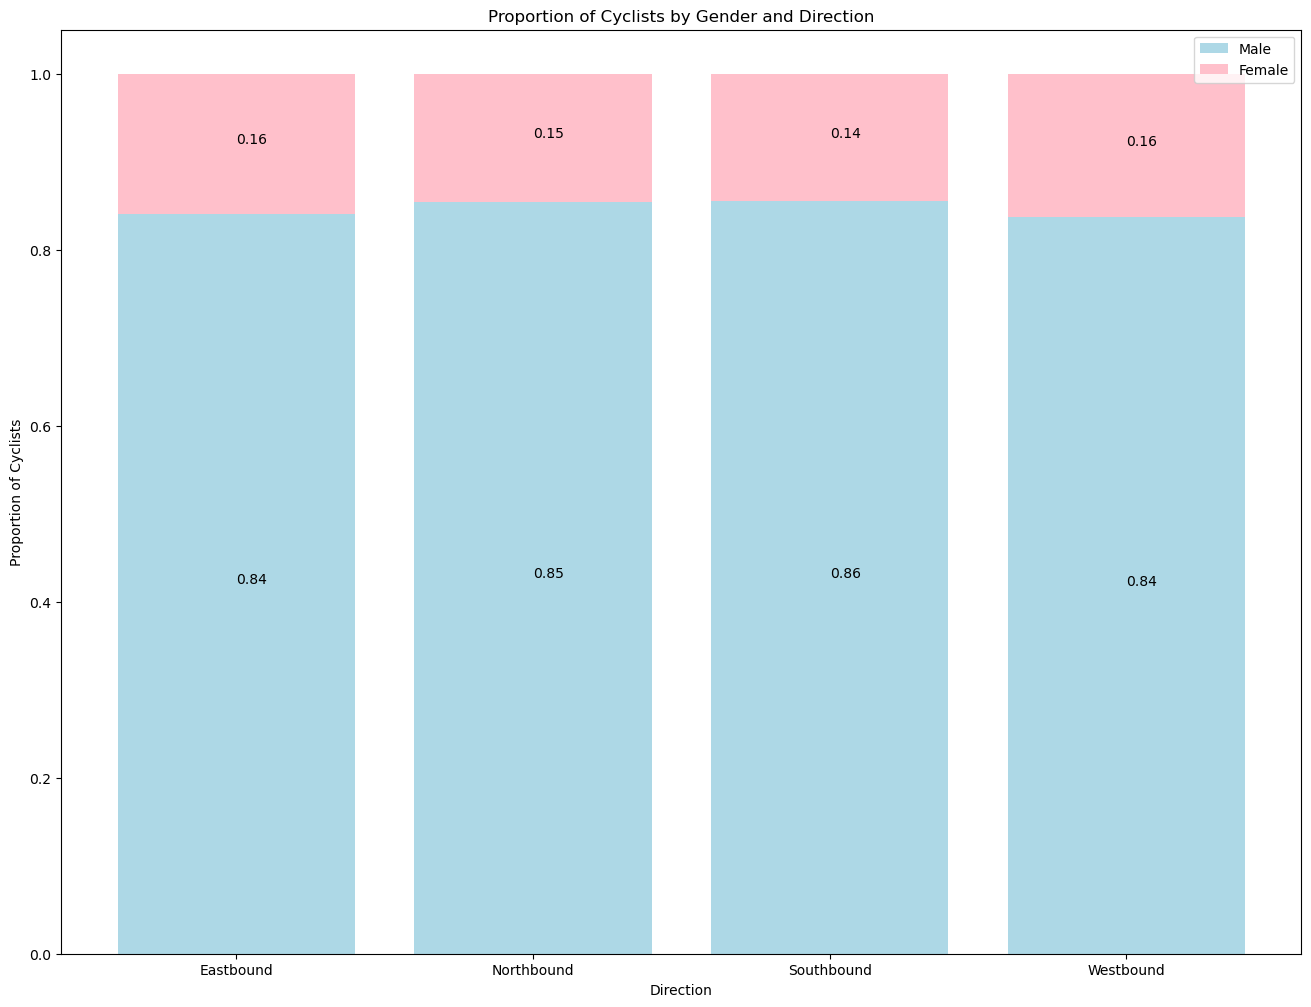

In [93]:
# Group by direction and sum the cycling numbers.
grouped_direction = outer_l.groupby('Direction')[['Number of male cycles', 'Number of female cycles']\
                                               ].sum().reset_index()

# Calculate the total cycles for each year.
grouped_direction['Total Cycles'] = grouped_direction[['Number of male cycles',\
                                             'Number of female cycles']].sum(axis=1)

# Calculate the proportions for each category.
grouped_direction['Male Proportion'] = grouped_direction['Number of male cycles'] / grouped_direction\
['Total Cycles']
grouped_direction['Female Proportion'] = grouped_direction['Number of female cycles'] / grouped_direction\
['Total Cycles']

# Set chart size.
plt.figure(figsize=(16, 12))

# Create the bars.
Male = plt.bar(grouped_direction['Direction'], grouped_direction['Male Proportion'], label='Male', color='lightblue')
Female = plt.bar(grouped_direction['Direction'], grouped_direction['Female Proportion'], label='Female',\
                 bottom=grouped_direction['Male Proportion'], color='pink')

# Create title and labels.
plt.xlabel('Direction')
plt.ylabel('Proportion of Cyclists')
plt.title('Proportion of Cyclists by Gender and Direction')
plt.legend()

# Add labels to the bars.
for year, male, female in zip(grouped_direction['Direction'], grouped_direction['Male Proportion'], \
                              grouped_direction['Female Proportion']):
    plt.text(year, male / 2, f"{male:.2f}")
    plt.text(year, male + female / 2, f"{female:.2f}")
    
# Display chart.
plt.show()

- 16% of females are traveling in a Eastbound and Westbound, while 13% are traveling and Southbound and Northbound.

### 2 Location/ Borough Analysis
*Using greater_london and greater_lon_bor datasets that were previously merged (see Extra section)*

In [94]:
# Group by borough and sum the total cycles numbers.
grouped_borough = greater_lon_bor.groupby('Borough')[['Total cycles']].sum().reset_index()

# View the dataframe.
grouped_borough.head()

,Borough,Total cycles
0,Barking & Dagenham,8940.0
1,Barnet,17893.0
2,Bexley,7499.0
3,Brent,35177.0
4,Bromley,19663.0


In [95]:
# Include population column in grouped_borough dataframe.
grouped_borough = pd.merge(grouped_borough, population_sorted, on=['Borough'], how='inner')

# View the dataframe.
grouped_borough.head()

,Borough,Total cycles,Population
0,Barnet,17893.0,402708
1,Bexley,7499.0,249877
2,Brent,35177.0,339048
3,Bromley,19663.0,332336
4,Camden,2163728.0,266927


In [96]:
# Calculate the number of rides per person per borough.
grouped_borough['Rides per person'] = (grouped_borough['Total cycles'] / grouped_borough['Population'])

# Display the dataframe with the new column.
grouped_borough.head()

,Borough,Total cycles,Population,Rides per person
0,Barnet,17893.0,402708,0.044432
1,Bexley,7499.0,249877,0.030011
2,Brent,35177.0,339048,0.103752
3,Bromley,19663.0,332336,0.059166
4,Camden,2163728.0,266927,8.106066


#### Correlation model to check between rides and property prices:

In [97]:
# Add property price data.
property_data = {'Borough': ['Barnet', 'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield',\
                             'Greenwich', 'Hackney', 'Haringey', 'Harrow', 'Havering', 'Hillingdon', 'Hounslow',\
                             'Islington', 'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton', 'Newham',\
                             'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton', 'Tower Hamlets', \
                             'Waltham Forest', 'Wandsworth', 'Westminster'],
    'Average Property Price Sqm': [6000, 4000, 5500, 5000, 11000, 4500, 6000, 4500, 5500, 8500, 7000, 5500, \
                                   4500, 5000, 5500, 10000, 6500, 8000, 6000, 7000, 5000, 5000, 8500, 7500, \
                                   4500, 7500, 5500, 9000, 14000]}

property_price = pd.DataFrame(property_data)

# Merge all dataframes.
grouped_borough_final = pd.merge(grouped_borough, property_price, on='Borough')

# Sort by rides per person.
grouped_borough_final = grouped_borough_final.sort_values(by='Rides per person', ascending=True)

# Display the dataframe.
grouped_borough_final

,Borough,Total cycles,Population,Rides per person,Average Property Price Sqm
11,Harrow,6514.0,250149,0.026040,5500
1,Bexley,7499.0,249877,0.030011,4000
7,Enfield,11564.0,339775,0.034034,4500
12,Havering,10318.0,263617,0.039140,4500
21,Redbridge,13192.0,311215,0.042389,5000
0,Barnet,17893.0,402708,0.044432,6000
5,Croydon,18786.0,394114,0.047666,4500
3,Bromley,19663.0,332336,0.059166,5000
8,Greenwich,21110.0,290606,0.072641,5500
13,Hillingdon,25743.0,318774,0.080756,5000


0.8531282237906282


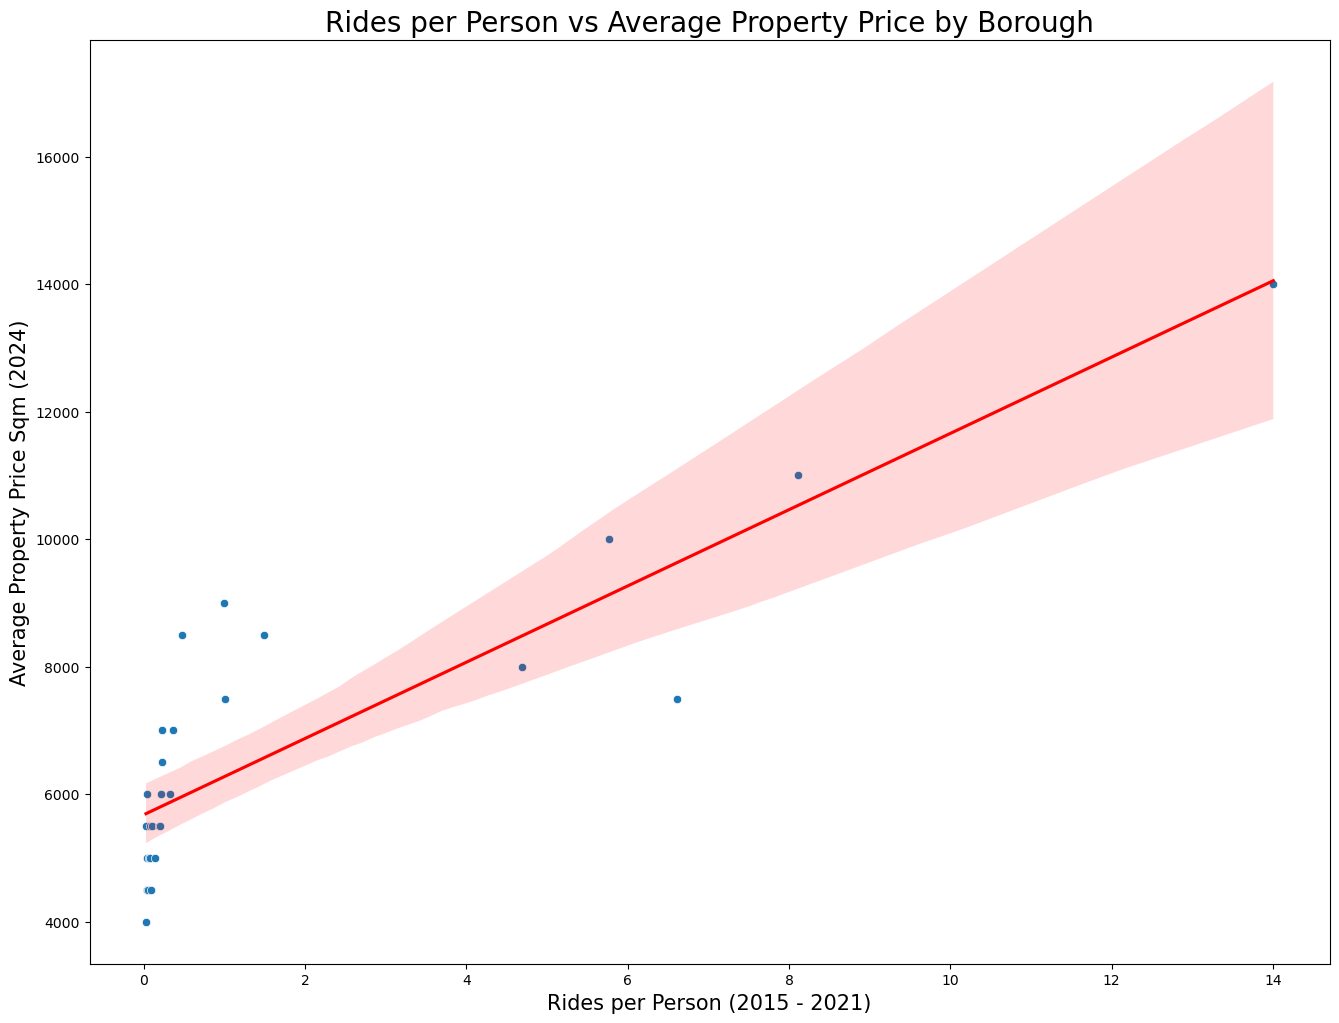

In [98]:
# Set chart size.
plt.figure(figsize = (16, 12))

# Create scatterplot.
scatterplot = sns.scatterplot(x = 'Rides per person', y = 'Average Property Price Sqm',\
                              data = grouped_borough_final)

# Add a regression line.
sns.regplot(x = 'Rides per person', y = 'Average Property Price Sqm', data = grouped_borough_final,\
            scatter = False, color = 'red')

# Set title and labels.
plt.title('Rides per Person vs Average Property Price by Borough', fontsize = 20)
plt.xlabel('Rides per Person (2015 - 2021)', fontsize = 15)
plt.ylabel('Average Property Price Sqm (2024)', fontsize = 15)

# Calculate the correlation coefficient.
correlation = grouped_borough_final['Rides per person'].corr(grouped_borough_final['Average Property Price Sqm'])

# Display the correlation coefficent & the plot.
print(correlation)
plt.show()

- There is a positive correlation between property price and rides per person per borough with a correlation coefficient of .86

#### OLS model: Set the variables, fitting the model, and calling the predictions for X

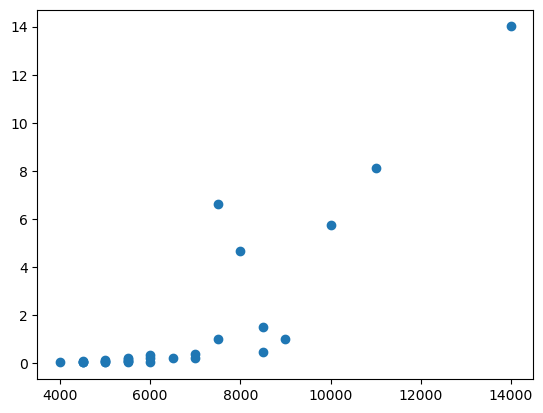

In [99]:
# Define the dependent variable.
y = grouped_borough_final['Rides per person']

# Define the independent variable.
X = grouped_borough_final['Average Property Price Sqm']

# Check for linearity.
plt.scatter(X,y)

In [100]:
# Create formula and pass through OLS model.
f = 'y ~ X'
test = ols(f, data = grouped_borough_final).fit()

# Print the regression table.
test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.728
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     72.20
Date:                Fri, 07 Jun 2024   Prob (F-statistic):           4.13e-09
Time:                        15:44:35   Log-Likelihood:                -55.857
No. Observations:                  29   AIC:                             115.7
Df Residuals:                      27   BIC:                             118.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.4842      1.001     -6.479      0.000      -8.538      -4.431
X              0.0012      0.000      8.497      0.000       0.001       0.002
==============================================================================
Omnibus:                        0.988   Durbin-Watson:                   0.847
Prob(Omnibus):                  0.610   Jarque-Bera (JB):                0.192
Skew:                           0.043   Prob(JB):                        0.909
Kurtosis:                       3.389   Cond. No.                     2.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [101]:
# Linear Equation and Prediction:
# x coef: -6.4204.
# Constant coef: 0.0012.
# Create the linear equation.
y_pred = -6.4204 + 0.0012 * X

# View the output.
y_pred

11     0.1796
1     -1.6204
7     -1.0204
12    -1.0204
21    -0.4204
0      0.7796
5     -1.0204
3     -0.4204
8      0.1796
13    -0.4204
24    -1.0204
2      0.1796
20    -0.4204
14     0.1796
26     0.1796
6      0.7796
10     1.9796
16     1.3796
18     0.7796
19     1.9796
22     3.7796
27     4.3796
25     2.5796
9      3.7796
17     3.1796
15     5.5796
23     2.5796
4      6.7796
28    10.3796
Name: Average Property Price Sqm, dtype: float64

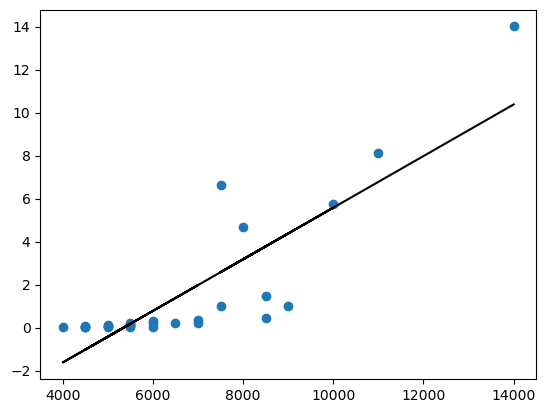

In [102]:
# Plot the data points.
plt.scatter(X, y)

# Plot the line.
plt.plot(X, y_pred, color='black')

In [103]:
# Add distance data.
distance_data = {'Borough': ['Barnet', 'Bexley', 'Brent', 'Bromley', 'Camden', 'Croydon', 'Ealing', 'Enfield', \
                             'Greenwich', 'Hackney', 'Haringey', 'Harrow', 'Havering', 'Hillingdon',\
                             'Hounslow', 'Islington', 'Kingston upon Thames', 'Lambeth', 'Lewisham', 'Merton',\
                             'Newham', 'Redbridge', 'Richmond upon Thames', 'Southwark', 'Sutton',\
                             'Tower Hamlets', 'Waltham Forest', 'Wandsworth', 'Westminster'],
    'Distance to City Center': [13, 22, 9, 19, 4, 16, 12, 15, 8, 6, 9, 18, 28, 25, 17, 3, 16, 2, 10, 13,\
                                       11, 18, 12, 2, 20, 6, 12, 6, 1]}

distance = pd.DataFrame(distance_data)

# Merge all dataframes.
grouped_borough_distance = pd.merge(grouped_borough_final, distance, on='Borough')

# Sort by rides per person.
grouped_borough_distance = grouped_borough_distance.sort_values(by='Rides per person', ascending=True)

# Display the dataframe.
grouped_borough_distance

,Borough,Total cycles,Population,Rides per person,Average Property Price Sqm,Distance to City Center
0,Harrow,6514.0,250149,0.026040,5500,18
1,Bexley,7499.0,249877,0.030011,4000,22
2,Enfield,11564.0,339775,0.034034,4500,15
3,Havering,10318.0,263617,0.039140,4500,28
4,Redbridge,13192.0,311215,0.042389,5000,18
5,Barnet,17893.0,402708,0.044432,6000,13
6,Croydon,18786.0,394114,0.047666,4500,16
7,Bromley,19663.0,332336,0.059166,5000,19
8,Greenwich,21110.0,290606,0.072641,5500,8
9,Hillingdon,25743.0,318774,0.080756,5000,25


-0.6394311828855245


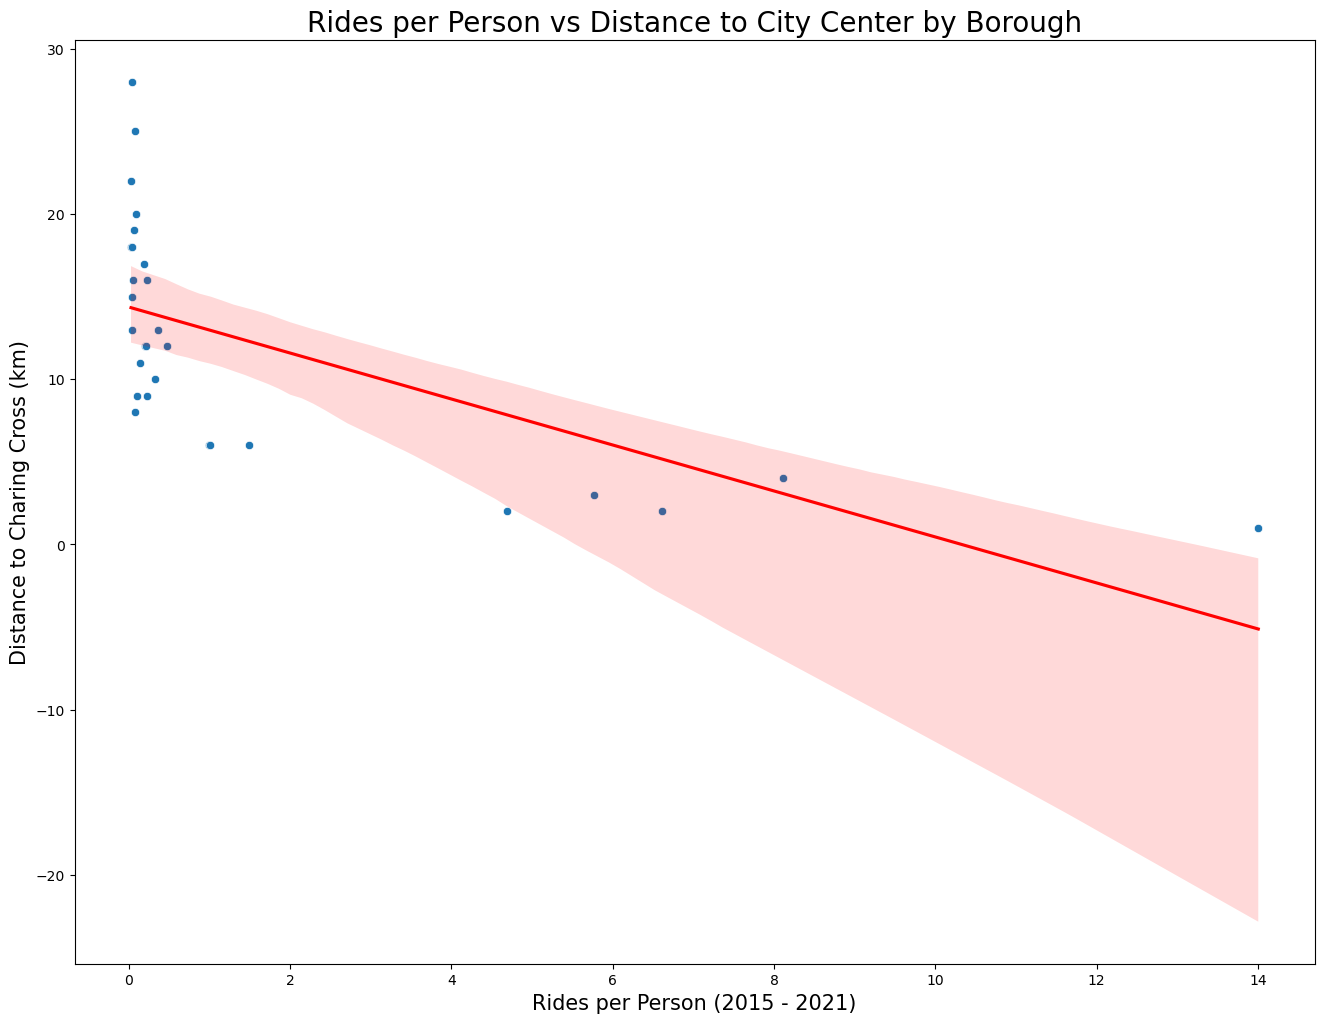

In [104]:
# Set chart size.
plt.figure(figsize = (16, 12))

# Create scatterplot.
scatterplot = sns.scatterplot(x = 'Rides per person', y = 'Distance to City Center',\
                              data = grouped_borough_distance)

# Add a regression line.
sns.regplot(x = 'Rides per person', y = 'Distance to City Center', data = grouped_borough_distance,\
            scatter = False, color = 'red')

# Set title and labels.
plt.title('Rides per Person vs Distance to City Center by Borough', fontsize = 20)
plt.xlabel('Rides per Person (2015 - 2021)', fontsize = 15)
plt.ylabel('Distance to Charing Cross (km)', fontsize = 15)

# Calculate the correlation coefficient.
correlation = grouped_borough_distance['Rides per person'].corr(grouped_borough_distance['Distance to City Center'])

# Display the correlation coefficent & the plot.
print(correlation)
plt.show()

- There is a moderately strong negative correlation between distance to city center and rides per person.

## Cycle Hire and Cycleways Analysis: 
### 1a. Santander Bikes Performance

In [105]:
# Import cycle_hire_performance.
cycle_hire_performance = pd.read_csv('cycle_hire_performance.csv')

# Sense check the data.
cycle_hire_performance.head()

,Month,Member Hires,Casual Hires,Total Hires
0,Apr-17,"472,308","445,268","917,576"
1,May-17,"549,990","442,611","992,601"
2,Jun-17,"578,007","520,287","1,098,294"
3,Jul-17,"568,728","563,110","1,131,838"
4,Aug-17,"504,070","490,129","994,199"


In [106]:
# Display the first few rows of the DataFrame
print(cycle_hire_performance.head())

# Summary statistics
print(cycle_hire_performance.describe())

# Check for missing values
print(cycle_hire_performance.isnull().sum())

    Month Member Hires Casual Hires Total Hires
0  Apr-17      472,308      445,268     917,576
1  May-17      549,990      442,611     992,601
2  Jun-17      578,007      520,287   1,098,294
3  Jul-17      568,728      563,110   1,131,838
4  Aug-17      504,070      490,129     994,199
         Month Member Hires Casual Hires Total Hires
count       84           84           84          84
unique      84           84           84          84
top     Apr-17      472,308      445,268     917,576
freq         1            1            1           1
Month           0
Member Hires    0
Casual Hires    0
Total Hires     0
dtype: int64


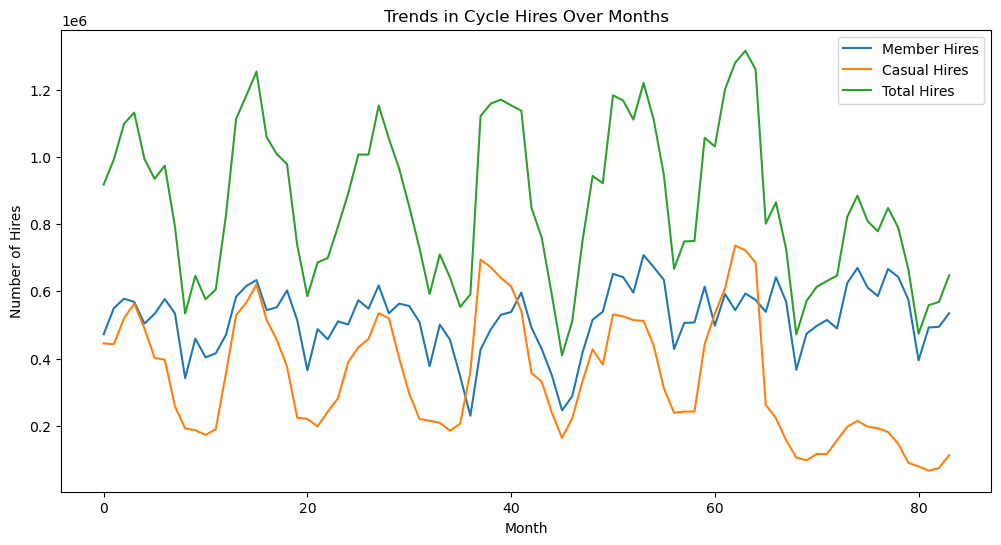

In [107]:
# Prepare the data for plotting in a graph
# Ensure the columns are strings before removing commas
cycle_hire_performance['Member Hires'] = cycle_hire_performance['Member Hires'].astype(str)
cycle_hire_performance['Casual Hires'] = cycle_hire_performance['Casual Hires'].astype(str)
cycle_hire_performance['Total Hires'] = cycle_hire_performance['Total Hires'].astype(str)

# Remove commas and convert columns to numeric types
cycle_hire_performance['Member Hires'] = cycle_hire_performance['Member Hires'].str.replace(',', '').astype(int)
cycle_hire_performance['Casual Hires'] = cycle_hire_performance['Casual Hires'].str.replace(',', '').astype(int)
cycle_hire_performance['Total Hires'] = cycle_hire_performance['Total Hires'].str.replace(',', '').astype(int)

# Convert 'Month' to datetime
cycle_hire_performance['Month'] = pd.to_datetime(cycle_hire_performance['Month'], format='%b-%y')

# Extract Year and Month for YoY comparison
cycle_hire_performance['Year'] = cycle_hire_performance['Month'].dt.year
cycle_hire_performance['Month_Num'] = cycle_hire_performance['Month'].dt.month
cycle_hire_performance['Month_Name'] = cycle_hire_performance['Month'].dt.strftime('%b')

# Pivot for easier plotting
pivot_df = cycle_hire_performance.pivot(index='Month_Num', columns='Year', values=['Member Hires', 'Casual Hires'])

# Plot trends over time
plt.figure(figsize=(12, 6))
plt.plot(cycle_hire_performance.index, cycle_hire_performance['Member Hires'], label='Member Hires')
plt.plot(cycle_hire_performance.index, cycle_hire_performance['Casual Hires'], label='Casual Hires')
plt.plot(cycle_hire_performance.index, cycle_hire_performance['Total Hires'], label='Total Hires')
plt.xlabel('Month')
plt.ylabel('Number of Hires')
plt.title('Trends in Cycle Hires Over Months')
plt.legend()
plt.show()

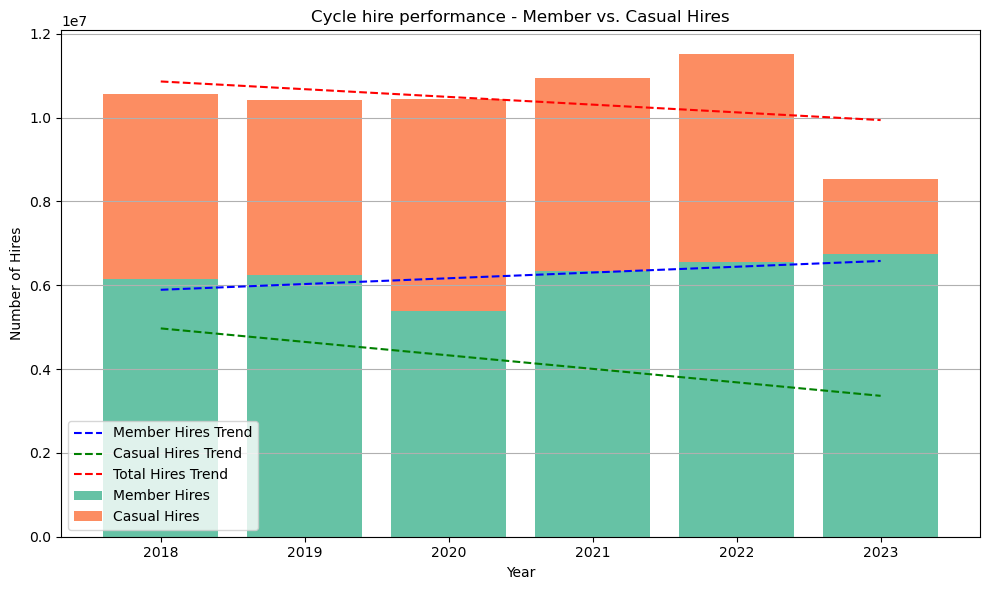

In [108]:
# Exclude data for the years 2017 and 2024
cycle_hire_performance = cycle_hire_performance[~cycle_hire_performance['Year'].isin([2017, 2024])]

# Aggregate data by year
yearly_data = cycle_hire_performance.groupby('Year').agg({
    'Member Hires': 'sum',
    'Casual Hires': 'sum',
    'Total Hires': 'sum'
}).reset_index()

# Plotting Simplified Yearly Stacked Bar Chart with Better Colors and Trend Lines
plt.figure(figsize=(10, 6))

# Define colors
colors = ['#66c2a5', '#fc8d62']

# Stacked bar chart for Member Hires and Casual Hires by Year
plt.bar(yearly_data['Year'], yearly_data['Member Hires'], color=colors[0], label='Member Hires')
plt.bar(yearly_data['Year'], yearly_data['Casual Hires'], bottom=yearly_data['Member Hires'], color=colors[1], label='Casual Hires')

# Adding trend lines
model = LinearRegression()
x = yearly_data['Year'].values.reshape(-1, 1)

# Trend line for Member Hires
model.fit(x, yearly_data['Member Hires'])
plt.plot(x, model.predict(x), color='blue', linestyle='--', label='Member Hires Trend')

# Trend line for Casual Hires
model.fit(x, yearly_data['Casual Hires'])
plt.plot(x, model.predict(x), color='green', linestyle='--', label='Casual Hires Trend')

# Trend line for Total Hires
model.fit(x, yearly_data['Total Hires'])
plt.plot(x, model.predict(x), color='red', linestyle='--', label='Total Hires Trend')

# Adding labels and title
plt.title('Cycle hire performance - Member vs. Casual Hires')
plt.xlabel('Year')
plt.ylabel('Number of Hires')
plt.legend()

# Display the plot
plt.xticks(yearly_data['Year'])
plt.grid(axis='y')
plt.tight_layout()
plt.show()

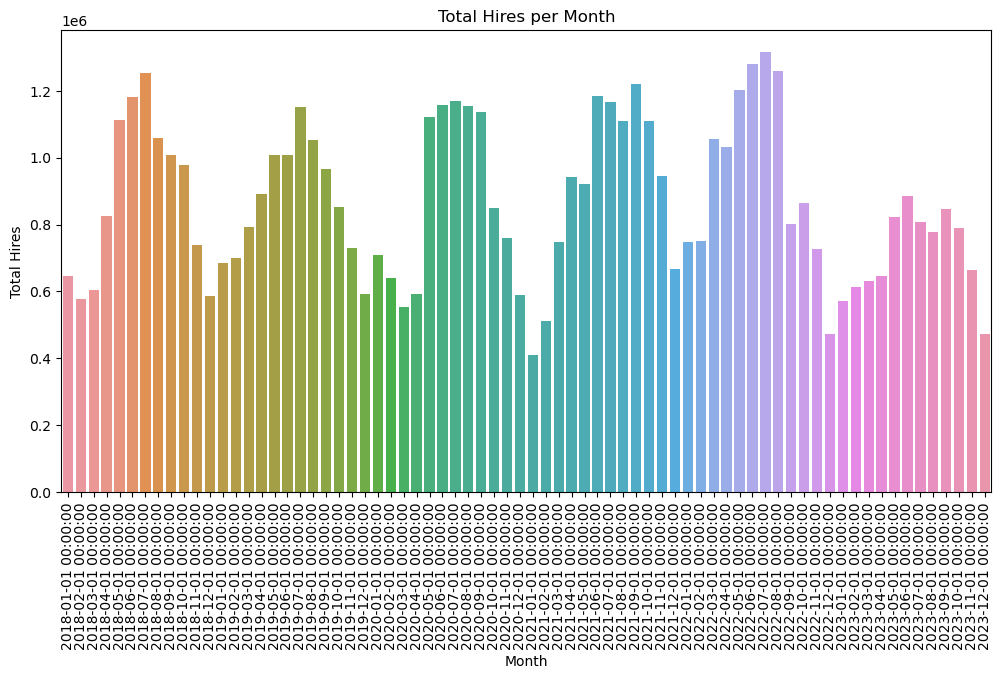

In [109]:
# Reset index to get Month back as a column
cycle_hire_performance.reset_index(inplace=True)

# Bar plot for monthly comparisons
plt.figure(figsize=(12, 6))
sns.barplot(x='Month', y='Total Hires', data=cycle_hire_performance)
plt.title('Total Hires per Month')
plt.xlabel('Month')
plt.ylabel('Total Hires')
plt.xticks(rotation=90)
plt.show()

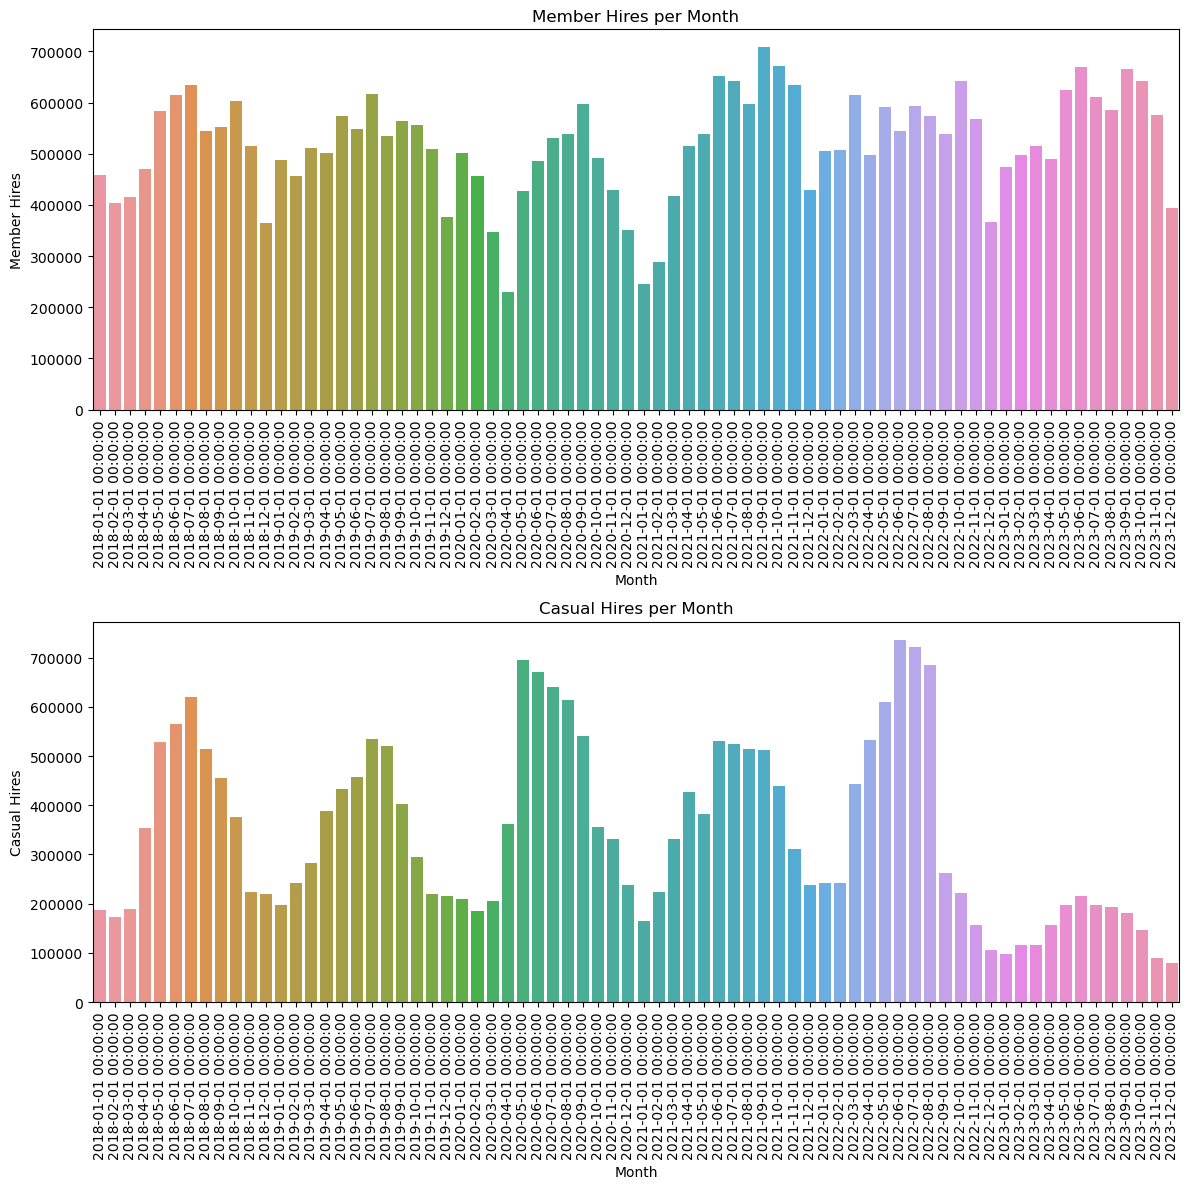

In [110]:
# Bar plots for Member and Casual Hires
fig, ax = plt.subplots(2, 1, figsize=(12, 12))

sns.barplot(x='Month', y='Member Hires', data=cycle_hire_performance, ax=ax[0])
ax[0].set_title('Member Hires per Month')
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Member Hires')
ax[0].tick_params(axis='x', rotation=90)

sns.barplot(x='Month', y='Casual Hires', data=cycle_hire_performance, ax=ax[1])
ax[1].set_title('Casual Hires per Month')
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Casual Hires')
ax[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()

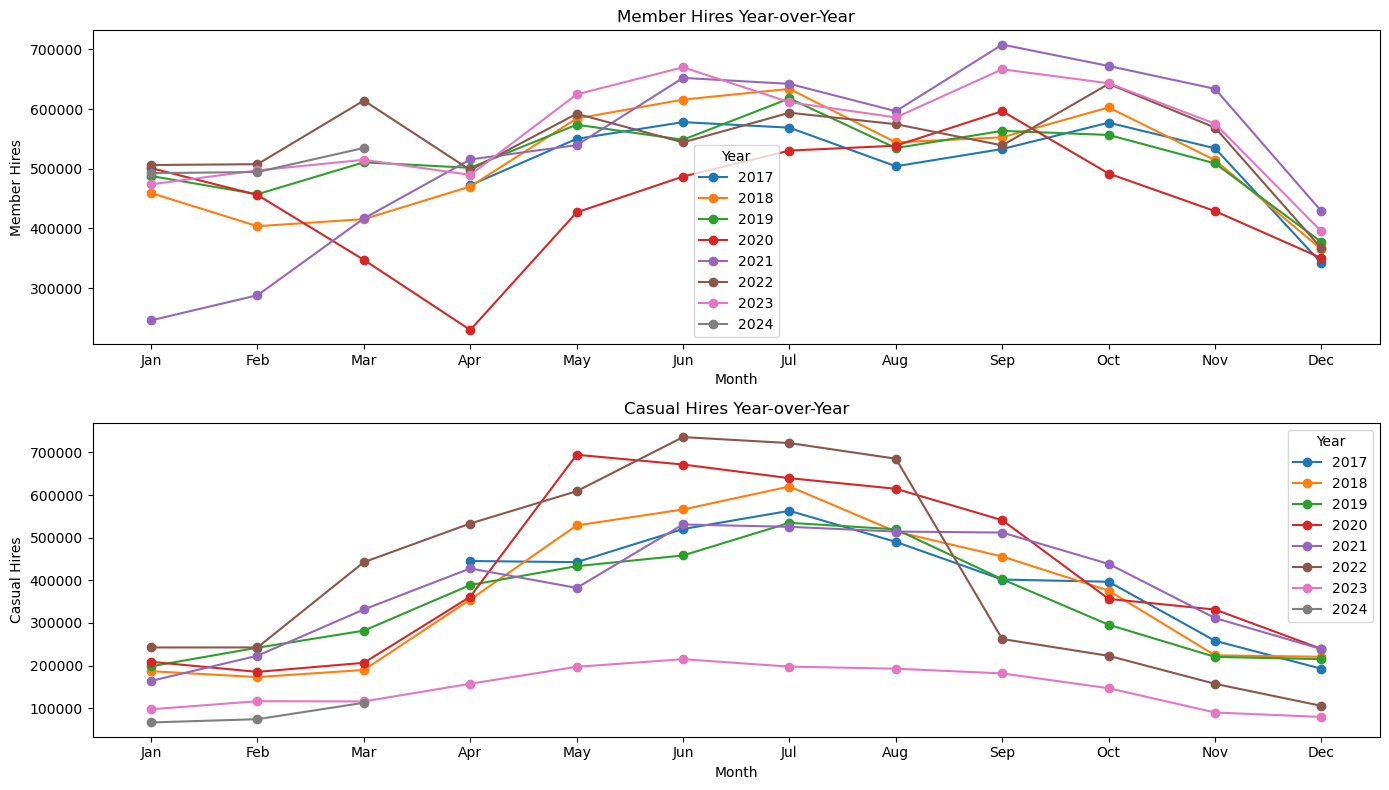

In [111]:
# Plotting YoY Trends
plt.figure(figsize=(14, 8))

# Plot Member Hires YoY
plt.subplot(2, 1, 1)
pivot_df['Member Hires'].plot(ax=plt.gca(), marker='o')
plt.title('Member Hires Year-over-Year')
plt.xlabel('Month')
plt.ylabel('Member Hires')
plt.legend(title='Year')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Plot Casual Hires YoY
plt.subplot(2, 1, 2)
pivot_df['Casual Hires'].plot(ax=plt.gca(), marker='o')
plt.title('Casual Hires Year-over-Year')
plt.xlabel('Month')
plt.ylabel('Casual Hires')
plt.legend(title='Year')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()
plt.show()

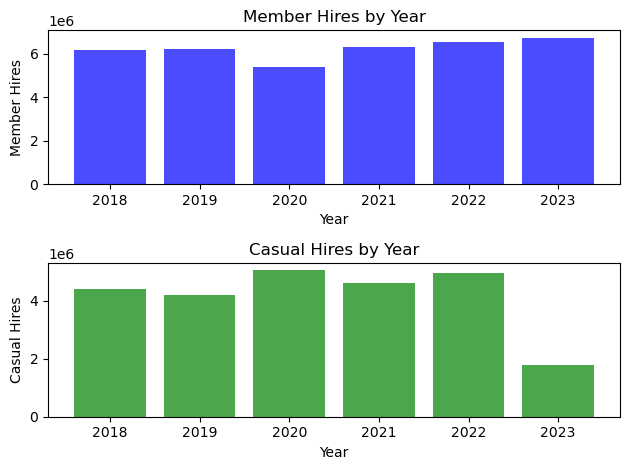

In [112]:
# Plot Member Hires by Year
plt.subplot(2, 1, 1)
plt.bar(yearly_data['Year'], yearly_data['Member Hires'], color='blue', alpha=0.7)
plt.title('Member Hires by Year')
plt.xlabel('Year')
plt.ylabel('Member Hires')
plt.xticks(yearly_data['Year'], rotation=0)

# Plot Casual Hires by Year
plt.subplot(2, 1, 2)
plt.bar(yearly_data['Year'], yearly_data['Casual Hires'], color='green', alpha=0.7)
plt.title('Casual Hires by Year')
plt.xlabel('Year')
plt.ylabel('Casual Hires')
plt.xticks(yearly_data['Year'], rotation=0)

plt.tight_layout()
plt.show()

In [113]:
# Calculate YoY percentage difference for each hire column
yearly_data['YoY Member Hires (%)'] = yearly_data['Member Hires'].pct_change() * 100
yearly_data['YoY Casual Hires (%)'] = yearly_data['Casual Hires'].pct_change() * 100
yearly_data['YoY Total Hires (%)'] = yearly_data['Total Hires'].pct_change() * 100

# Format the YoY percentage columns to show percentage values
yearly_data['YoY Member Hires (%)'] = yearly_data['YoY Member Hires (%)'].map('{:.2f}%'.format)
yearly_data['YoY Casual Hires (%)'] = yearly_data['YoY Casual Hires (%)'].map('{:.2f}%'.format)
yearly_data['YoY Total Hires (%)'] = yearly_data['YoY Total Hires (%)'].map('{:.2f}%'.format)

# Drop the first row as it will have NaN values for the YoY percentages
yearly_data = yearly_data.dropna(subset=['YoY Member Hires (%)', 'YoY Casual Hires (%)', 'YoY Total Hires (%)'])

# Print the updated DataFrame with annual data and YoY percentages
yearly_data

,Year,Member Hires,Casual Hires,Total Hires,YoY Member Hires (%),YoY Casual Hires (%),YoY Total Hires (%)
0,2018,6160563,4409549,10570112,nan%,nan%,nan%
1,2019,6237468,4190352,10427820,1.25%,-4.97%,-1.35%
2,2020,5383925,5050242,10434167,-13.68%,20.52%,0.06%
3,2021,6338339,4599837,10938176,17.73%,-8.92%,4.83%
4,2022,6546407,4960482,11506889,3.28%,7.84%,5.20%
5,2023,6746774,1785677,8532451,3.06%,-64.00%,-25.85%


### Findings:

- Member hires has a slight upward trend, whereas casual hires has a downward trend
- 2022 saw the highest number of rentals, whereas 2023 saw the lowest. The downward trend appears to have started in September 2022

### 1b. Santander Bikes - Evidence of Success

5 new docking stations were opened in Southwark in 2019. We will look at inner london data to see the effects of cycling count both before and after the docking stations opened

In [114]:
# Convert 'Year' column from float to integer
inner_l['Year'] = inner_l['Year'].astype(int)

# Using a left join, bring across 'Borough' and 'ProdID' from the bike site df to the inner_l df using the common
# 'Location' column
inner_london = inner_l.merge(bike_site[['Location', 'Borough', 'ProgID']], on='Location', how='left')

# Display the updated df_inner_l_cycle_hire DataFrame
inner_london.head()

,Year,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Day of Week,Area,Borough,ProgID
0,2015,INNCY001,Grove Road,2015-05-20 00:00:00,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,1.0,0.0,1.0,Wednesday,Inner,Tower Hamlets,INNCY
1,2015,INNCY001,Grove Road,2015-05-20 00:00:00,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,1.0,0.0,1.0,Wednesday,Inner,Merton,OUTCY
2,2015,INNCY001,Grove Road,2015-05-20 00:00:00,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,2.0,0.0,2.0,Wednesday,Inner,Tower Hamlets,INNCY
3,2015,INNCY001,Grove Road,2015-05-20 00:00:00,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,2.0,0.0,2.0,Wednesday,Inner,Merton,OUTCY
4,2015,INNCY001,Grove Road,2015-05-20 00:00:00,Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,2.0,0.0,2.0,Wednesday,Inner,Tower Hamlets,INNCY


In [115]:
# Filter the DataFrame for Borough = 'Southwark'
southwark_df = inner_london[inner_london['Borough'] == 'Southwark']

# Group by 'Year' and calculate the sum of 'Number of private cycles' and 'Number of cycle hire bikes'
southwark_yearly_df = southwark_df.groupby('Year').agg({
    'Number of private cycles': 'sum',
    'Number of cycle hire bikes': 'sum'
}).reset_index()

# Display the new DataFrame
print(southwark_yearly_df.head())

   Year  Number of private cycles  Number of cycle hire bikes
0  2015                   40429.0                        96.0
1  2016                   45937.0                       152.0
2  2017                   49642.0                       223.0
3  2018                   51592.0                       266.0
4  2019                   45867.0                       462.0


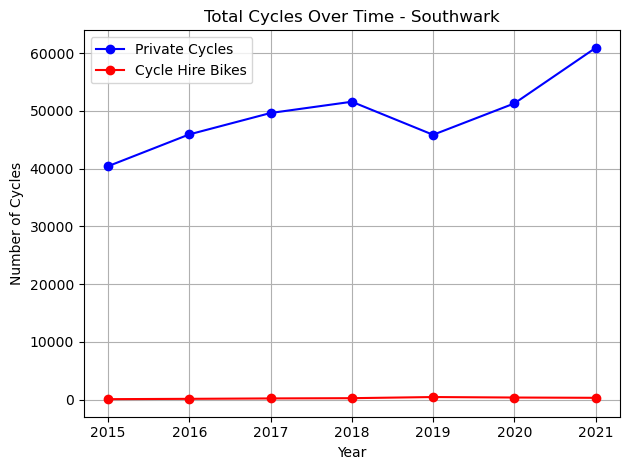

In [116]:
# Extracting data from the DataFrame
years = southwark_yearly_df['Year']
private_cycles = southwark_yearly_df['Number of private cycles']
cycle_hire_bikes = southwark_yearly_df['Number of cycle hire bikes']

# Create the plot
plt.plot(years, private_cycles, marker='o', color='b', label='Private Cycles')
plt.plot(years, cycle_hire_bikes, marker='o', color='r', label='Cycle Hire Bikes')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Number of Cycles')
plt.title('Total Cycles Over Time - Southwark')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [117]:
# Perform min-max scaling to normalise the data
southwark_yearly_df['Normalized Private Cycles'] = (southwark_yearly_df['Number of private cycles'] - southwark_yearly_df['Number of private cycles'].min()) / (southwark_yearly_df['Number of private cycles'].max() - southwark_yearly_df['Number of private cycles'].min())
southwark_yearly_df['Normalized Cycle Hire Bikes'] = (southwark_yearly_df['Number of cycle hire bikes'] - southwark_yearly_df['Number of cycle hire bikes'].min()) / (southwark_yearly_df['Number of cycle hire bikes'].max() - southwark_yearly_df['Number of cycle hire bikes'].min())

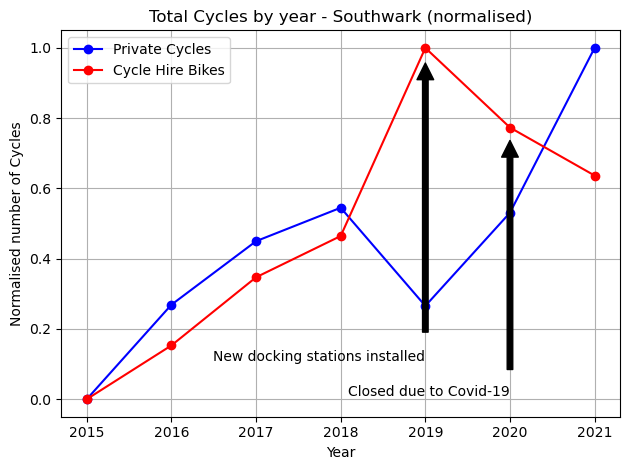

In [118]:
# Rereate the plot with normalised data and callout points for opening data and Covid-19
plt.plot(southwark_yearly_df['Year'], southwark_yearly_df['Normalized Private Cycles'], marker='o', color='b', label='Private Cycles')
plt.plot(southwark_yearly_df['Year'], southwark_yearly_df['Normalized Cycle Hire Bikes'], marker='o', color='r', label='Cycle Hire Bikes')

# Add callout for 2019
plt.annotate('New docking stations installed', xy=(2019, southwark_yearly_df.loc[southwark_yearly_df['Year'] == 2019, 'Normalized Cycle Hire Bikes'].values), xytext=(2019, 0.1), 
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10, ha='right', va='bottom')

# Add callout for 2020
plt.annotate('Closed due to Covid-19', xy=(2020, southwark_yearly_df.loc[southwark_yearly_df['Year'] == 2020, 'Normalized Cycle Hire Bikes'].values), xytext=(2020, 0.0), 
             arrowprops=dict(facecolor='black', shrink=0.05), fontsize=10, ha='right', va='bottom')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Normalised number of Cycles')
plt.title('Total Cycles by year - Southwark (normalised)')

# Add legend
plt.legend()

# Show plot
plt.grid(True)
plt.tight_layout()
plt.show()

In [119]:
# Add a year-on-year percentage column to see the percentage difference both before and after the stations opened
# Create DataFrame
southwark_yearly_df_yoy = southwark_yearly_df

# Calculate the year-over-year (YoY) percentage difference for each column
southwark_yearly_df_yoy['YoY % Difference - Private Cycles'] = southwark_yearly_df_yoy['Number of private cycles'].pct_change() * 100
southwark_yearly_df_yoy['YoY % Difference - Cycle Hire Bikes'] = southwark_yearly_df_yoy['Number of cycle hire bikes'].pct_change() * 100

# Format the percentage values with the % sign
southwark_yearly_df_yoy['YoY % Difference - Private Cycles'] = southwark_yearly_df_yoy['YoY % Difference - Private Cycles'].map('{:.2f}%'.format)
southwark_yearly_df_yoy['YoY % Difference - Cycle Hire Bikes'] = southwark_yearly_df_yoy['YoY % Difference - Cycle Hire Bikes'].map('{:.2f}%'.format)

# View the DataFrame with YoY percentage difference columns
southwark_yearly_df_yoy

,Year,Number of private cycles,Number of cycle hire bikes,Normalized Private Cycles,Normalized Cycle Hire Bikes,YoY % Difference - Private Cycles,YoY % Difference - Cycle Hire Bikes
0,2015,40429.0,96.0,0.000000,0.000000,nan%,nan%
1,2016,45937.0,152.0,0.268880,0.153005,13.62%,58.33%
2,2017,49642.0,223.0,0.449744,0.346995,8.07%,46.71%
3,2018,51592.0,266.0,0.544935,0.464481,3.93%,19.28%
4,2019,45867.0,462.0,0.265463,1.000000,-11.10%,73.68%
5,2020,51303.0,379.0,0.530827,0.773224,11.85%,-17.97%
6,2021,60914.0,329.0,1.000000,0.636612,18.73%,-13.19%


### Findings:

- There is a significant increase in 74% for cycle hire bikes in 2019 when the docking stations opened

### 1c. High Potential Boroughs for Santander Bikes

In [120]:
# Import prioritised boroughs for docking stations.
prioritised_boroughs_docking_stations = pd.read_csv('Prioritised Boroughs for docking stations_2.csv')

# Sense check the data.
prioritised_boroughs_docking_stations.head()

,Borough,Population,Proportion of private bikes,Proportion of hire bikes,Total Cycles,Distance to Central London (miles),Cycles count over population size
0,Bexley,249877,83.45%,16.55%,7499,13,0.8%
1,Enfield,339775,96.61%,3.39%,11564,11,1.5%
2,Havering,263617,96.59%,3.41%,10318,15,1.5%
3,Redbridge,311215,91.99%,8.01%,13192,10,1.9%
4,Barnet,402708,90.78%,9.22%,17893,11,2.0%


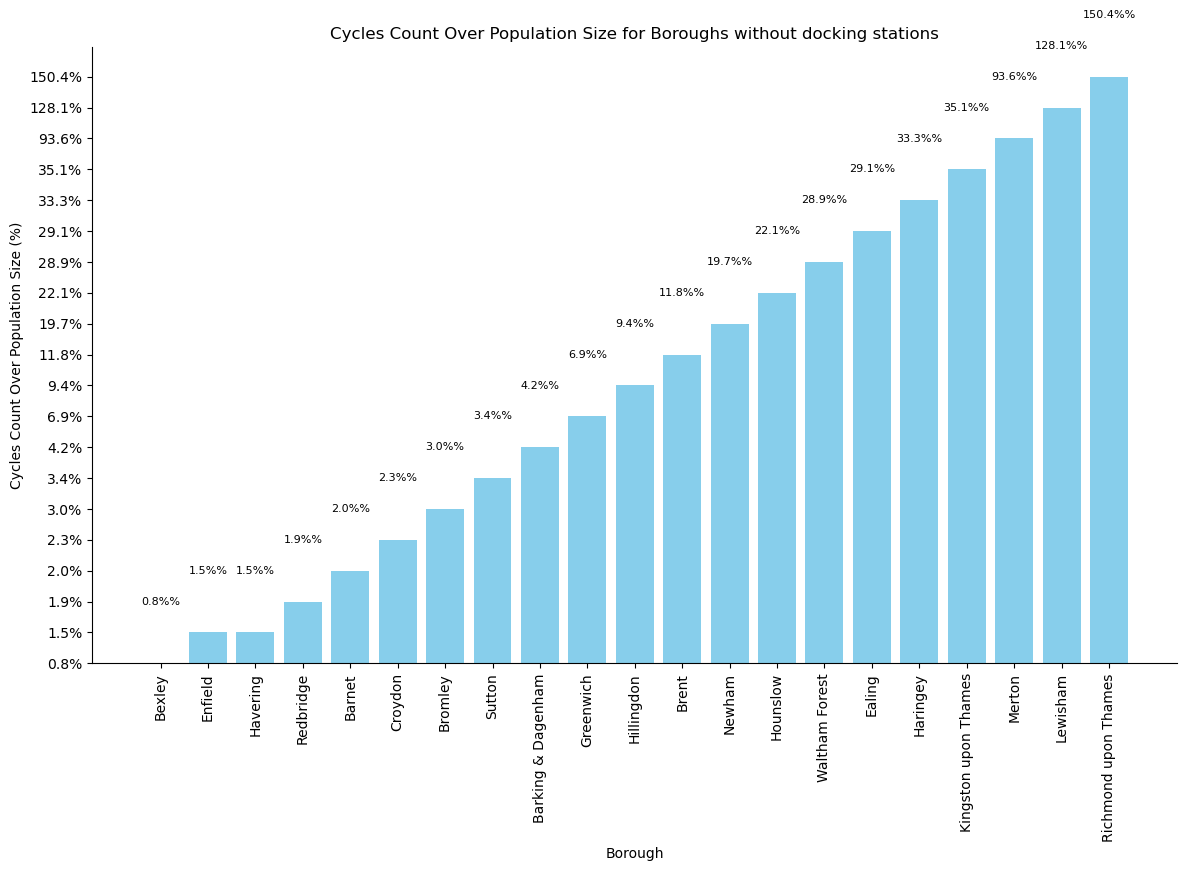

In [121]:
# Plot on a graph 
data = prioritised_boroughs_docking_stations

# Create DataFrame
df = pd.DataFrame(data)

# Plotting Cycles count over population size vs Borough
plt.figure(figsize=(14, 8))
bars = plt.bar(df['Borough'], df['Cycles count over population size'], color='skyblue')
plt.xlabel('Borough')
plt.ylabel('Cycles Count Over Population Size (%)')
plt.title('Cycles Count Over Population Size for Boroughs without docking stations')
plt.xticks(rotation=90)

# Adding labels for the percentage on top of the bars
for bar, percentage in zip(bars, df['Cycles count over population size']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 2, f"{percentage}%", va='center', ha='center', color='black', fontsize=8)

# Removing the box
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.show()

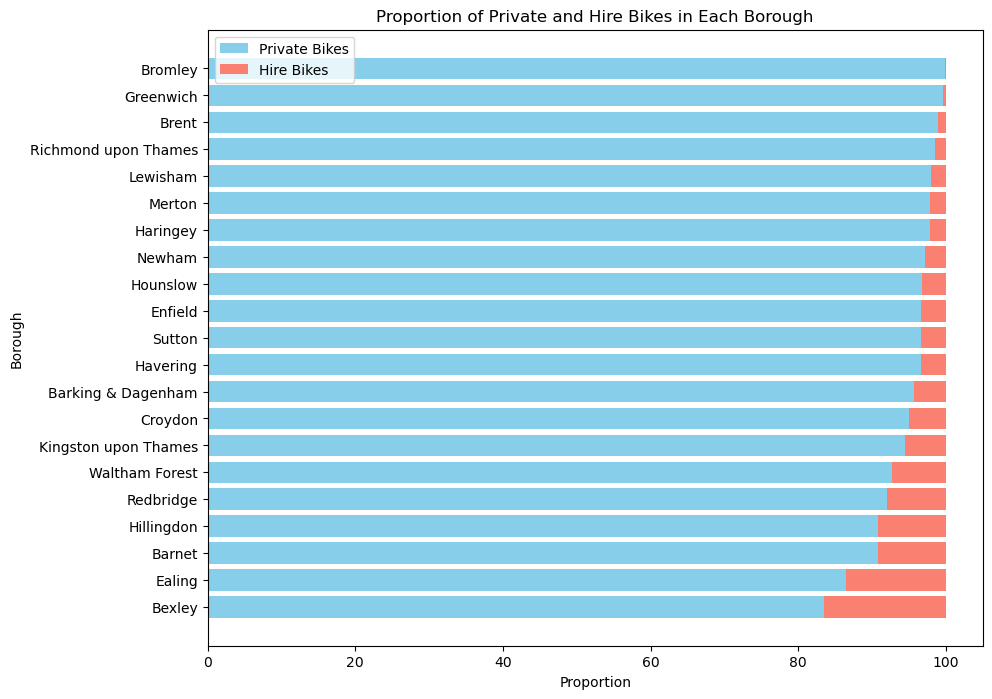

In [3]:
# View the proportion of private vs. hire cycles
data = {
    'Borough': ['Richmond upon Thames', 'Lewisham', 'Merton', 'Kingston upon Thames', 'Haringey',
                'Ealing', 'Waltham Forest', 'Hounslow', 'Newham', 'Brent', 'Hillingdon',
                'Greenwich', 'Barking & Dagenham', 'Sutton', 'Bromley', 'Croydon', 'Barnet',
                'Redbridge', 'Havering', 'Enfield', 'Bexley'],
    'Proportion of private bikes': [98.59, 98.03, 97.84, 94.52, 97.82, 86.49, 92.73, 96.74, 97.25, 98.92,
                                    90.78, 99.65, 95.68, 96.59, 99.91, 95.0, 90.78, 91.99, 96.59, 96.61, 83.45],
    'Proportion of hire bikes': [1.41, 1.97, 2.16, 5.48, 2.18, 13.51, 7.27, 3.26, 2.75, 1.08,
                                  9.22, 0.35, 4.32, 3.41, 0.09, 5.0, 9.22, 8.01, 3.41, 3.39, 16.55]
}

# Create DataFrame
df = pd.DataFrame(data)

# Sort by proportion of private bikes
df = df.sort_values(by='Proportion of private bikes', ascending=False)

# Plot
plt.figure(figsize=(10, 8))
plt.barh(df['Borough'], df['Proportion of private bikes'], color='skyblue', label='Private Bikes')
plt.barh(df['Borough'], df['Proportion of hire bikes'], left=df['Proportion of private bikes'], color='salmon', label='Hire Bikes')
plt.xlabel('Proportion')
plt.ylabel('Borough')
plt.title('Proportion of Private and Hire Bikes in Each Borough')
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis to display boroughs from top to bottom
plt.show()

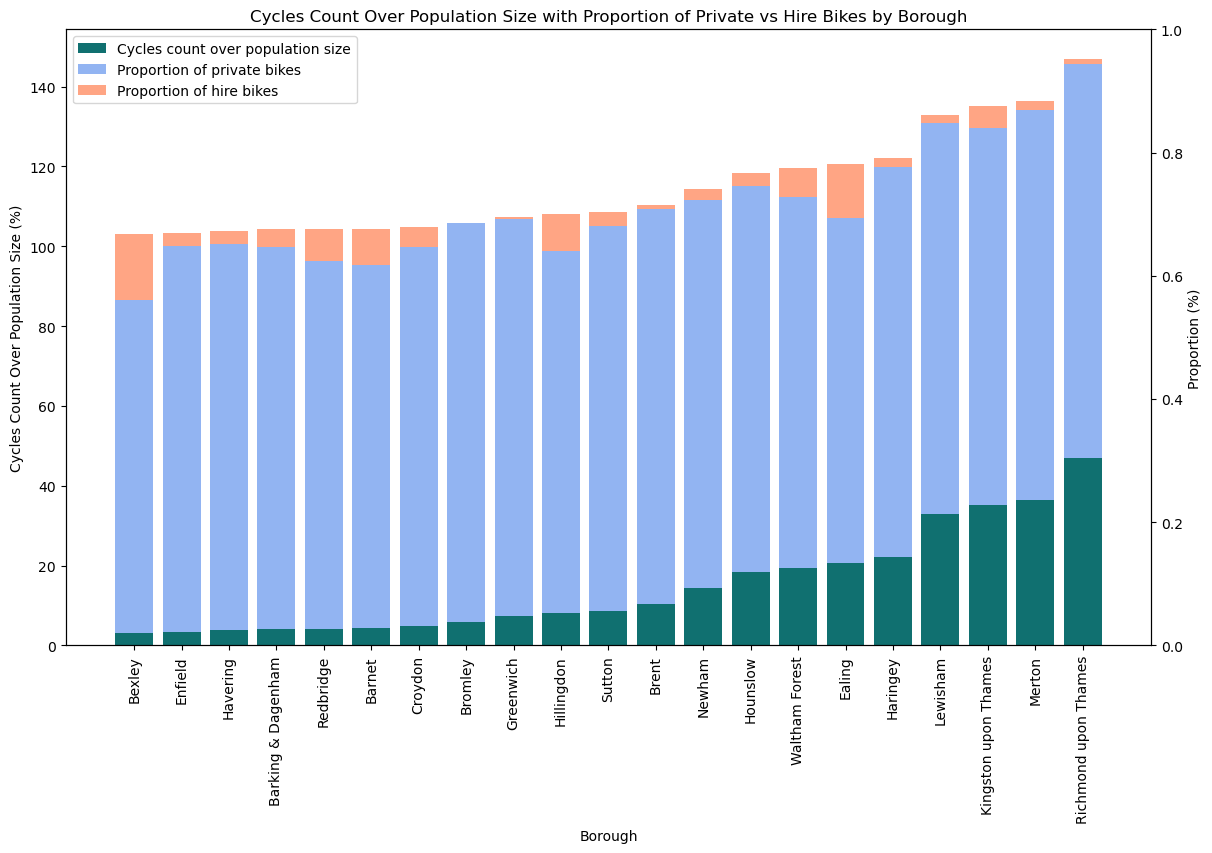

In [5]:
# Final graph used in presentation that shows both the proportion of private vs. hire cycles and the cycle counts over population size
data = {
    'Borough': [
        'Bexley', 'Enfield', 'Havering', 'Barking & Dagenham', 'Redbridge', 'Barnet', 'Croydon', 'Bromley', 'Greenwich', 
        'Hillingdon', 'Sutton', 'Brent', 'Newham', 'Hounslow', 'Waltham Forest', 'Ealing', 'Haringey', 'Lewisham', 'Kingston upon Thames', 
        'Merton', 'Richmond upon Thames'
    ],
    'Population': [
        249877, 339775, 263617, 211998, 311215, 402708, 394114, 332336, 290606, 318774, 208836, 339048, 355266, 271519, 276981, 343606, 269928, 312161, 175470, 213676, 199419
    ],
    'Proportion of private bikes': [
        83.45, 96.61, 96.59, 95.68, 91.99, 90.78, 95.00, 99.91, 99.65, 90.78, 96.59, 98.92, 97.25, 96.74, 92.73, 86.49, 97.82, 98.03, 94.52, 97.84, 98.59
    ],
    'Proportion of hire bikes': [
        16.55, 3.39, 3.41, 4.32, 8.01, 9.22, 5.00, 0.09, 0.35, 9.22, 3.41, 1.08, 2.75, 3.26, 7.27, 13.51, 2.18, 1.97, 5.48, 2.16, 1.41
    ],
    'Total Cycles': [
        7499, 11564, 10318, 8831, 13192, 17893, 18786, 19663, 21110, 25743, 17749, 35177, 50936, 49563, 53991, 70745, 59588, 102470, 61639, 77609, 93813
    ],
    'Distance to Central London (miles)': [
        13, 11, 15, 13, 10, 11, 10, 10, 5, 14, 10, 6, 6, 10, 7, 8, 5, 6, 12, 8, 9
    ],
    'Cycles count over population size': [
        3.0, 3.4, 3.9, 4.2, 4.2, 4.4, 4.8, 5.9, 7.3, 8.1, 8.5, 10.4, 14.3, 18.3, 19.5, 20.6, 22.1, 32.8, 35.1, 36.3, 47.0
    ]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set up the figure and axes
fig, ax1 = plt.subplots(figsize=(14, 8))

# Define colors
cycle_count_color = 'teal'
private_bike_color = 'cornflowerblue'
hire_bike_color = 'coral'

# Create bar chart for Cycles count over population size
bars = sns.barplot(x='Borough', y='Cycles count over population size', data=df, color=cycle_count_color, ax=ax1, label='Cycles count over population size')

# Create twin axes for proportions
ax2 = ax1.twinx()

# Add stacked bars for proportions
for i in range(len(df)):
    ax1.bar(df['Borough'][i], df['Proportion of private bikes'][i], bottom=df['Cycles count over population size'][i], color=private_bike_color, alpha=0.7, label='Proportion of private bikes' if i == 0 else "")
    ax1.bar(df['Borough'][i], df['Proportion of hire bikes'][i], bottom=df['Cycles count over population size'][i] + df['Proportion of private bikes'][i], color=hire_bike_color, alpha=0.7, label='Proportion of hire bikes' if i == 0 else "")

# Set axis labels and title
ax1.set_xlabel('Borough')
ax1.set_ylabel('Cycles Count Over Population Size (%)')
ax2.set_ylabel('Proportion (%)')
plt.title('Cycles Count Over Population Size with Proportion of Private vs Hire Bikes by Borough')

# Rotate x-axis labels for readability
bars.set_xticklabels(bars.get_xticklabels(), rotation=90)

# Add legend
handles, labels = ax1.get_legend_handles_labels()
ax1.legend(handles[:3], labels[:3], loc='upper left')

# Display the plot
plt.show()

### 2a. Cycleways - Evidence of Success
Cycleway CS3 East-West completed in 2018. We will look at central london data to see the effects of cycling count both before and after CS3 completed, specifically an earier called Bird-Cage walk which is where CS3 opened.

In [123]:
# Using a left join, bring across 'Borough' and 'ProdID' from the bike site df to the central_l df using the common
# 'Location' column
central_cycleway = central_l.merge(bike_site[['Location', 'Borough', 'ProgID']], on='Location', how='left')

# Display the updated df_inner_l_chloe DataFrame
central_cycleway.head()

,Calendar quarter,Equivalent financial quarter,Site ID,Location,Survey date,Weather,Time,Period,Direction,Start hour,Start minute,Number of private cycles,Number of cycle hire bikes,Total cycles,Day of Week,Area,Year,Borough,ProgID
0,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),2014-01-24 00:00:00,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,0.0,0.0,0.0,Friday,Central,2014,Westminster,CENCY
1,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),2014-01-24 00:00:00,Dry,0600 - 0615,Early Morning (06:00-07:00),Northbound,6.0,0.0,0.0,0.0,0.0,Friday,Central,2014,Westminster,CSHCY
2,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),2014-01-24 00:00:00,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,15.0,0.0,15.0,Friday,Central,2014,Westminster,CENCY
3,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),2014-01-24 00:00:00,Dry,0615 - 0630,Early Morning (06:00-07:00),Northbound,6.0,15.0,15.0,0.0,15.0,Friday,Central,2014,Westminster,CSHCY
4,2014 Q1 (January-March),2013-14 Q4,CENCY001,Millbank (south of Thorney Street),2014-01-24 00:00:00,Dry,0630 - 0645,Early Morning (06:00-07:00),Northbound,6.0,30.0,35.0,0.0,35.0,Friday,Central,2014,Westminster,CENCY


In [124]:
# Create a filtered df that contains only the location of 'Birdcage walk' and ProgID of CSHCY (Superhighway)
# that shows total cycles by year

birdcage_walk_df = central_cycleway[(central_cycleway['Location'] == 'Birdcage Walk') & (central_cycleway['ProgID'] == 'CSHCY')]

# Group by 'Year' and calculate the sum of 'Total cycles'
birdcage_walk_df = birdcage_walk_df.groupby('Year')['Total cycles'].sum().reset_index()

# Display the resulting DataFrame
birdcage_walk_df

,Year,Total cycles
0,2014,6279.0
1,2015,5519.0
2,2016,6915.0
3,2017,5212.0
4,2018,7865.0
5,2019,10816.0
6,2020,6656.0
7,2021,14176.0


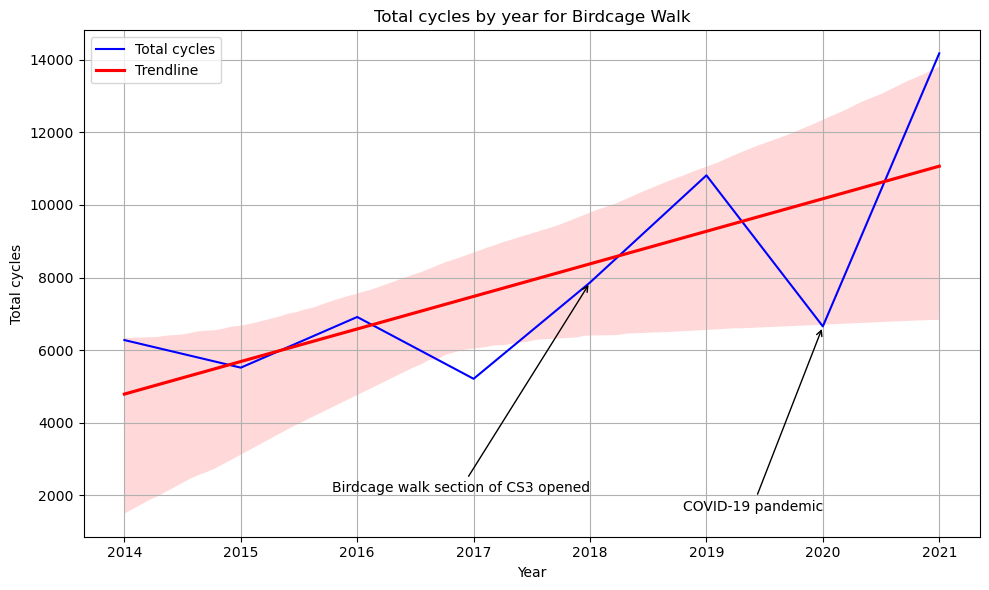

In [125]:
# Convert 'Year' column from objct to float.
birdcage_walk_df['Year'] = birdcage_walk_df['Year'].astype(float)

# Create a line plot
plt.figure(figsize=(10, 6))
sns.lineplot(data=birdcage_walk_df, x='Year', y='Total cycles', color='blue', label='Total cycles')

# Add a trendline
sns.regplot(data=birdcage_walk_df, x='Year', y='Total cycles', scatter=False, color='red', label='Trendline')

# Add callout points for 2018 and 2020
plt.annotate('Birdcage walk section of CS3 opened', xy=(2018, birdcage_walk_df.loc[birdcage_walk_df['Year'] == 2018, 'Total cycles'].values), xytext=(2018, 2000), 
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10, ha='right', va='bottom')
plt.annotate('COVID-19 pandemic', xy=(2020, birdcage_walk_df.loc[birdcage_walk_df['Year'] == 2020, 'Total cycles'].values), xytext=(2020, 1500), 
             arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10, ha='right', va='bottom')

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Total cycles')
plt.title('Total cycles by year for Birdcage Walk')

# Show plot
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [126]:
# Create a year-on-year column that contains the percentage difference
birdcage_walk_yoy_df = birdcage_walk_df

# Calculate the year-over-year (YoY) percentage difference for Total cycles
birdcage_walk_yoy_df['YoY % Difference'] = birdcage_walk_yoy_df['Total cycles'].pct_change() * 100

# Format the percentage values with the % sign
birdcage_walk_yoy_df['YoY % Difference'] = birdcage_walk_yoy_df['YoY % Difference'].map('{:.2f}%'.format)

# DataFrame with YoY percentage difference column
birdcage_walk_yoy_df

,Year,Total cycles,YoY % Difference
0,2014.0,6279.0,nan%
1,2015.0,5519.0,-12.10%
2,2016.0,6915.0,25.29%
3,2017.0,5212.0,-24.63%
4,2018.0,7865.0,50.90%
5,2019.0,10816.0,37.52%
6,2020.0,6656.0,-38.46%
7,2021.0,14176.0,112.98%


### Findings:

- Total cycles increased by 51% in 2018 which is when the Birdcage Walk section of cycleway CS3 opened
- There was a sharp decrease of -38% in 2020 due to Covid
- Levels bounced back considerably in 2021 which a significant 113% increase

### 2b. High potential Boroughs for new cycleways

In [127]:
# Import prioritised boroughs for Cycleways.
prioritised_boroughs = pd.read_csv('Prioritised_Boroughs_2.csv')

# Sense check the data.
prioritised_boroughs.head()

,Borough,Population,Total Cycles,Distance to Central London (miles),No Cycleways,Cycles count over population size
0,Harrow,250149,6514,12,False,3%
1,Bexley,249877,7499,13,True,3%
2,Enfield,339775,11564,11,False,3%
3,Barking & Dagenham,211998,8831,13,False,4%
4,Havering,263617,10318,15,True,4%


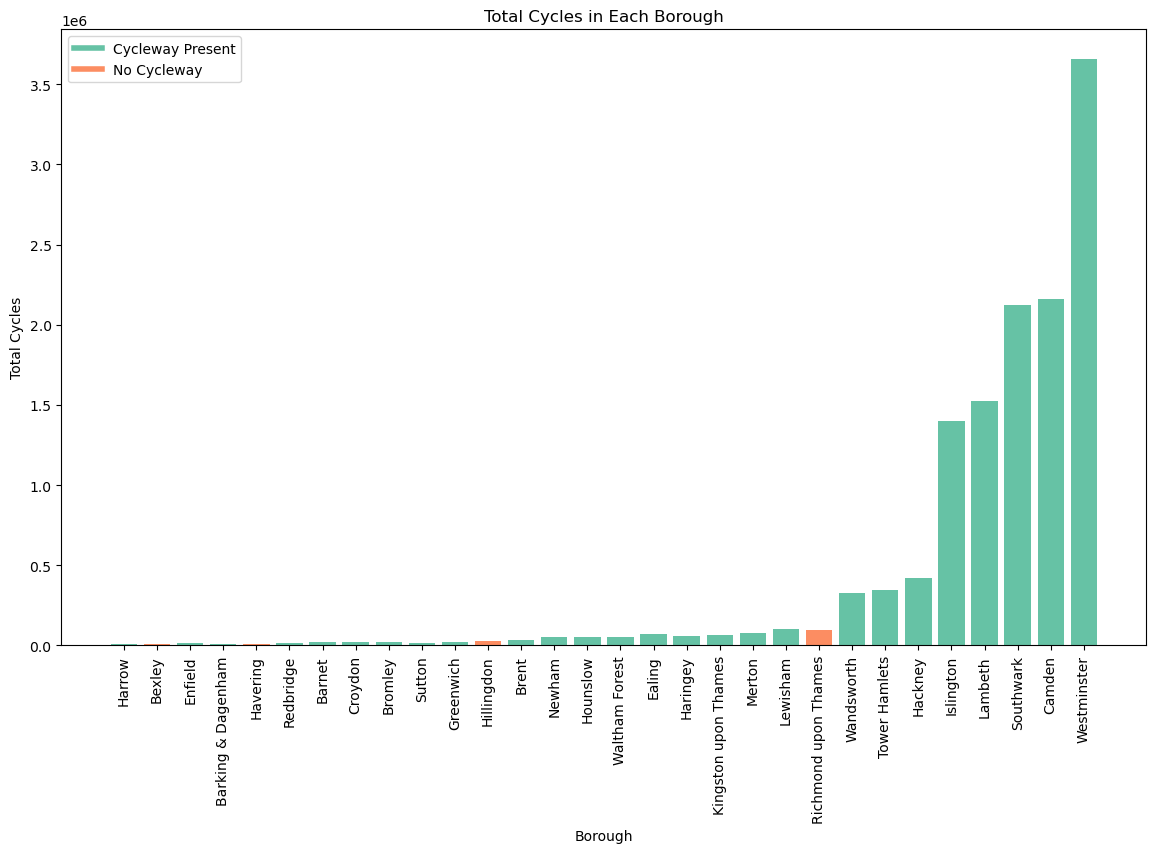

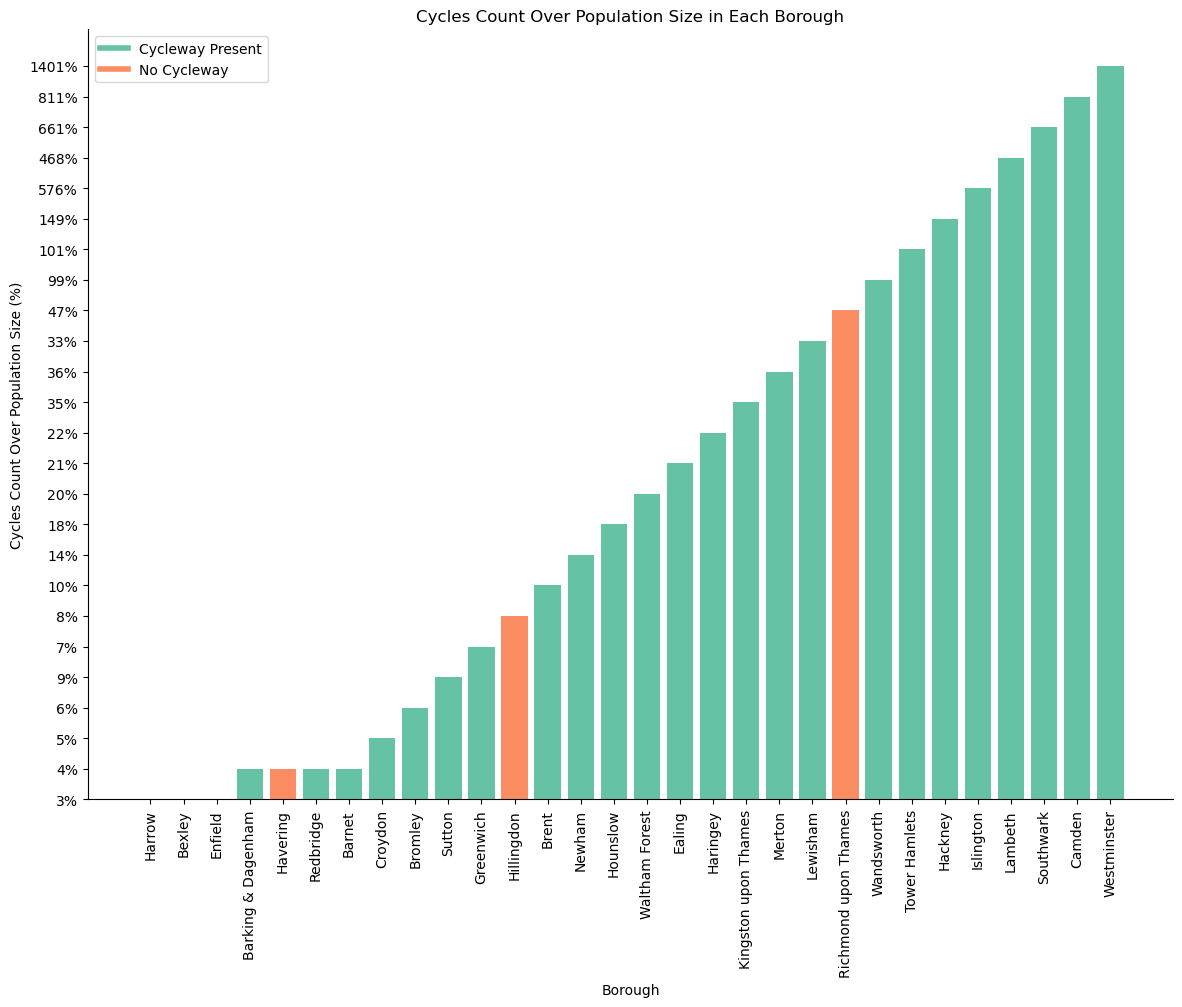

In [128]:
# Display the results in a graph
# Adding a column for color based on the presence of cycleways
prioritised_boroughs['Color'] = prioritised_boroughs['No Cycleways'].apply(lambda x: sns.color_palette("Set2")[1] if x else sns.color_palette("Set2")[0])

# Plotting Total Cycles vs Borough
plt.figure(figsize=(14, 8))
bars = plt.bar(prioritised_boroughs['Borough'], prioritised_boroughs['Total Cycles'], color=prioritised_boroughs['Color'])
plt.xlabel('Borough')
plt.ylabel('Total Cycles')
plt.title('Total Cycles in Each Borough')
plt.xticks(rotation=90)

# Creating a legend
red_patch = plt.Line2D([0], [0], color=sns.color_palette("Set2")[0], lw=4, label='Cycleway Present')
green_patch = plt.Line2D([0], [0], color=sns.color_palette("Set2")[1], lw=4, label='No Cycleway')
plt.legend(handles=[red_patch, green_patch])

plt.show()

# Plotting Cycles count over population size vs Borough
fig, ax = plt.subplots(figsize=(14, 10))  # Specify larger figure size for the second plot
bars = ax.bar(prioritised_boroughs['Borough'], prioritised_boroughs['Cycles count over population size'], color=prioritised_boroughs['Color'])
ax.set_xlabel('Borough')
ax.set_ylabel('Cycles Count Over Population Size (%)')
ax.set_title('Cycles Count Over Population Size in Each Borough')
ax.set_xticklabels(prioritised_boroughs['Borough'], rotation=90)

# Removing the box
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Creating a legend
red_patch = plt.Line2D([0], [0], color=sns.color_palette("Set2")[0], lw=4, label='Cycleway Present')
green_patch = plt.Line2D([0], [0], color=sns.color_palette("Set2")[1], lw=4, label='No Cycleway')
ax.legend(handles=[red_patch, green_patch])

plt.show()

## Barriers to Biking:

### 1a. Bike Parking and Bike Theft

In [129]:
# Load the cycle parking data
cycle_parking = pd.read_csv('cycle_parking_cleaned.csv')

# Load the MET cycle data
met_cycle = pd.read_excel('MET_cycle_Data_cleaned.xlsx')

# Summarize the cycle parking data by borough
cycle_parking_summary = cycle_parking.groupby('Borough').agg(
    total_parking_spaces=('Capacity', 'sum'),
    average_parking_spaces=('Capacity', 'mean')
).reset_index()

# Merge the datasets on the borough names
combined_data = pd.merge(cycle_parking_summary, met_cycle, left_on='Borough', right_on='Owning Borough', how='inner')

# Display the combined dataset
print("Combined Dataset:")
print(combined_data.head())

Combined Dataset:
              Borough  total_parking_spaces  average_parking_spaces  \
0  Barking & Dagenham                1827.0                6.894340   
1              Barnet                2499.0                6.095122   
2              Bexley                1180.0                6.592179   
3               Brent                2910.0                5.950920   
4             Bromley                2231.0                7.461538   

       Owning Borough  2018 Total  2019 Total  2020 Total  2021 Total  
0  Barking & Dagenham    52204.03    34791.00    42870.89    56492.02  
1              Barnet    57426.32    87477.01   127307.40   175054.96  
2              Bexley    53180.98    31977.01    25905.00    45853.98  
3               Brent   126860.50    99123.53   149700.24   154582.00  
4             Bromley    94001.01    62207.03    74690.00    79451.01  


In [130]:
# Calculate the correlation matrix
correlation_matrix = combined_data[['total_parking_spaces', 'average_parking_spaces', '2018 Total', '2019 Total', '2020 Total', '2021 Total']].corr()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                        total_parking_spaces  average_parking_spaces  \
total_parking_spaces                1.000000               -0.244983   
average_parking_spaces             -0.244983                1.000000   
2018 Total                          0.925554               -0.201039   
2019 Total                          0.945651               -0.214556   
2020 Total                          0.369018                0.104221   
2021 Total                          0.926816               -0.180841   

                        2018 Total  2019 Total  2020 Total  2021 Total  
total_parking_spaces      0.925554    0.945651    0.369018    0.926816  
average_parking_spaces   -0.201039   -0.214556    0.104221   -0.180841  
2018 Total                1.000000    0.979416    0.607099    0.959058  
2019 Total                0.979416    1.000000    0.529627    0.967148  
2020 Total                0.607099    0.529627    1.000000    0.550747  
2021 Total                0.959058   

##### Correlation Analysis:

- A strong positive correlation exists between the total parking spaces and the total cost of stolen cycles for the years 2018, 2019, and 2021. This suggests that boroughs with more cycle parking spaces tend to experience higher costs due to stolen cycles.

- The correlation between average parking spaces per location and the total cost of stolen cycles is relatively weak and sometimes negative, indicating that the number of parking spaces at individual locations may not be as influential as the overall availability.

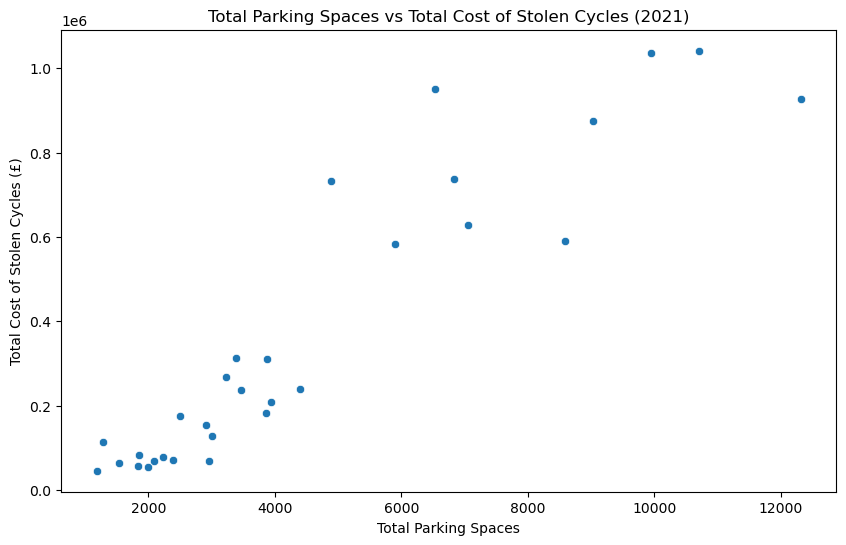

In [131]:
# Plotting total parking spaces vs total cost of stolen cycles in 2021
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_data, x='total_parking_spaces', y='2021 Total')
plt.title('Total Parking Spaces vs Total Cost of Stolen Cycles (2021)')
plt.xlabel('Total Parking Spaces')
plt.ylabel('Total Cost of Stolen Cycles (£)')
plt.show()

- The scatter plot shows a clear positive relationship between the total number of cycle parking spaces and the total cost of stolen cycles in 2021. Boroughs with more parking spaces generally have higher costs associated with stolen cycles.

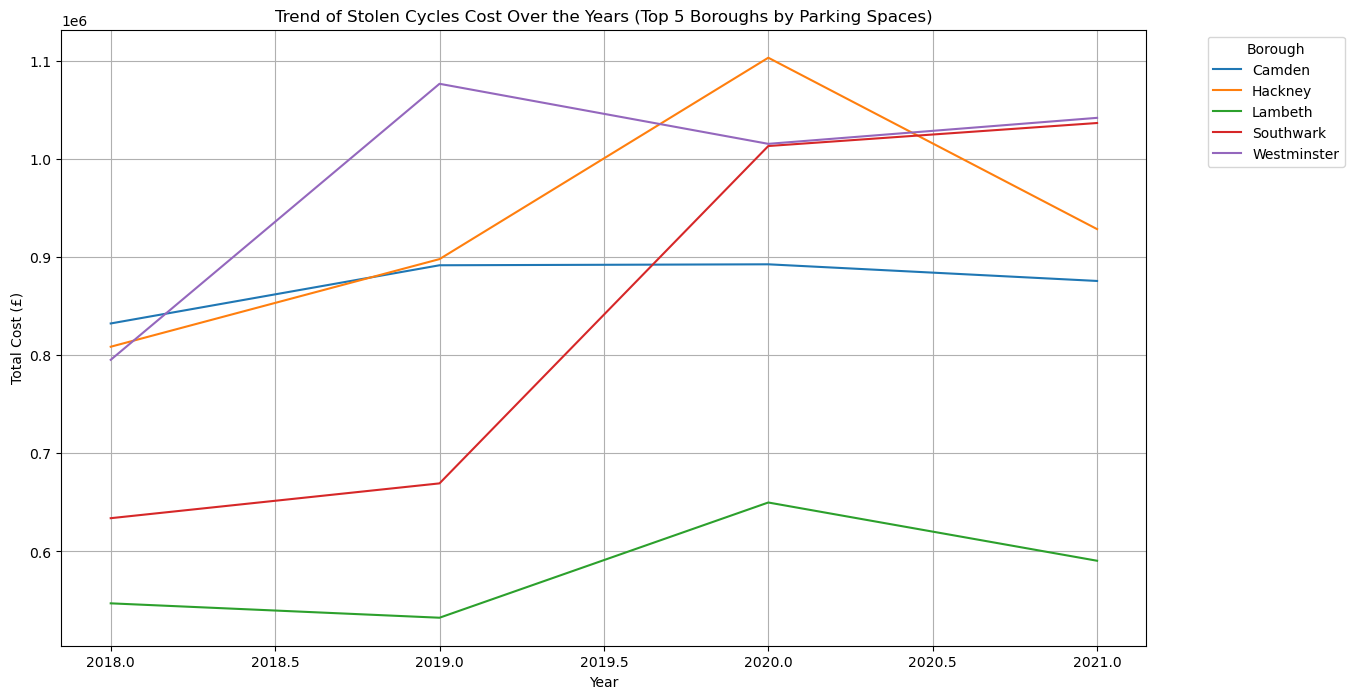

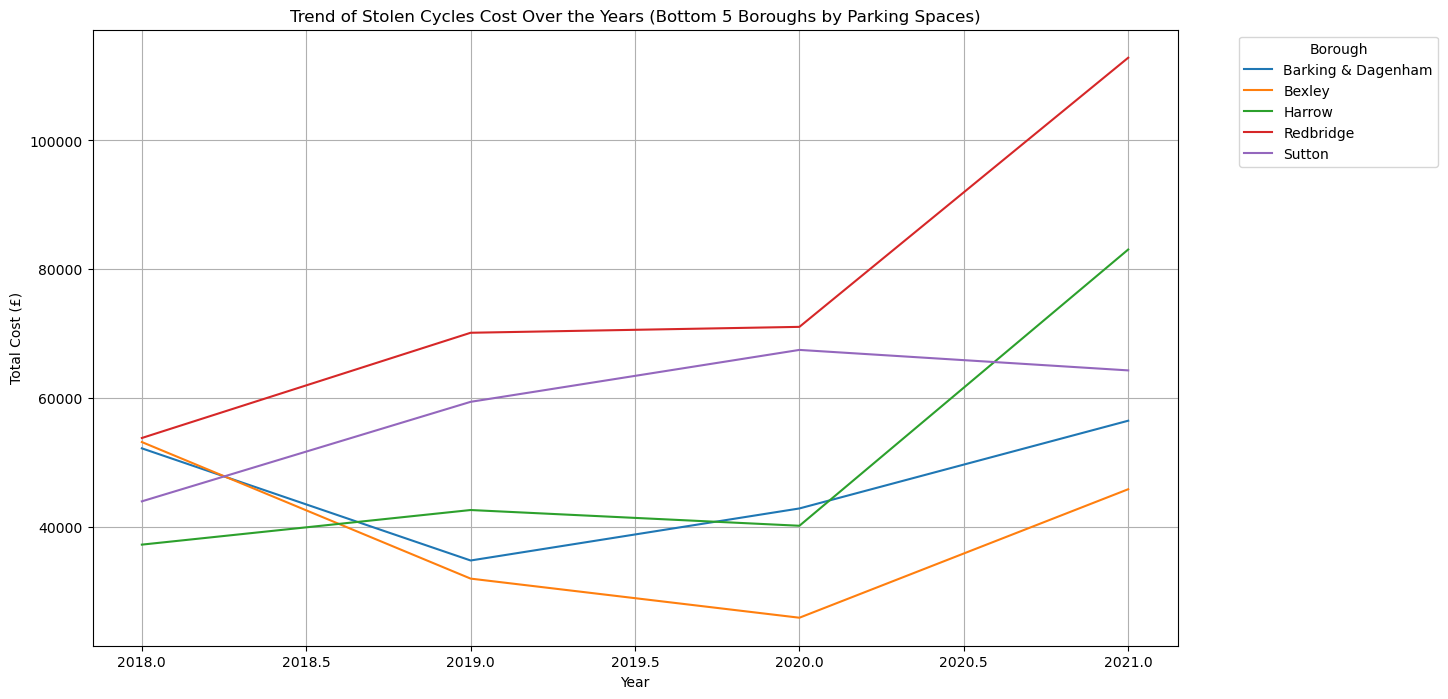

In [132]:
# Melt the data for easier plotting
combined_data_melted = combined_data.melt(id_vars=['Borough', 'total_parking_spaces', 'average_parking_spaces'], 
                                          value_vars=['2018 Total', '2019 Total', '2020 Total', '2021 Total'], 
                                          var_name='Year', 
                                          value_name='Total Cost')

# Convert 'Year' to a datetime-like format for better plotting
combined_data_melted['Year'] = combined_data_melted['Year'].str.extract('(\d+)').astype(int)

# Plotting the trend of stolen cycles cost over the years for boroughs with the most and least parking spaces
top_boroughs = combined_data.nlargest(5, 'total_parking_spaces')
bottom_boroughs = combined_data.nsmallest(5, 'total_parking_spaces')

plt.figure(figsize=(14, 8))
sns.lineplot(data=combined_data_melted[combined_data_melted['Borough'].isin(top_boroughs['Borough'])], x='Year', y='Total Cost', hue='Borough')
plt.title('Trend of Stolen Cycles Cost Over the Years (Top 5 Boroughs by Parking Spaces)')
plt.xlabel('Year')
plt.ylabel('Total Cost (£)')
plt.legend(title='Borough', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 8))
sns.lineplot(data=combined_data_melted[combined_data_melted['Borough'].isin(bottom_boroughs['Borough'])], x='Year', y='Total Cost', hue='Borough')
plt.title('Trend of Stolen Cycles Cost Over the Years (Bottom 5 Boroughs by Parking Spaces)')
plt.xlabel('Year')
plt.ylabel('Total Cost (£)')
plt.legend(title='Borough', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

#### Overview:

The analysis combines two datasets: one detailing cycle parking facilities and the other detailing the cost of stolen cycles in different boroughs of London from 2018 to 2021. The merged dataset includes the total and average cycle parking capacities and the yearly costs of stolen cycles per borough.

#### Key Findings:

*Correlation Analysis:*

- A strong positive correlation exists between the total parking spaces and the total cost of stolen cycles for the years 2018, 2019, and 2021. This suggests that boroughs with more cycle parking spaces tend to experience higher costs due to stolen cycles.

- The correlation between average parking spaces per location and the total cost of stolen cycles is relatively weak and sometimes negative, indicating that the number of parking spaces at individual locations may not be as influential as the overall availability.

- Scatter Plot: Total Parking Spaces vs. Total Cost of Stolen Cycles (2021):

- The scatter plot shows a clear positive relationship between the total number of cycle parking spaces and the total cost of stolen cycles in 2021. Boroughs with more parking spaces generally have higher costs associated with stolen cycles.

#### Recommendations:
*Enhanced Security Measures:*

- Given the positive correlation between the availability of cycle parking spaces and the cost of stolen cycles, boroughs with more parking facilities should consider enhancing security measures. This could include better lighting, CCTV surveillance, and secure locking mechanisms.

*Public Awareness Campaigns:*

- Increasing public awareness about bicycle theft and promoting the use of secure parking options can help mitigate the high costs associated with stolen cycles.

*Further Research:*

- Investigating other factors that may influence bicycle theft, such as socioeconomic conditions, police presence, and community engagement, can provide a more comprehensive understanding and help develop targeted strategies to reduce theft.

### 1b. Relationship between Secure Parking Requests and Bike Theft

Correlation coefficient: 0.7766022316585384


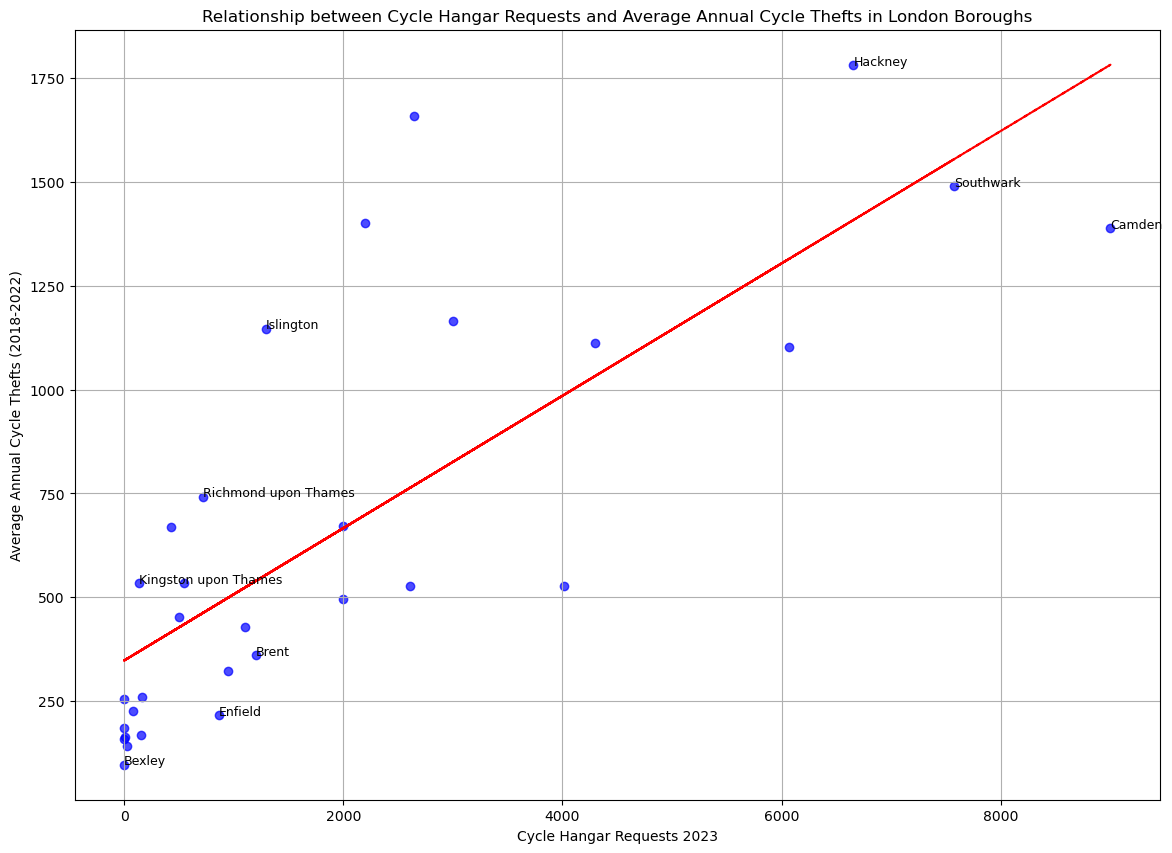

Outliers:
                   Borough  Cycle Hangar Requests 2023  \
3                    Brent                      1200.0   
5                   Camden                      9000.0   
7                   Ealing                      2605.0   
8                  Enfield                       868.0   
9                Greenwich                      1100.0   
10                 Hackney                      6654.0   
11  Hammersmith and Fulham                      3000.0   
12                Haringey                      2000.0   
16                Hounslow                       428.0   
17               Islington                      1295.0   
18  Kensington and Chelsea                      2000.0   
19    Kingston upon Thames                       133.0   
20                 Lambeth                      6066.0   
22                  Merton                       948.0   
23                  Newham                       550.0   
25    Richmond upon Thames                       723.0   
26  

In [134]:
# Load the new dataset
data_new = pd.read_excel('Steer data.xlsx', sheet_name='Sheet1')

# Convert relevant columns to numeric, forcing errors to NaN
data_new['Cycle Hangar Requests 2023'] = pd.to_numeric(data_new['Cycle Hangar Requests 2023'], errors='coerce')
data_new['Total Cycle Thefts avg. 2018-2022'] = pd.to_numeric(data_new['Total Cycle Thefts avg. 2018-2022'], errors='coerce')

# Drop rows with NaN values in the relevant columns
data_cleaned_new = data_new.dropna(subset=['Cycle Hangar Requests 2023', 'Total Cycle Thefts avg. 2018-2022'])

# Calculate the correlation coefficient
correlation = data_cleaned_new['Cycle Hangar Requests 2023'].corr(data_cleaned_new['Total Cycle Thefts avg. 2018-2022'])
print(f"Correlation coefficient: {correlation}")

# Calculate the trendline
z = np.polyfit(data_cleaned_new['Cycle Hangar Requests 2023'], data_cleaned_new['Total Cycle Thefts avg. 2018-2022'], 1)
p = np.poly1d(z)

# Specific boroughs to label (including Camden for reference)
boroughs_to_label = ['Camden', 'Hackney', 'Southwark', 'Bexley', 'Brent', 'Enfield', 'Kingston upon Thames', 'Richmond upon Thames', 'Islington']

# Plotting the relationship between Cycle Hangar Requests 2023 and Total Cycle Thefts avg. 2018-2022
plt.figure(figsize=(14, 10))

# Scatter plot
plt.scatter(data_cleaned_new['Cycle Hangar Requests 2023'], 
            data_cleaned_new['Total Cycle Thefts avg. 2018-2022'], alpha=0.7, color='blue')

# Adding labels for specific boroughs
for i, borough in enumerate(data_cleaned_new['Borough']):
    if borough in boroughs_to_label:
        plt.text(data_cleaned_new['Cycle Hangar Requests 2023'].iloc[i], 
                 data_cleaned_new['Total Cycle Thefts avg. 2018-2022'].iloc[i], 
                 borough, fontsize=9)

# Trendline
plt.plot(data_cleaned_new['Cycle Hangar Requests 2023'], p(data_cleaned_new['Cycle Hangar Requests 2023']), "r--")

# Setting titles and labels
plt.title('Relationship between Cycle Hangar Requests and Average Annual Cycle Thefts in London Boroughs')
plt.xlabel('Cycle Hangar Requests 2023')
plt.ylabel('Average Annual Cycle Thefts (2018-2022)')

# Display plot
plt.grid(True)
plt.show()

# Identify outliers
outliers = data_cleaned_new[
    (data_cleaned_new['Cycle Hangar Requests 2023'] > 500) |
    (data_cleaned_new['Total Cycle Thefts avg. 2018-2022'] > 500)
][['Borough', 'Cycle Hangar Requests 2023', 'Total Cycle Thefts avg. 2018-2022']]

print("Outliers:")
print(outliers)

In [135]:
# Calculate the correlation coefficient and p-value
correlation, p_value = pearsonr(data_cleaned_new['Cycle Hangar Requests 2023'], data_cleaned_new['Total Cycle Thefts avg. 2018-2022'])
print(f"Correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

# Calculate the trendline
z = np.polyfit(data_cleaned_new['Cycle Hangar Requests 2023'], data_cleaned_new['Total Cycle Thefts avg. 2018-2022'], 1)
p = np.poly1d(z)


# Print the correlation coefficient and p-value
print(f"Correlation coefficient: {correlation}")
print(f"P-value: {p_value}")

Correlation coefficient: 0.7766022316585384
P-value: 2.809944311418879e-07
Correlation coefficient: 0.7766022316585384
P-value: 2.809944311418879e-07


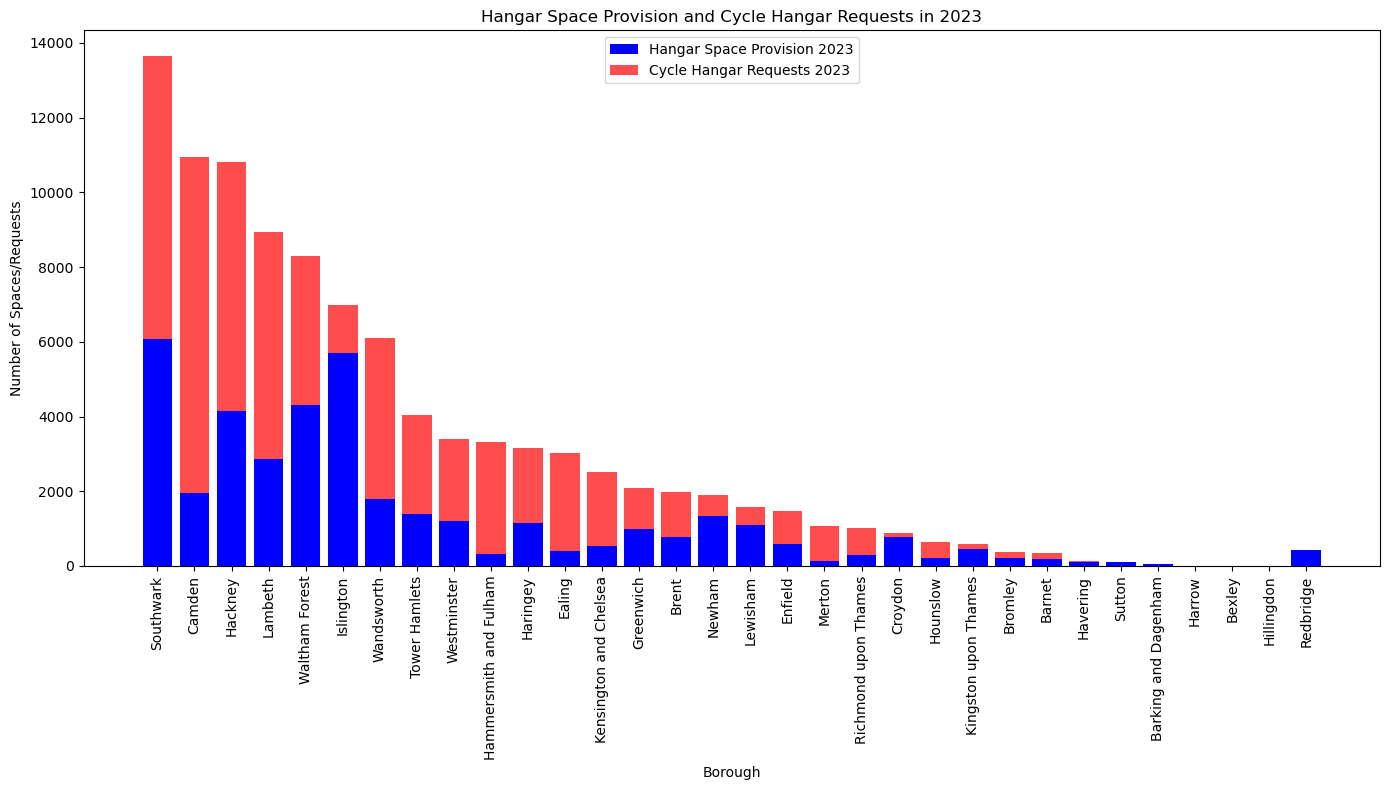

In [136]:
# Select relevant columns for analysis and create a copy to avoid SettingWithCopyWarning
selected_columns = [
    'Borough', 
    'Spaces Provision 2022', 
    'Hangar Space Provision 2023', 
    'Cycle Hangar Requests 2023'
]
secure_cycle_parking_data = data_new[selected_columns].copy()

# Calculate the total parking need as the sum of hangar space provision and requests
secure_cycle_parking_data['Total Parking Need 2023'] = secure_cycle_parking_data['Hangar Space Provision 2023'] + secure_cycle_parking_data['Cycle Hangar Requests 2023']

# Sort the DataFrame by 'Total Parking Need 2023' in descending order
secure_cycle_parking_data_sorted = secure_cycle_parking_data.sort_values(by='Total Parking Need 2023', ascending=False)

# Plotting the data for Hangar Space Provision 2023 and Cycle Hangar Requests 2023
plt.figure(figsize=(14, 8))

# Bar plot for Hangar Space Provision 2023
plt.bar(secure_cycle_parking_data_sorted['Borough'], secure_cycle_parking_data_sorted['Hangar Space Provision 2023'], 
        color='blue', label='Hangar Space Provision 2023')

# Bar plot for Cycle Hangar Requests 2023
plt.bar(secure_cycle_parking_data_sorted['Borough'], secure_cycle_parking_data_sorted['Cycle Hangar Requests 2023'], 
        color='red', label='Cycle Hangar Requests 2023', alpha=0.7, bottom=secure_cycle_parking_data_sorted['Hangar Space Provision 2023'])

# Adding labels and title
plt.xlabel('Borough')
plt.ylabel('Number of Spaces/Requests')
plt.title('Hangar Space Provision and Cycle Hangar Requests in 2023')
plt.xticks(rotation=90)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

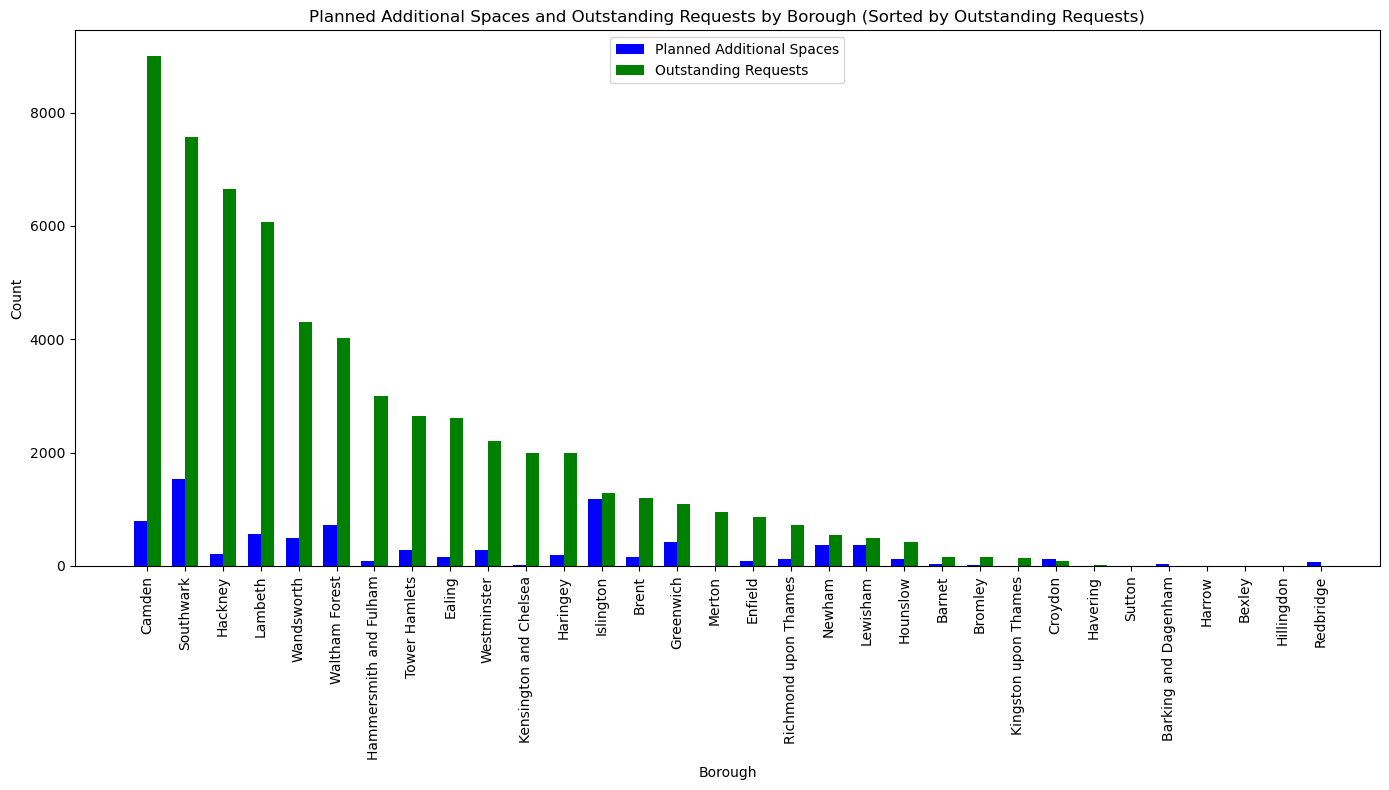

In [146]:
# Load the Excel file
df = pd.read_excel('Steer data.xlsx', sheet_name='Sheet1')

# Calculate Planned Additional Spaces and Outstanding Requests
df['Planned Additional Spaces'] = df['Hangar Space Provision 2023'] - df['Spaces Provision 2022']
df['Outstanding Requests'] = df['Cycle Hangar Requests 2023']

# Sort DataFrame by 'Outstanding Requests'
df_sorted = df.sort_values(by='Outstanding Requests', ascending=False)

# Extract relevant columns
planned_additional_spaces_and_requests = df_sorted[['Borough', 'Planned Additional Spaces', 'Outstanding Requests']]

# Plotting Planned Additional Spaces and Outstanding Requests with green and blue bars
fig, ax = plt.subplots(figsize=(14, 8))

# Define the width of the bars
bar_width = 0.35

# Calculate the positions for the bars
bar_positions = range(len(planned_additional_spaces_and_requests['Borough']))

# Bar chart for Planned Additional Spaces
ax.bar(bar_positions, planned_additional_spaces_and_requests['Planned Additional Spaces'], width=bar_width, label='Planned Additional Spaces', color='blue')

# Bar chart for Outstanding Requests (shifted to the right by bar_width)
ax.bar([p + bar_width for p in bar_positions], planned_additional_spaces_and_requests['Outstanding Requests'], width=bar_width, label='Outstanding Requests', color='green')

# Adding labels and title
ax.set_xlabel('Borough')
ax.set_ylabel('Count')
ax.set_title('Planned Additional Spaces and Outstanding Requests by Borough (Sorted by Outstanding Requests)')
ax.set_xticks([p + bar_width / 2 for p in bar_positions])
ax.set_xticklabels(planned_additional_spaces_and_requests['Borough'], rotation=90)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

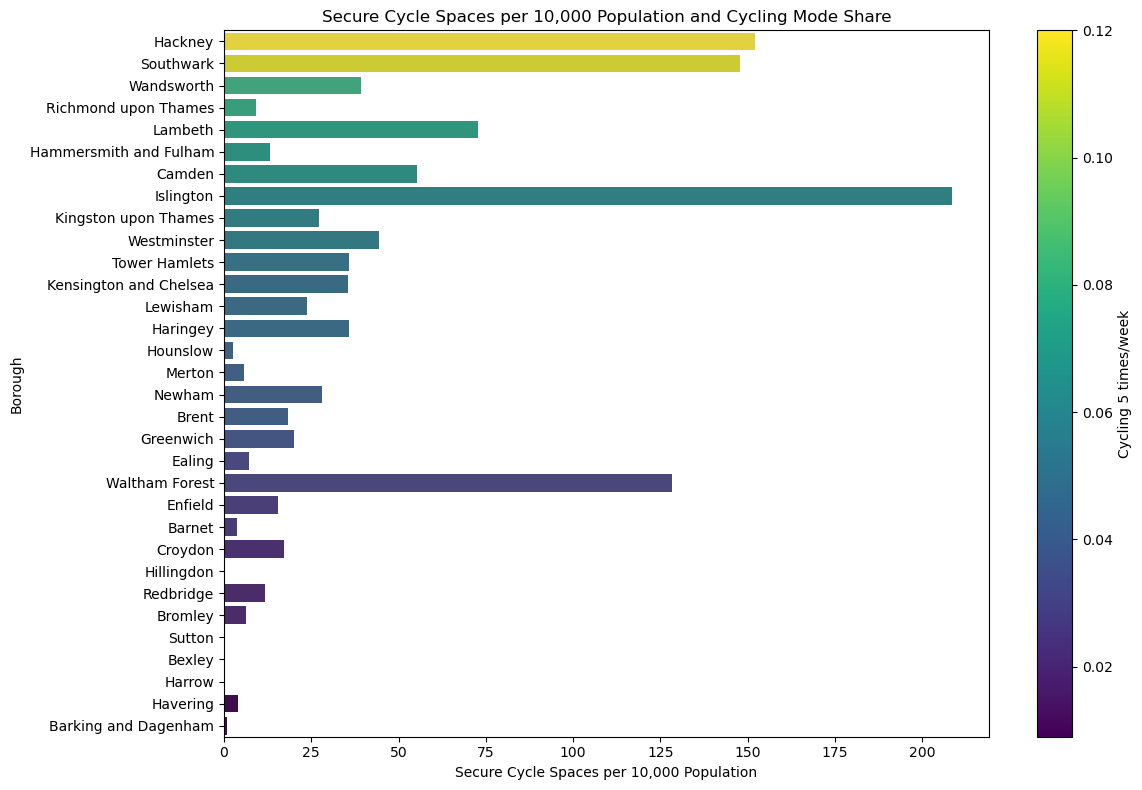

In [138]:
# Filter relevant columns
filtered_df = df[['Borough', 'Spaces Provision 2022', 'Hangar Space Provision 2023', 'Cycling 5 times per week 2021', 'Population 2021']].copy()

# Rename columns for easier handling
filtered_df.columns = ['Borough', 'Spaces_2022', 'Spaces_2023', 'Cycling_2021', 'Population']

# Calculate secure cycle spaces per 10,000 population
filtered_df['Total_Spaces'] = filtered_df['Spaces_2022']
filtered_df['Spaces_per_10k'] = (filtered_df['Total_Spaces'] / filtered_df['Population']) * 10000

# Prepare the final table
final_table = filtered_df[['Borough', 'Spaces_per_10k', 'Cycling_2021']]

# Sort the table by Cycling_2021 (cycling mode share) in descending order
final_table_sorted = final_table.sort_values(by='Cycling_2021', ascending=False)

# Normalize the hue values to map them to the colormap
norm = Normalize(vmin=final_table_sorted['Cycling_2021'].min(), vmax=final_table_sorted['Cycling_2021'].max())
sm = plt.cm.ScalarMappable(cmap=viridis, norm=norm)
sm.set_array([])

# Map the normalized hue values to colors
final_table_sorted['Color'] = final_table_sorted['Cycling_2021'].map(lambda x: viridis(norm(x)))

# Plotting the final sorted table
plt.figure(figsize=(12, 8))
ax = sns.barplot(x='Spaces_per_10k', y='Borough', data=final_table_sorted, palette=final_table_sorted['Color'], dodge=False)
plt.title('Secure Cycle Spaces per 10,000 Population and Cycling Mode Share')
plt.xlabel('Secure Cycle Spaces per 10,000 Population')
plt.ylabel('Borough')

# Add the color bar
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Cycling 5 times/week')

plt.tight_layout()
plt.show()

### 2. Safety Concerns: E-bikes and E-Scooters

In [143]:
# Read the CSV file
df = pd.read_csv('LFB Lithium and Electric Vehicle fire data(Incidents).csv')

In [144]:
# Filter data for e-bikes and e-scooters (case-insensitive)
ebike_df = df[(df['Type'].str.contains('e-bike', case=False, na=False)) & (df['Lithium batteries mentioned in report?'] == 'Yes')]
escooter_df = df[(df['Type'].str.contains('e-scooter', case=False, na=False)) & (df['Lithium batteries mentioned in report?'] == 'Yes')]

# Count the number of incidents per year for each type
ebike_yearly_counts = ebike_df['CalendarYear'].value_counts().sort_index()
escooter_yearly_counts = escooter_df['CalendarYear'].value_counts().sort_index()

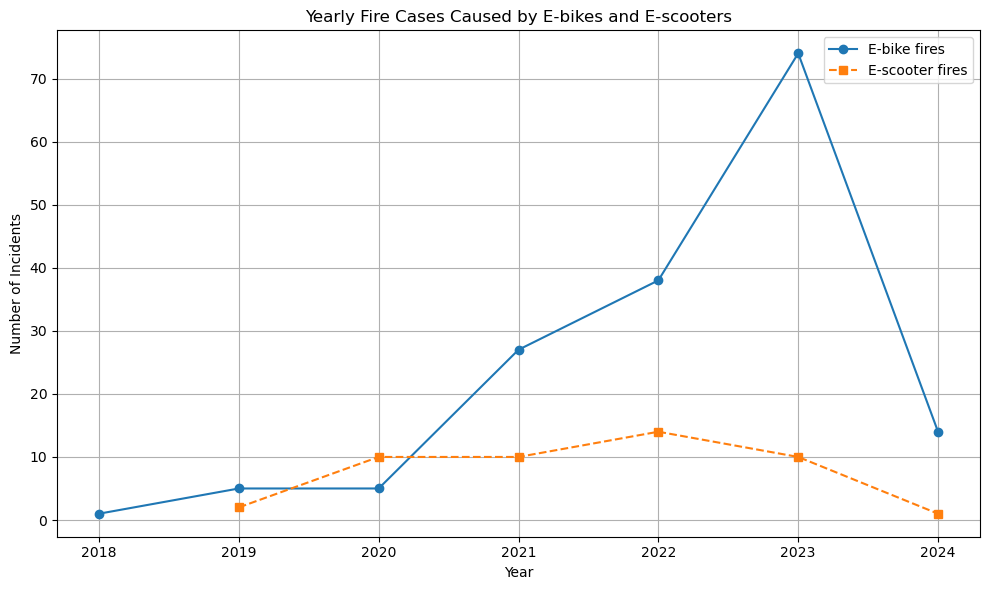

In [145]:
# Create the figure and subplots
plt.figure(figsize=(10, 6))

# Plot e-bike fires
plt.plot(ebike_yearly_counts.index, ebike_yearly_counts.values, marker='o', label='E-bike fires')

# Plot e-scooter fires (use different marker and linestyle for distinction)
plt.plot(escooter_yearly_counts.index, escooter_yearly_counts.values, marker='s', linestyle='--', label='E-scooter fires')

# Add labels and title
plt.title('Yearly Fire Cases Caused by E-bikes and E-scooters')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.xticks(ebike_yearly_counts.index)  # Ensure all years are shown on the x-axis
plt.legend()  # Add legend to distinguish lines

plt.tight_layout()
plt.show()